#Link with Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/EVA4/S7

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/EVA4/S7


In [2]:
!pwd

/content/drive/My Drive/EVA4/S7


#Data abstraction and transform

In [0]:
%matplotlib inline

In [4]:
import pullData

pullData.analyseCIFAR10()

Files already downloaded and verified
 - Numpy Shape: (50000, 32, 32, 3)
[CHANNEL 0]
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.4915)
 - std: tensor(0.2470)
 - var: tensor(0.0610)
[CHANNEL 1]
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.4823)
 - std: tensor(0.2435)
 - var: tensor(0.0593)
[CHANNEL 2]
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.4468)
 - std: tensor(0.2616)
 - var: tensor(0.0684)


In [5]:
trainloader,  testloader, classes = pullData.pullCIFAR10()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


#Model Summary

In [6]:
import torch
import model
from torchsummary import summary

from resnet import *

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
Mymodel = ResNet18().to(device)

if device == 'cuda':
    Mymodel = torch.nn.DataParallel(Mymodel)
    cudnn.benchmark = True
summary(Mymodel, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

#Train the Model

In [7]:
import trainAndTest
trainAndTest.trainModel(20,Mymodel, device, trainloader, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.3924500942230225 Batch_id=390 Accuracy=41.62: 100%|██████████| 391/391 [00:53<00:00,  7.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.8742, Accuracy: 5242/10000 (52.42%)

EPOCH: 1


Loss=0.9219139814376831 Batch_id=390 Accuracy=59.75: 100%|██████████| 391/391 [00:53<00:00,  7.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.1465, Accuracy: 6388/10000 (63.88%)

EPOCH: 2


Loss=0.9044997096061707 Batch_id=390 Accuracy=68.46: 100%|██████████| 391/391 [00:54<00:00,  7.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.5648, Accuracy: 7478/10000 (74.78%)

EPOCH: 3


Loss=0.547200083732605 Batch_id=390 Accuracy=74.50: 100%|██████████| 391/391 [00:54<00:00,  7.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.5997, Accuracy: 7542/10000 (75.42%)

EPOCH: 4


Loss=0.9648700952529907 Batch_id=390 Accuracy=77.64: 100%|██████████| 391/391 [00:54<00:00,  7.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.0490, Accuracy: 7660/10000 (76.60%)

EPOCH: 5


Loss=0.43833741545677185 Batch_id=390 Accuracy=80.30: 100%|██████████| 391/391 [00:54<00:00,  7.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.4047, Accuracy: 7833/10000 (78.33%)

EPOCH: 6


Loss=0.4944685101509094 Batch_id=390 Accuracy=82.16: 100%|██████████| 391/391 [00:54<00:00,  7.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.2730, Accuracy: 8150/10000 (81.50%)

EPOCH: 7


Loss=0.3833875060081482 Batch_id=390 Accuracy=83.87: 100%|██████████| 391/391 [00:55<00:00,  7.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.0269, Accuracy: 8326/10000 (83.26%)

EPOCH: 8


Loss=0.28818219900131226 Batch_id=390 Accuracy=84.95: 100%|██████████| 391/391 [00:55<00:00,  7.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.3782, Accuracy: 8582/10000 (85.82%)

EPOCH: 9


Loss=0.2086803913116455 Batch_id=390 Accuracy=88.77: 100%|██████████| 391/391 [00:55<00:00,  7.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.0678, Accuracy: 8837/10000 (88.37%)

EPOCH: 10


Loss=0.5027881860733032 Batch_id=390 Accuracy=89.65: 100%|██████████| 391/391 [00:56<00:00,  6.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.5250, Accuracy: 8889/10000 (88.89%)

EPOCH: 11


Loss=0.19587399065494537 Batch_id=390 Accuracy=90.19: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.5428, Accuracy: 8895/10000 (88.95%)

EPOCH: 12


Loss=0.19153572618961334 Batch_id=390 Accuracy=90.45: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.6604, Accuracy: 8926/10000 (89.26%)

EPOCH: 13


Loss=0.18481048941612244 Batch_id=390 Accuracy=90.87: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.0822, Accuracy: 8925/10000 (89.25%)

EPOCH: 14


Loss=0.1992826759815216 Batch_id=390 Accuracy=91.18: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.1223, Accuracy: 8959/10000 (89.59%)

EPOCH: 15


Loss=0.22543497383594513 Batch_id=390 Accuracy=91.36: 100%|██████████| 391/391 [00:56<00:00,  6.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.4441, Accuracy: 8957/10000 (89.57%)

EPOCH: 16


Loss=0.1263706386089325 Batch_id=390 Accuracy=91.74: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.4518, Accuracy: 8977/10000 (89.77%)

EPOCH: 17


Loss=0.2596966028213501 Batch_id=390 Accuracy=91.89: 100%|██████████| 391/391 [00:56<00:00,  6.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.4092, Accuracy: 8972/10000 (89.72%)

EPOCH: 18


Loss=0.22064344584941864 Batch_id=390 Accuracy=92.24: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.5453, Accuracy: 9003/10000 (90.03%)

EPOCH: 19


Loss=0.20484885573387146 Batch_id=390 Accuracy=92.53: 100%|██████████| 391/391 [00:55<00:00,  7.00it/s]



Test set: Average loss: -12.5902, Accuracy: 9002/10000 (90.02%)



#Labels Test Accuracy

In [8]:
trainAndTest.ClassLabelAccuracy(device, Mymodel, testloader, classes)

Accuracy of plane : 88 %
Accuracy of   car : 100 %
Accuracy of  bird : 78 %
Accuracy of   cat : 73 %
Accuracy of  deer : 90 %
Accuracy of   dog : 80 %
Accuracy of  frog : 90 %
Accuracy of horse : 91 %
Accuracy of  ship : 100 %
Accuracy of truck : 91 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




1 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


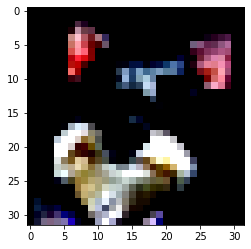

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




2 [ Predicted Value: bird, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


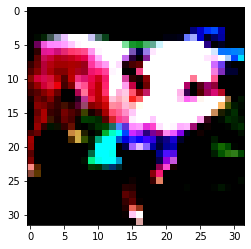



3 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


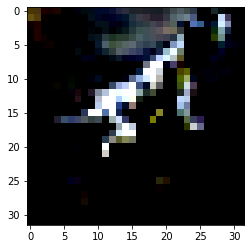

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




4 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


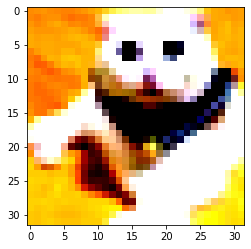

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




5 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


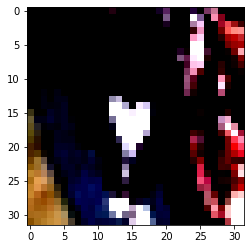

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




6 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


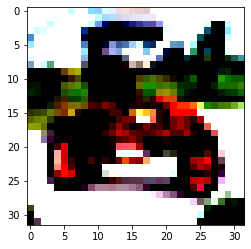

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




7 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


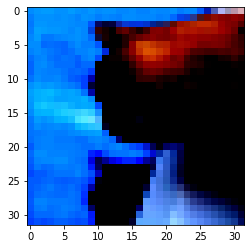

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




8 [ Predicted Value: cat, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


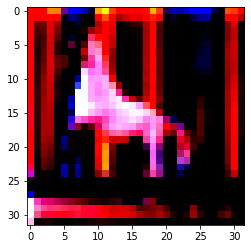

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




9 [ Predicted Value: bird, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


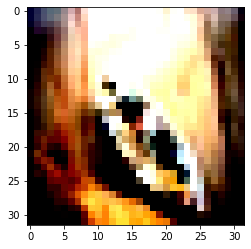

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




10 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


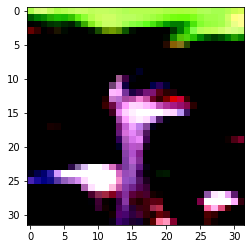

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




11 [ Predicted Value: plane, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


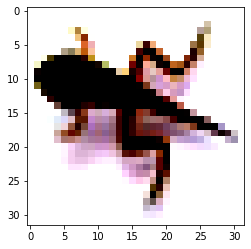

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




12 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


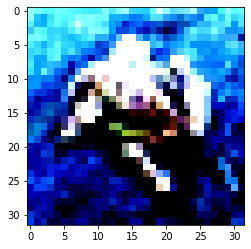

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




13 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


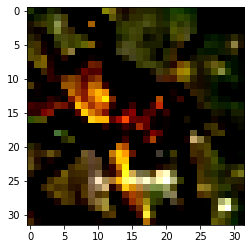

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




14 [ Predicted Value: cat, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


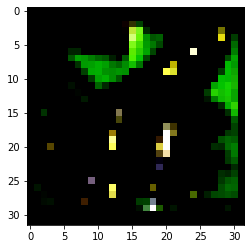

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




15 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


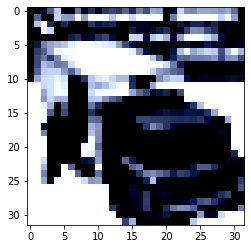

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




16 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


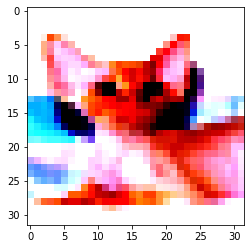

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




17 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


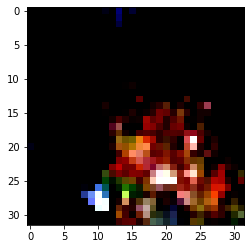



18 [ Predicted Value: plane, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


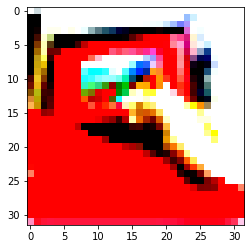



19 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


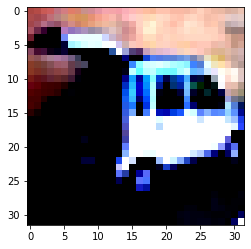

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




20 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


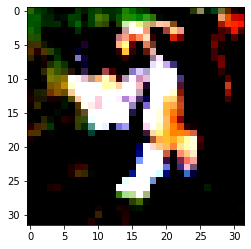

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




21 [ Predicted Value: truck, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


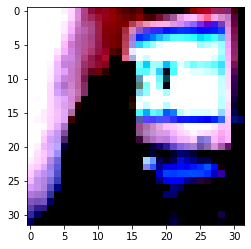

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




22 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


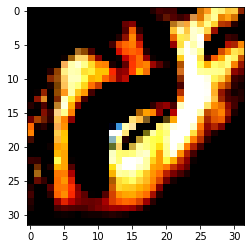

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




23 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


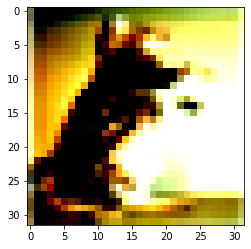

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




24 [ Predicted Value: car, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


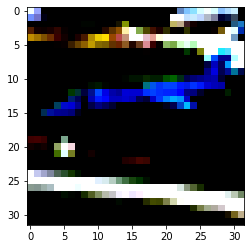

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




25 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


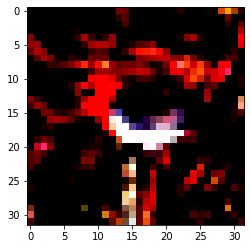

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




26 [ Predicted Value: car, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


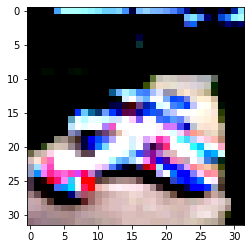

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




27 [ Predicted Value: bird, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


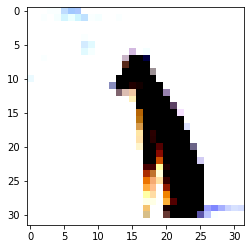

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




28 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


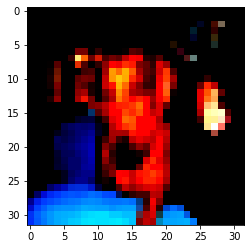

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




29 [ Predicted Value: horse, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


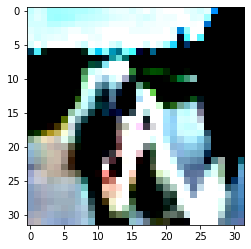

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




30 [ Predicted Value: deer, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


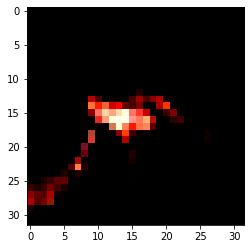

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




31 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


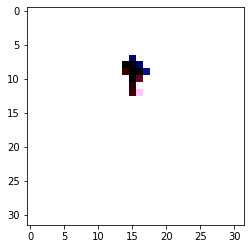

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




32 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


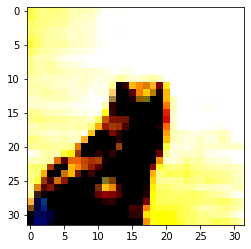

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




33 [ Predicted Value: plane, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


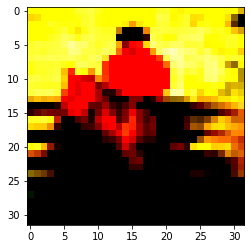



34 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


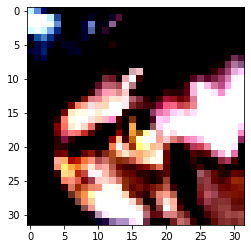

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




35 [ Predicted Value: dog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


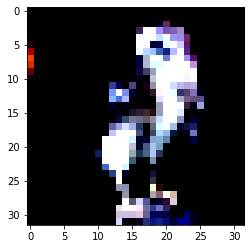

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




36 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


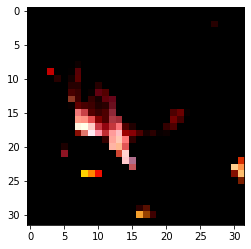

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




37 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


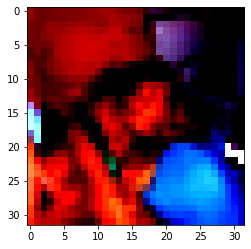

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




38 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


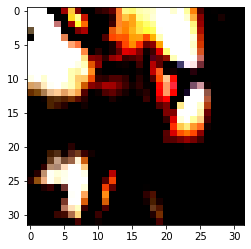

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




39 [ Predicted Value: truck, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


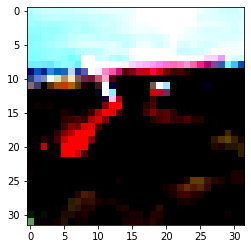

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




40 [ Predicted Value: horse, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


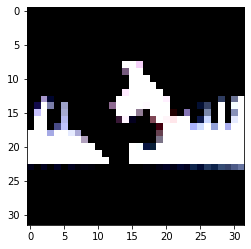

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




41 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


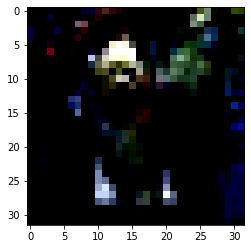

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




42 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


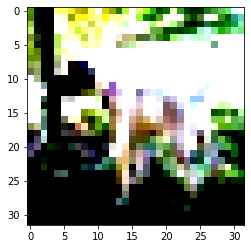

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




43 [ Predicted Value: horse, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


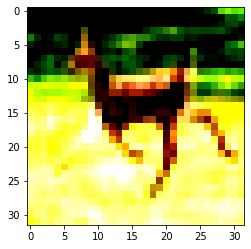

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




44 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


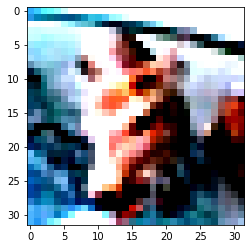

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




45 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


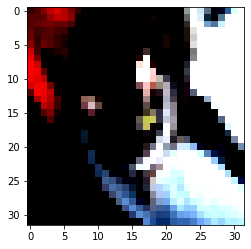

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




46 [ Predicted Value: dog, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


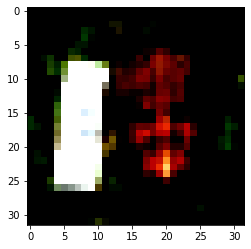

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




47 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


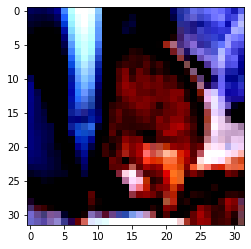

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




48 [ Predicted Value: cat, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


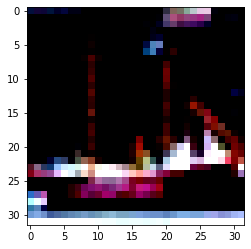

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




49 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


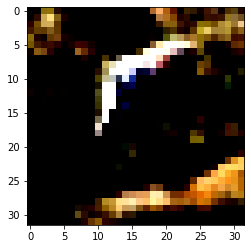



50 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


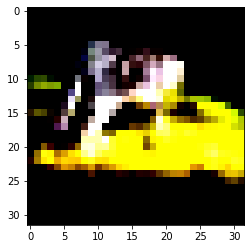

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




51 [ Predicted Value: deer, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


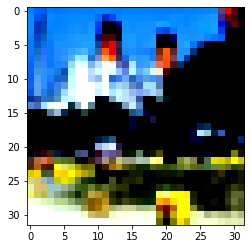

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




52 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


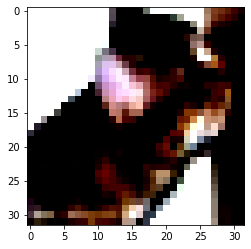

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




53 [ Predicted Value: horse, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


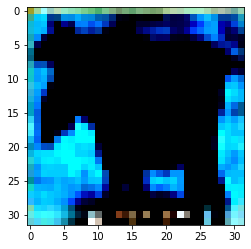

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




54 [ Predicted Value: dog, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


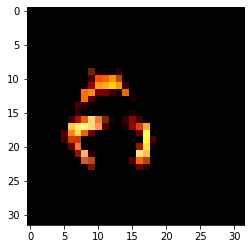

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




55 [ Predicted Value: cat, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


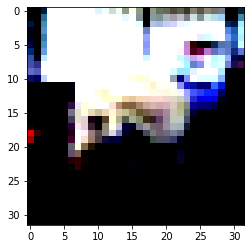

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




56 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


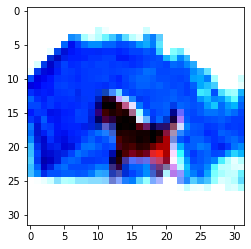

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




57 [ Predicted Value: cat, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


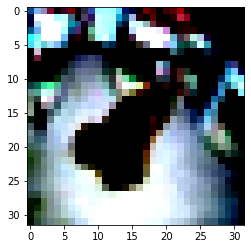

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




58 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


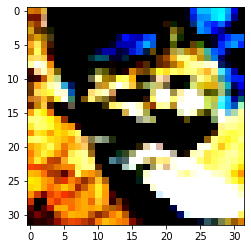

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




59 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


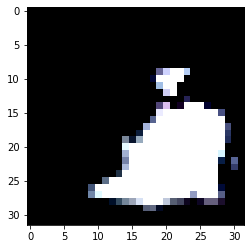

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




60 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


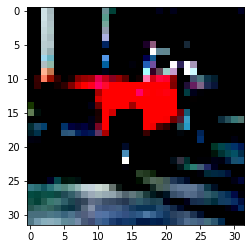

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




61 [ Predicted Value: bird, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


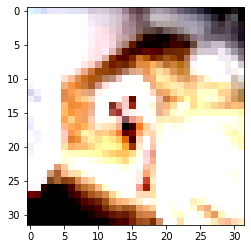

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




62 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


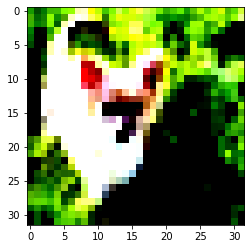

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




63 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


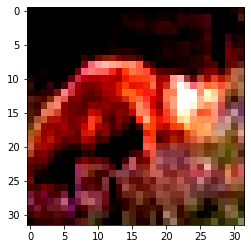

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




64 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


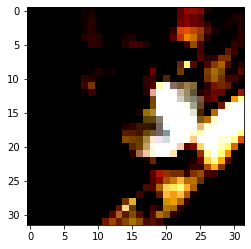

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




65 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


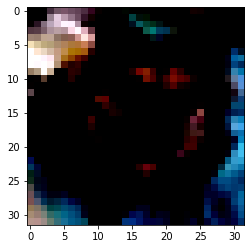



66 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


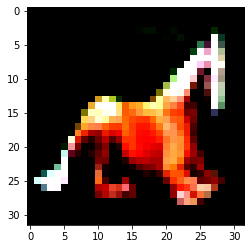



67 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


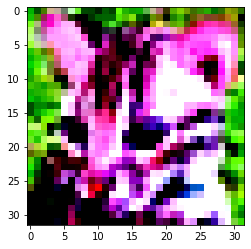

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




68 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


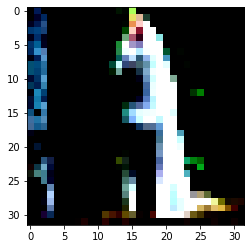

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




69 [ Predicted Value: bird, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


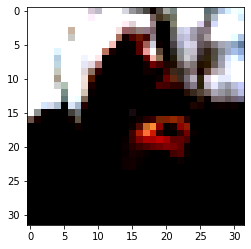

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




70 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


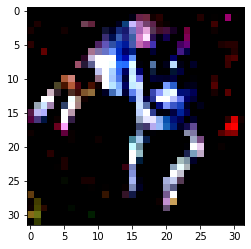

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




71 [ Predicted Value: car, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


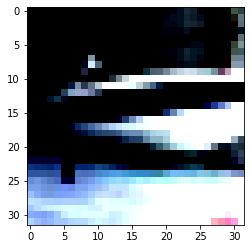

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




72 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


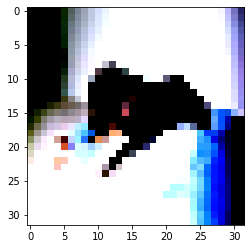

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




73 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


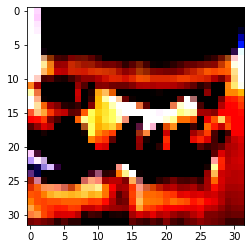

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




74 [ Predicted Value: deer, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


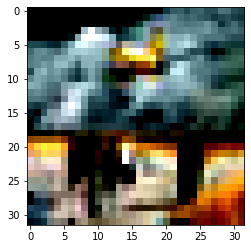

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




75 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


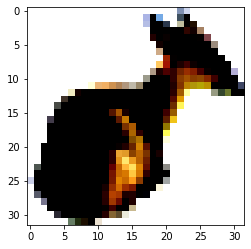

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




76 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


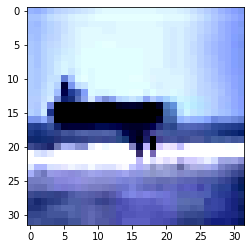

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




77 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


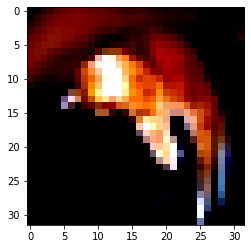

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




78 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


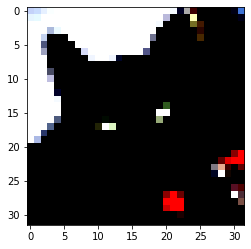

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




79 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


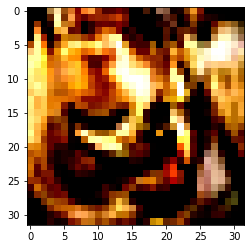

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




80 [ Predicted Value: deer, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


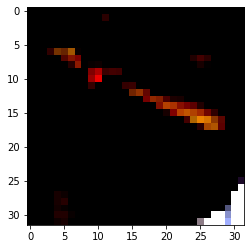

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




81 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


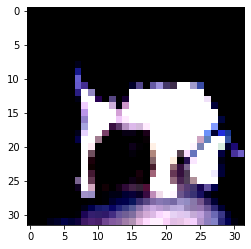



82 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


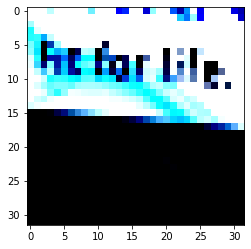



83 [ Predicted Value: bird, Actual Value: plane ]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



(3, 32, 32)
(32, 32, 3)


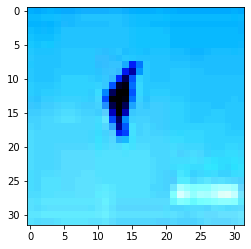

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




84 [ Predicted Value: car, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


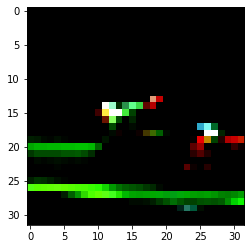

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




85 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




86 [ Predicted Value: dog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


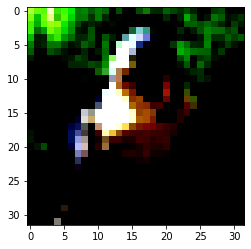

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




87 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




88 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




89 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


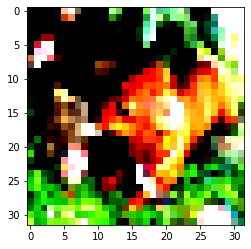

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




90 [ Predicted Value: plane, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


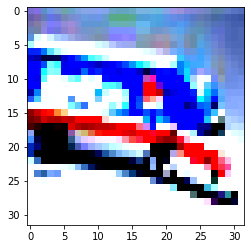

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




91 [ Predicted Value: deer, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




92 [ Predicted Value: dog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




93 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


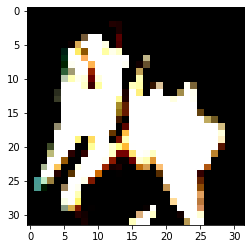

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




94 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


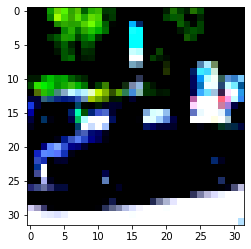

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




95 [ Predicted Value: bird, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


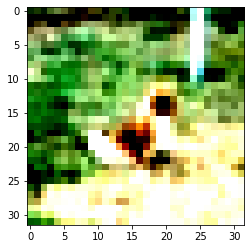

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




96 [ Predicted Value: cat, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


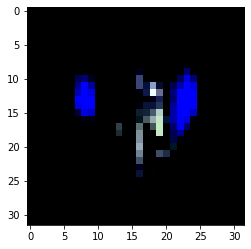

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




97 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


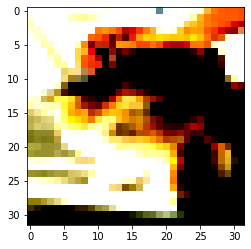



98 [ Predicted Value: dog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


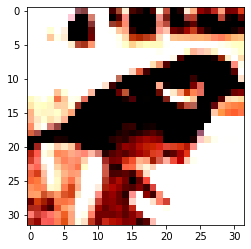



99 [ Predicted Value: cat, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


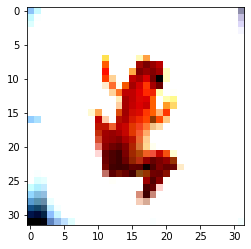

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




100 [ Predicted Value: ship, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


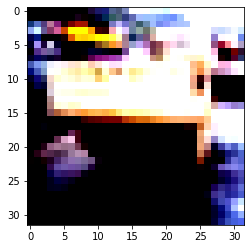

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




101 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


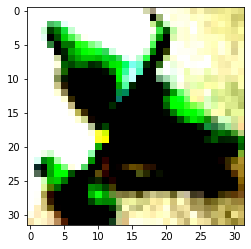

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




102 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


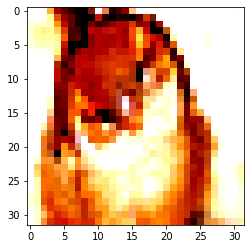

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




103 [ Predicted Value: bird, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


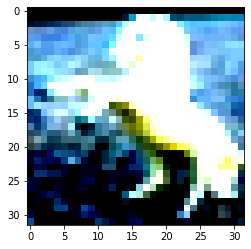

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




104 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


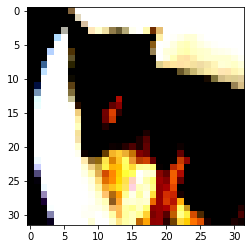

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




105 [ Predicted Value: cat, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


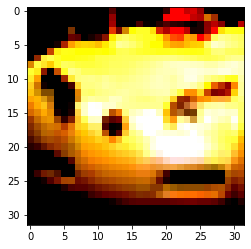

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




106 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


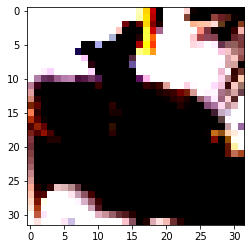

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




107 [ Predicted Value: horse, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


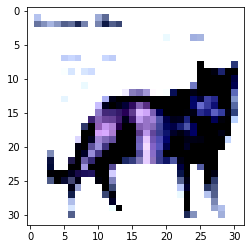

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




108 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


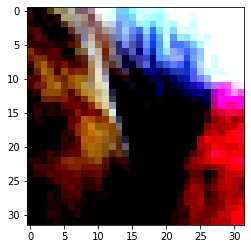

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




109 [ Predicted Value: ship, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


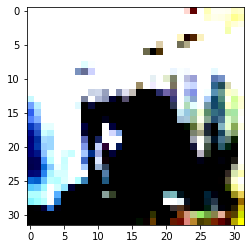

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




110 [ Predicted Value: dog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


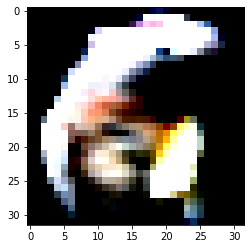

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




111 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


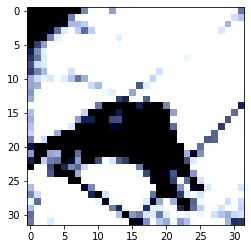

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




112 [ Predicted Value: ship, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


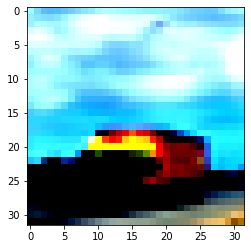

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




113 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


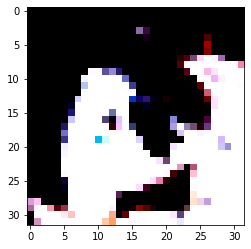



114 [ Predicted Value: horse, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


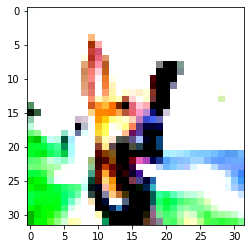



115 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


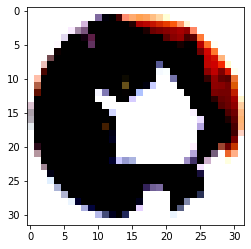

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




116 [ Predicted Value: bird, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


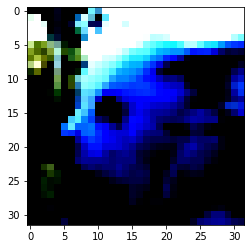

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




117 [ Predicted Value: bird, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


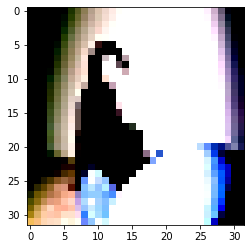

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




118 [ Predicted Value: horse, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


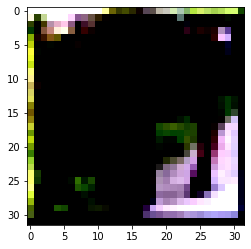

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




119 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


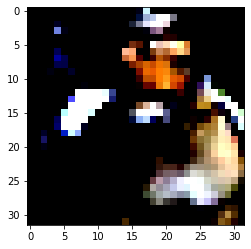

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




120 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


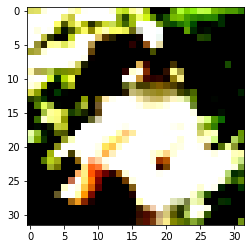

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




121 [ Predicted Value: ship, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


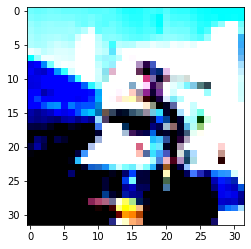

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




122 [ Predicted Value: car, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


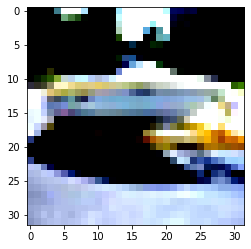

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




123 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


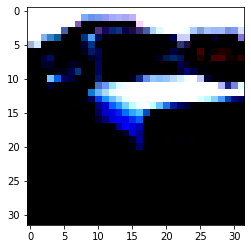

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




124 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


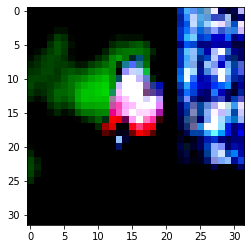

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




125 [ Predicted Value: truck, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


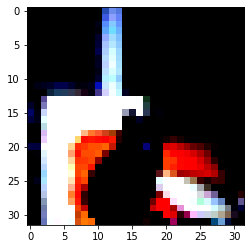

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




126 [ Predicted Value: cat, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


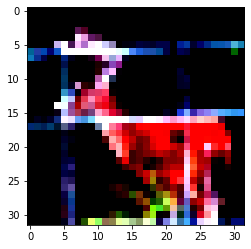

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




127 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


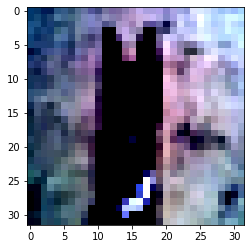

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




128 [ Predicted Value: deer, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


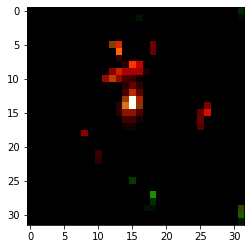

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




129 [ Predicted Value: cat, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


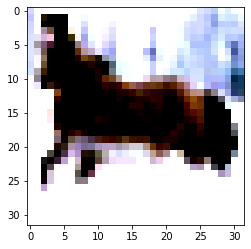



130 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


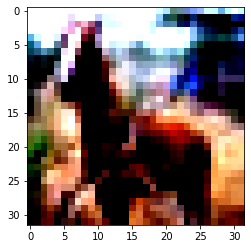



131 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


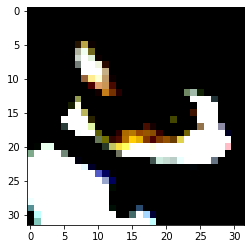

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




132 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


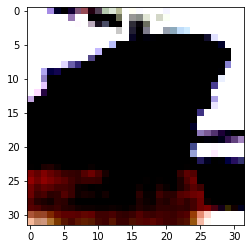

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




133 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


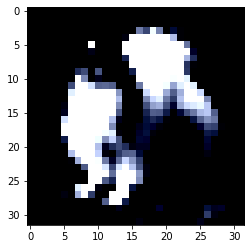

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




134 [ Predicted Value: bird, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


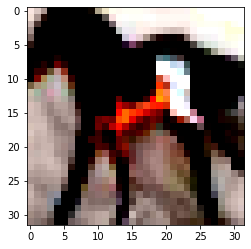

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




135 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


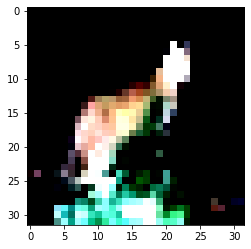

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




136 [ Predicted Value: ship, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


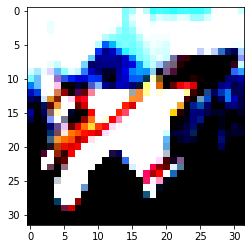

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




137 [ Predicted Value: horse, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


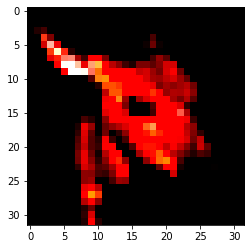

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




138 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


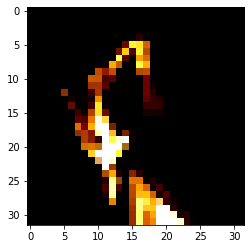

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




139 [ Predicted Value: dog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


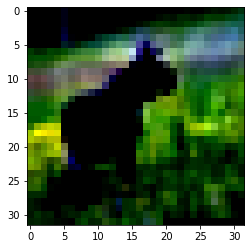

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




140 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


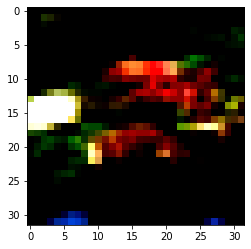

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




141 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


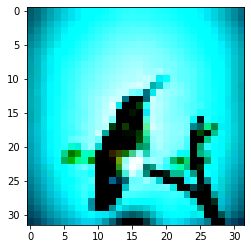

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




142 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


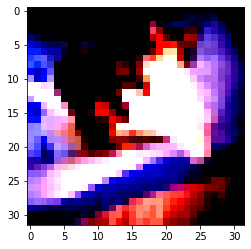

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




143 [ Predicted Value: horse, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


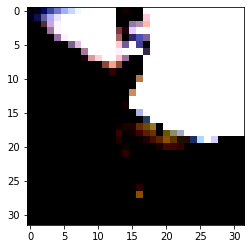

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




144 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


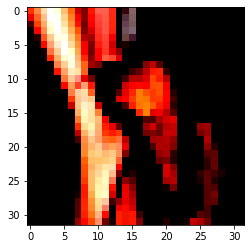

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




145 [ Predicted Value: cat, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


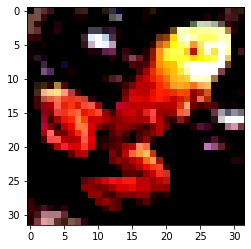



146 [ Predicted Value: ship, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


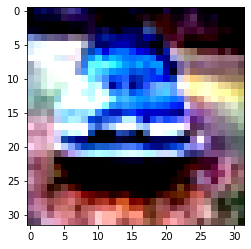

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




147 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


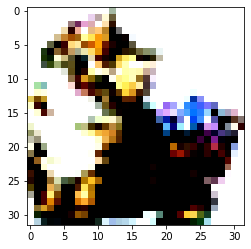

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




148 [ Predicted Value: bird, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


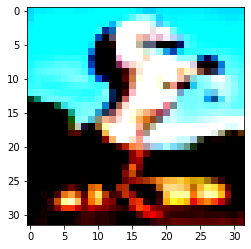

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




149 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


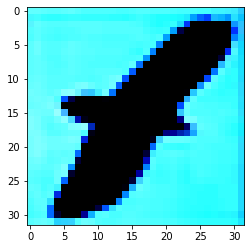

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




150 [ Predicted Value: frog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


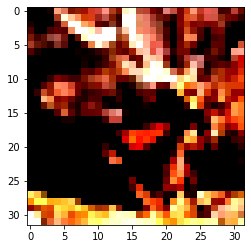

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




151 [ Predicted Value: dog, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


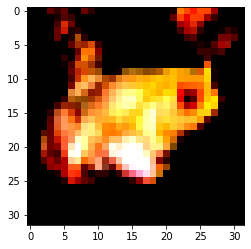

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




152 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


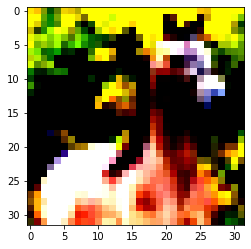

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




153 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


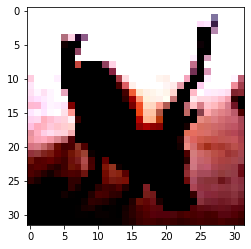

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




154 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


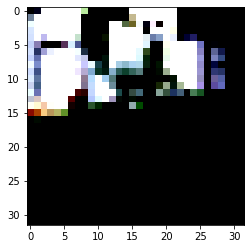

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




155 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


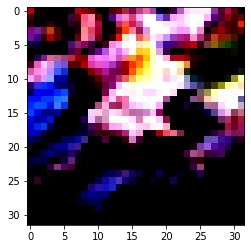

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




156 [ Predicted Value: ship, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


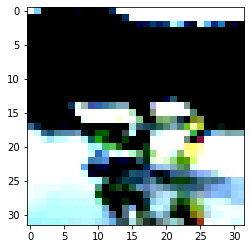

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




157 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


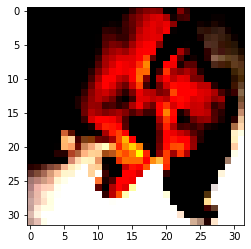

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




158 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


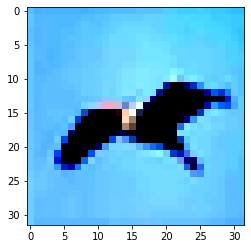

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




159 [ Predicted Value: plane, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


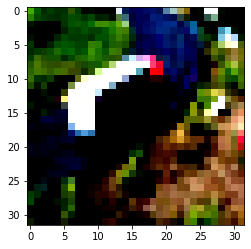

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




160 [ Predicted Value: car, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


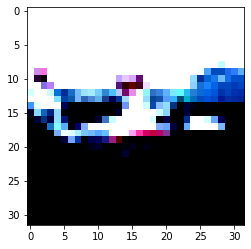

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




161 [ Predicted Value: frog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


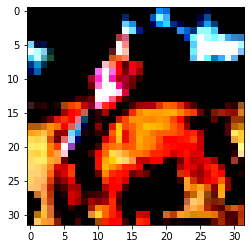



162 [ Predicted Value: deer, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


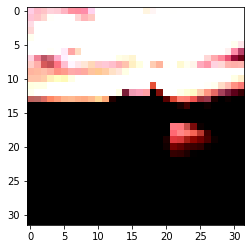

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




163 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


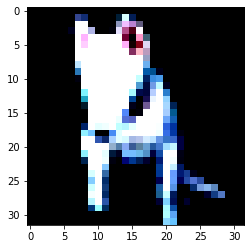

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




164 [ Predicted Value: plane, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


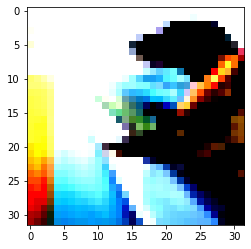

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




165 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


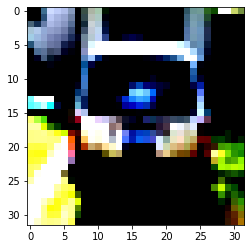

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




166 [ Predicted Value: horse, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


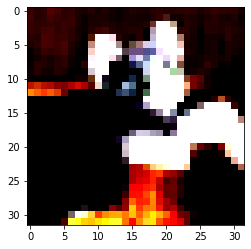

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




167 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


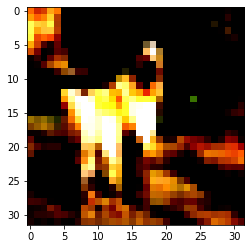

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




168 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


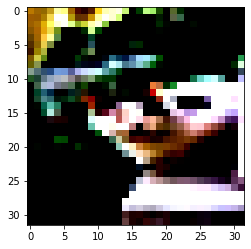

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




169 [ Predicted Value: truck, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


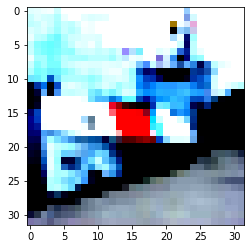

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




170 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


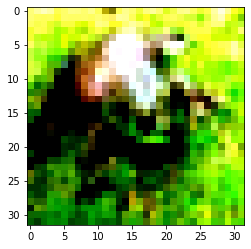

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




171 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


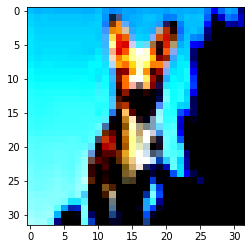

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




172 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


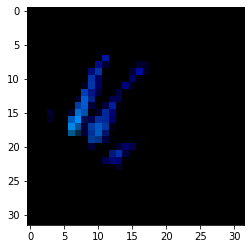

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




173 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


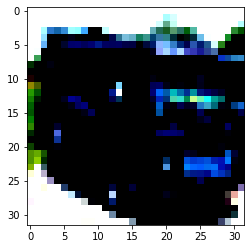

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




174 [ Predicted Value: frog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


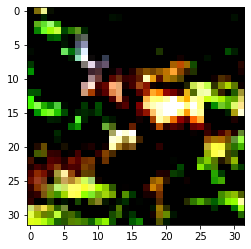

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




175 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


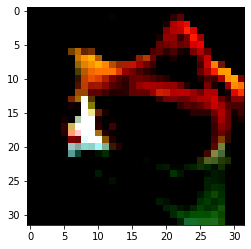

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




176 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


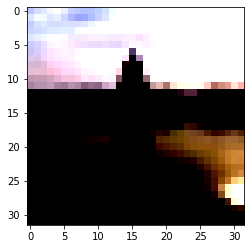

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




177 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


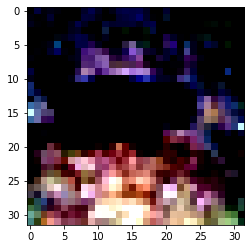



178 [ Predicted Value: horse, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


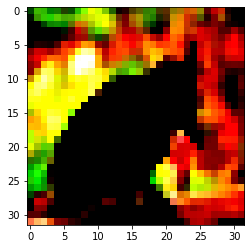

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




179 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


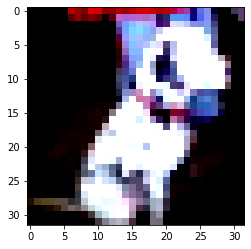

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




180 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


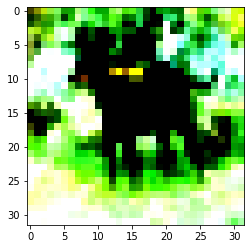

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




181 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


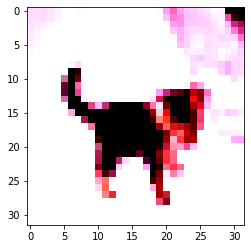

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




182 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


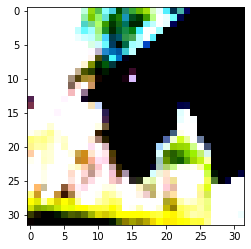

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




183 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


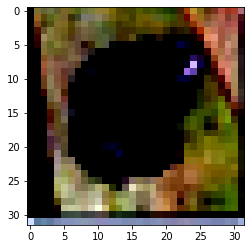

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




184 [ Predicted Value: truck, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


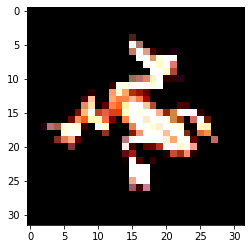

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




185 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


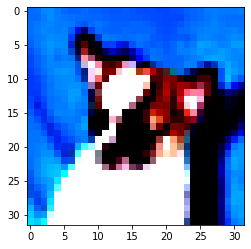

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




186 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


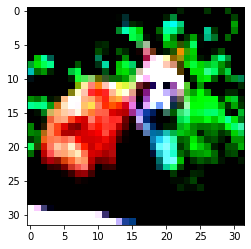

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




187 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


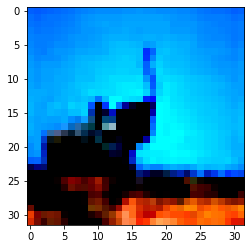

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




188 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


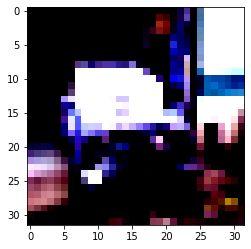

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




189 [ Predicted Value: cat, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


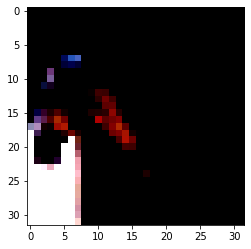

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




190 [ Predicted Value: bird, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


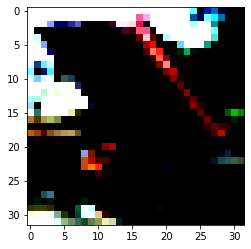

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




191 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


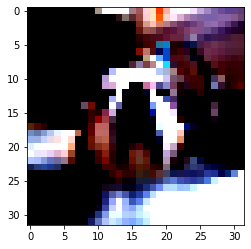

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




192 [ Predicted Value: deer, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


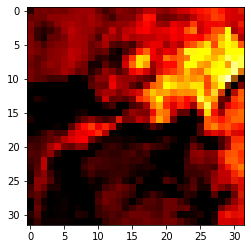

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




193 [ Predicted Value: cat, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


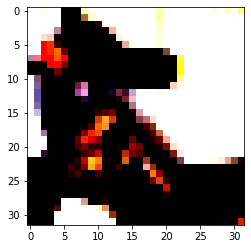



194 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


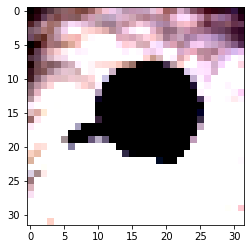

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




195 [ Predicted Value: plane, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


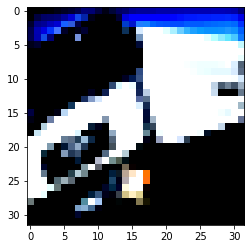

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




196 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


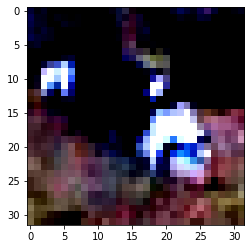

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




197 [ Predicted Value: ship, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


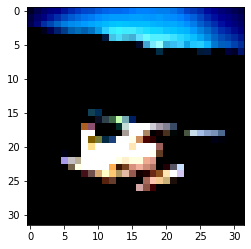

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




198 [ Predicted Value: dog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


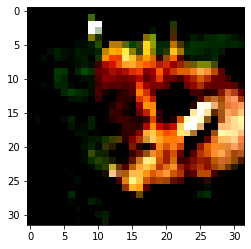

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




199 [ Predicted Value: horse, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


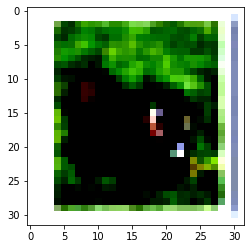

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




200 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


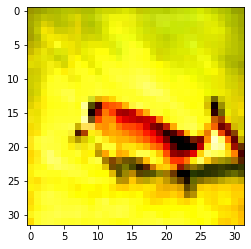

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




201 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


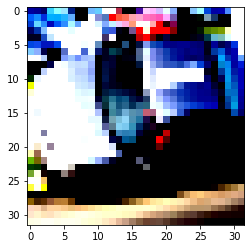

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




202 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


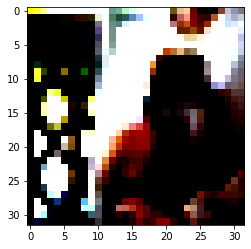

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




203 [ Predicted Value: bird, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


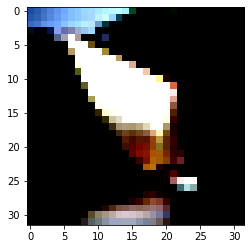

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




204 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


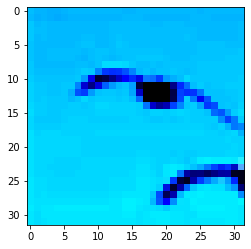

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




205 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


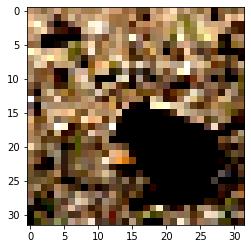

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




206 [ Predicted Value: cat, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


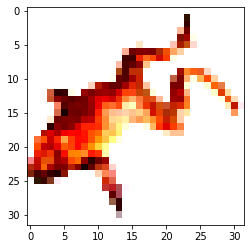

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




207 [ Predicted Value: horse, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


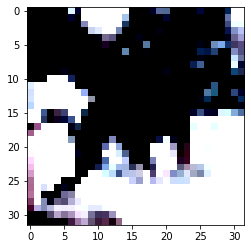

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




208 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


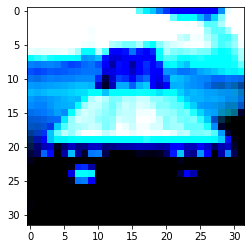

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




209 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


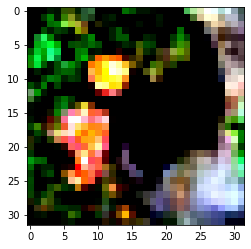



210 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


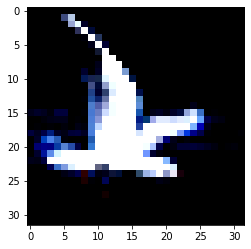

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




211 [ Predicted Value: plane, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


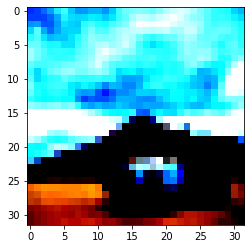

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




212 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


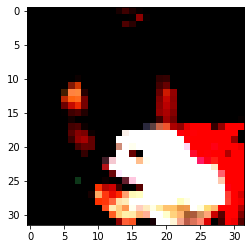

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




213 [ Predicted Value: horse, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


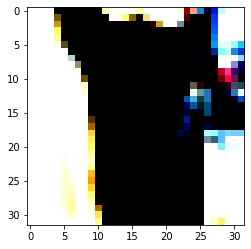

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




214 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


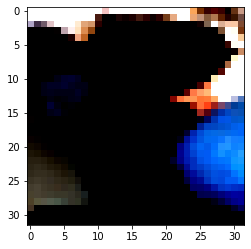

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




215 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


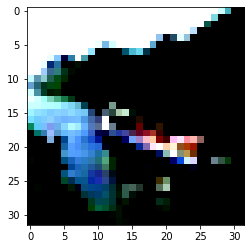

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




216 [ Predicted Value: truck, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


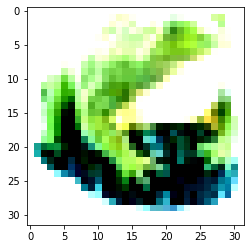

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




217 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


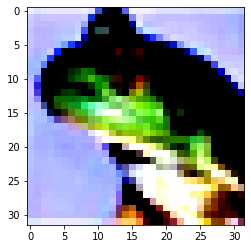

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




218 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


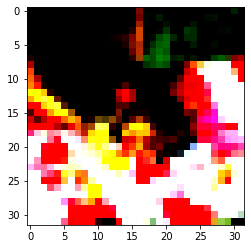

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




219 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


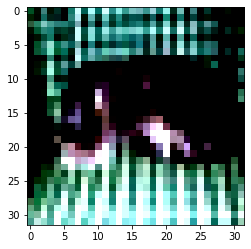

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




220 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


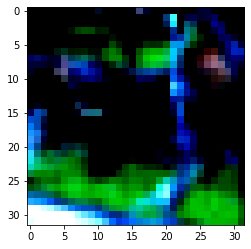

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




221 [ Predicted Value: dog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


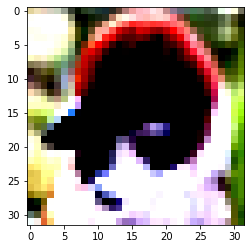

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




222 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


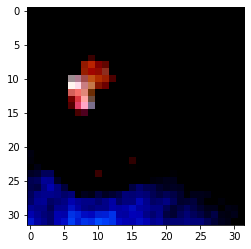

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




223 [ Predicted Value: dog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


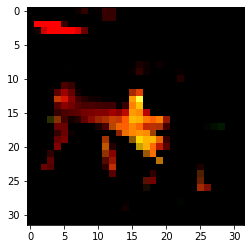

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




224 [ Predicted Value: cat, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


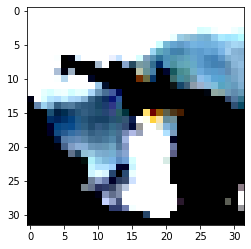

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




225 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


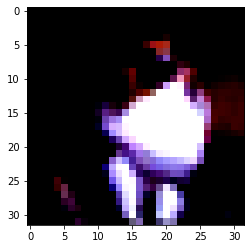



226 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


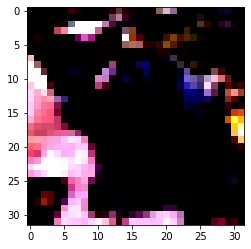



227 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


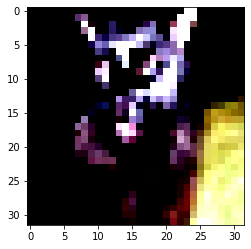

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




228 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


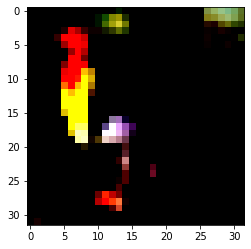

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




229 [ Predicted Value: plane, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


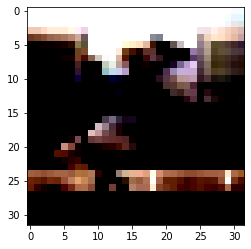

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




230 [ Predicted Value: plane, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


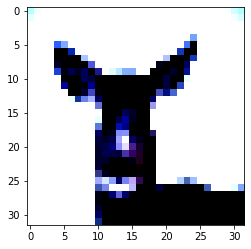

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




231 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


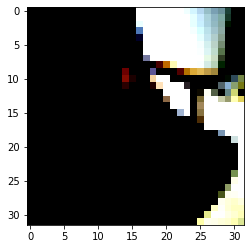

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




232 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


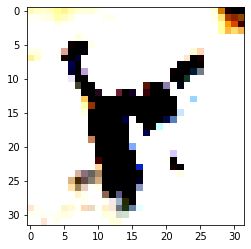

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




233 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


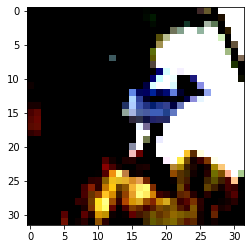

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




234 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


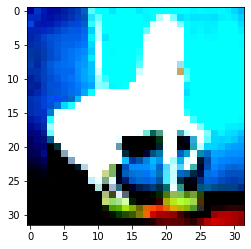

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




235 [ Predicted Value: cat, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


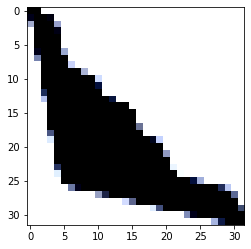

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




236 [ Predicted Value: frog, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


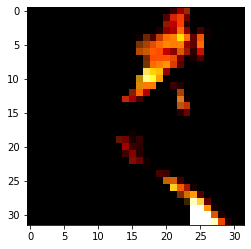

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




237 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


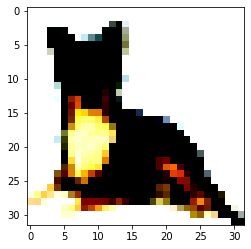

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




238 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


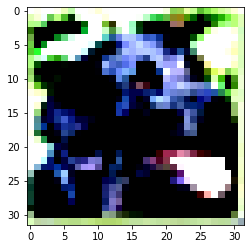

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




239 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


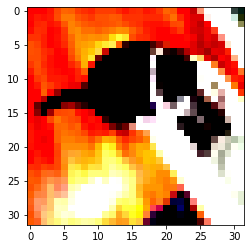

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




240 [ Predicted Value: cat, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


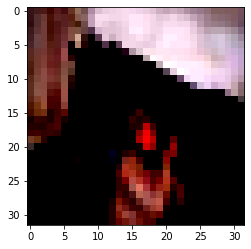

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




241 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


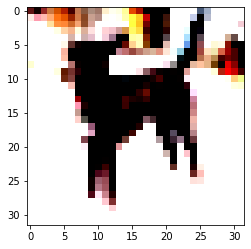



242 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


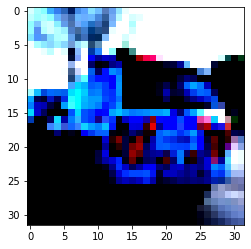



243 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


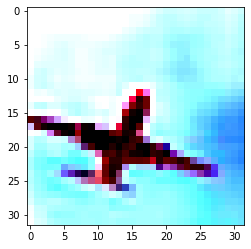

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




244 [ Predicted Value: frog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


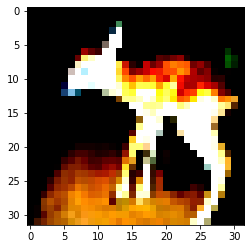

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




245 [ Predicted Value: plane, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


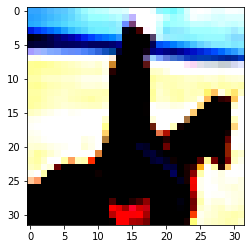

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




246 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


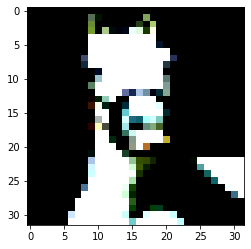

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




247 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


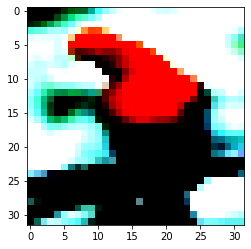

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




248 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


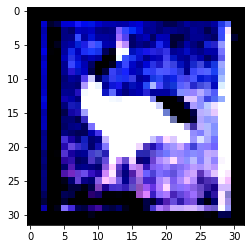

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




249 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


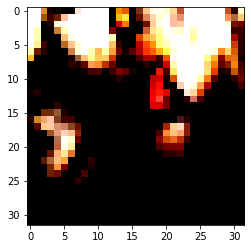

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




250 [ Predicted Value: cat, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


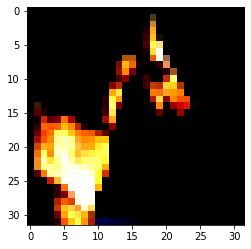

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




251 [ Predicted Value: dog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


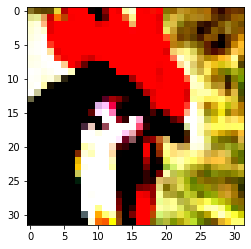

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




252 [ Predicted Value: ship, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


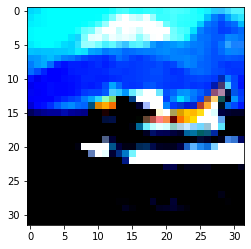

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




253 [ Predicted Value: ship, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


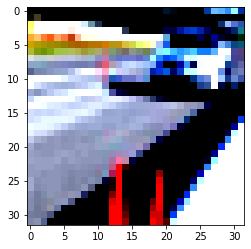

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




254 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


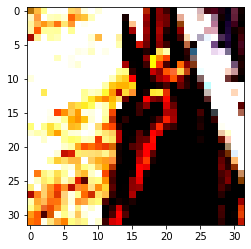

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




255 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


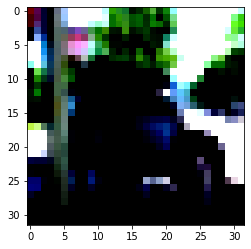

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




256 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


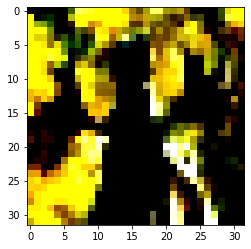

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




257 [ Predicted Value: cat, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


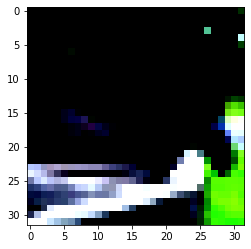



258 [ Predicted Value: horse, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


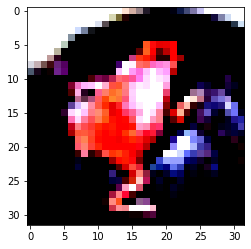

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




259 [ Predicted Value: truck, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


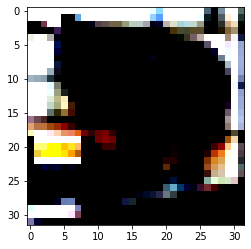

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




260 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


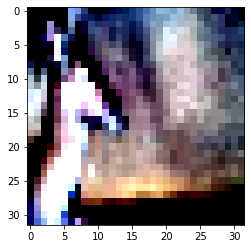

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




261 [ Predicted Value: horse, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


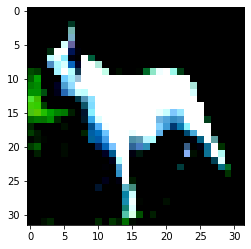

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




262 [ Predicted Value: ship, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


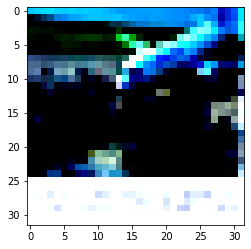

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




263 [ Predicted Value: plane, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


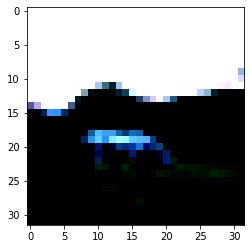

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




264 [ Predicted Value: bird, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


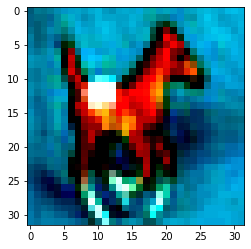

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




265 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


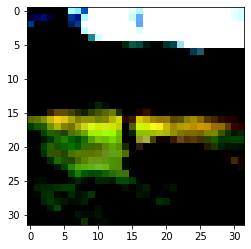

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




266 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


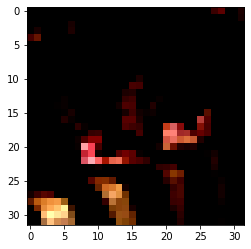

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




267 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


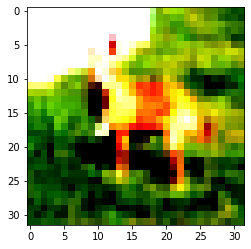

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




268 [ Predicted Value: cat, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


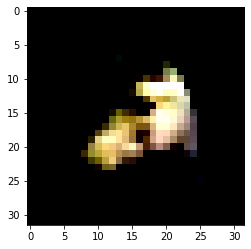

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




269 [ Predicted Value: car, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


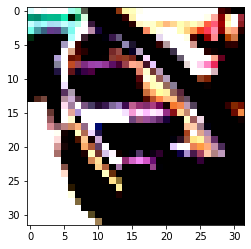

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




270 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


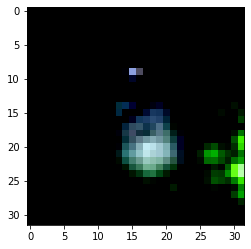

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




271 [ Predicted Value: ship, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


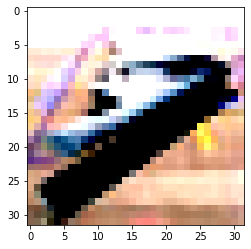

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




272 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


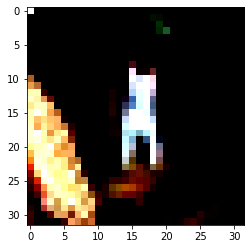

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




273 [ Predicted Value: plane, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


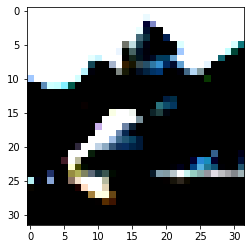



274 [ Predicted Value: dog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


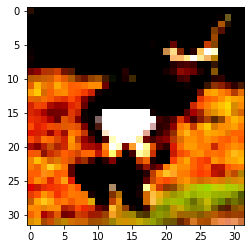



275 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


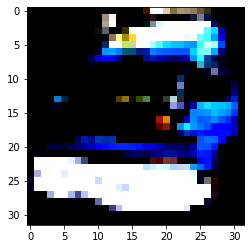

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




276 [ Predicted Value: frog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


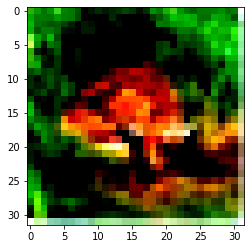

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




277 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


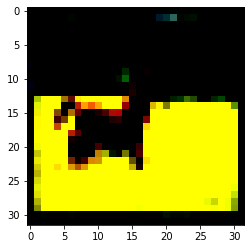

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




278 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


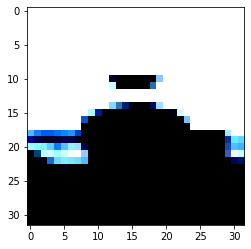

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




279 [ Predicted Value: dog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


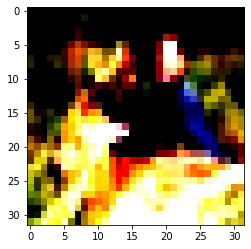

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




280 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


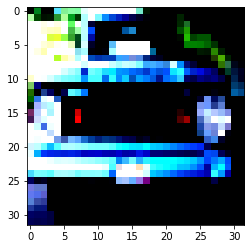

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




281 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


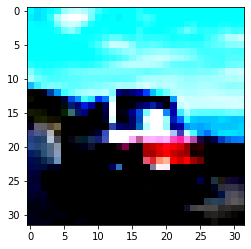

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




282 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


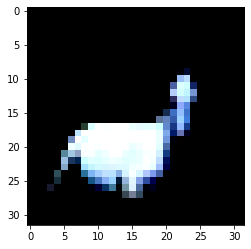

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




283 [ Predicted Value: plane, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


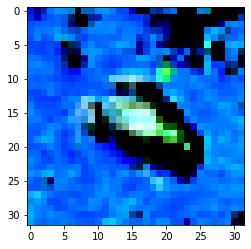

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




284 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


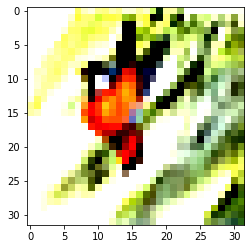

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




285 [ Predicted Value: cat, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


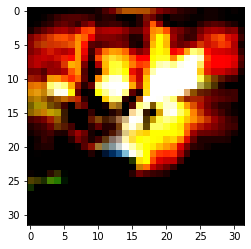



286 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


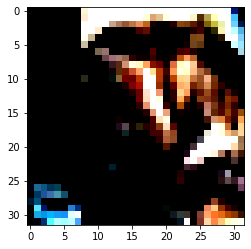

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




287 [ Predicted Value: cat, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


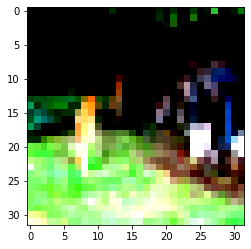

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




288 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


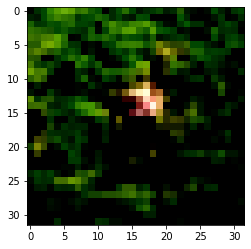

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




289 [ Predicted Value: car, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


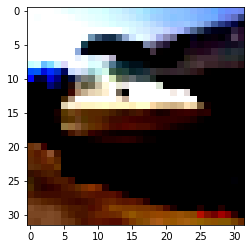

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




290 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


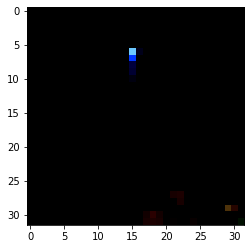



291 [ Predicted Value: ship, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


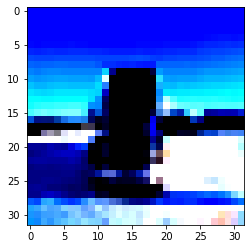

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




292 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


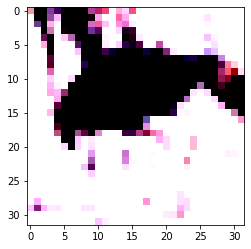

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




293 [ Predicted Value: cat, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


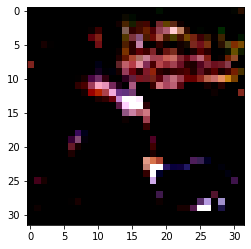

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




294 [ Predicted Value: ship, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


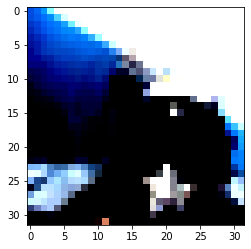

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




295 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


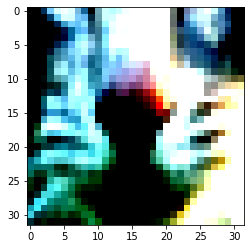



296 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


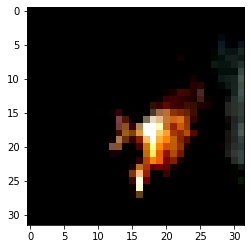

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




297 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


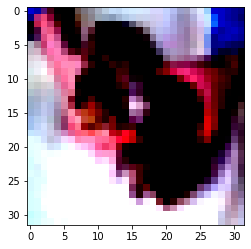

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




298 [ Predicted Value: horse, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


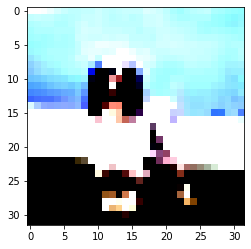

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




299 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


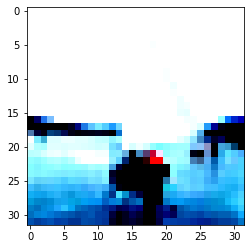

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




300 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


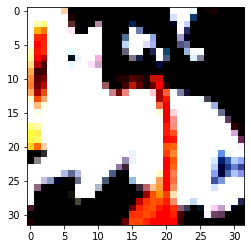

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




301 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


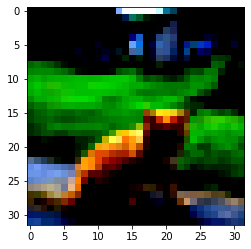

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




302 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


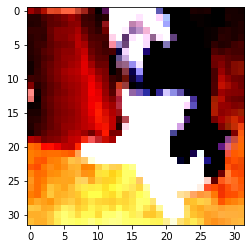

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




303 [ Predicted Value: cat, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


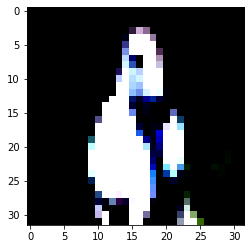

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




304 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


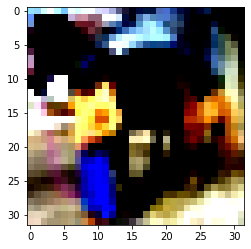

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




305 [ Predicted Value: ship, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


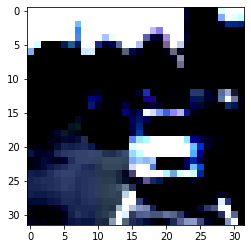



306 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


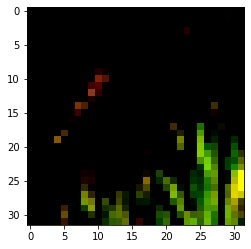



307 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


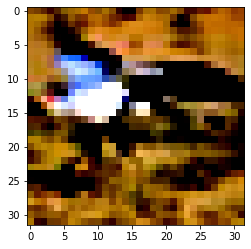

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




308 [ Predicted Value: deer, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


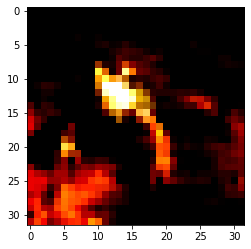

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




309 [ Predicted Value: bird, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


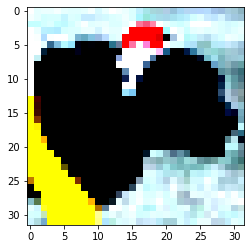

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




310 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


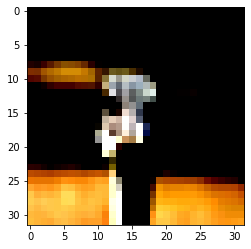

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




311 [ Predicted Value: truck, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


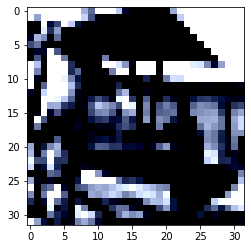

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




312 [ Predicted Value: car, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


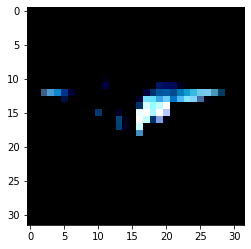

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




313 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


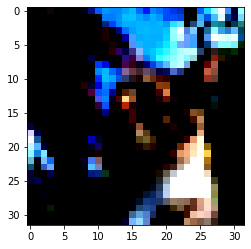

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




314 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


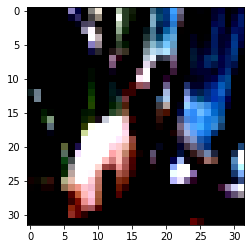

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




315 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


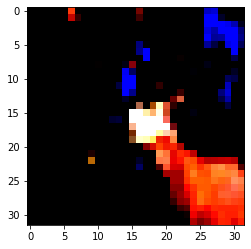

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




316 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


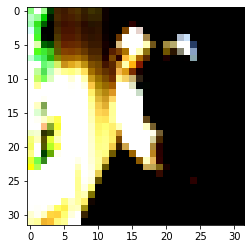

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




317 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


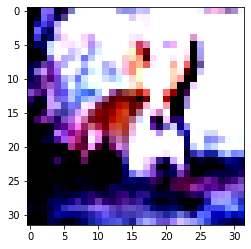

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




318 [ Predicted Value: horse, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


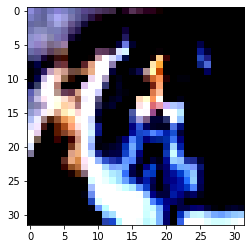

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




319 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


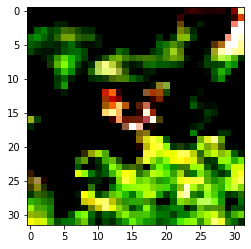

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




320 [ Predicted Value: horse, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


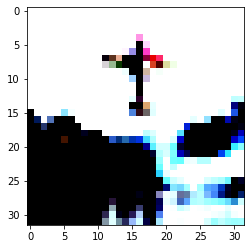

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




321 [ Predicted Value: horse, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


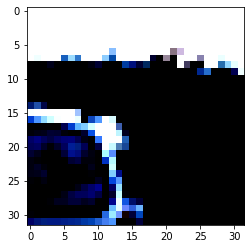



322 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


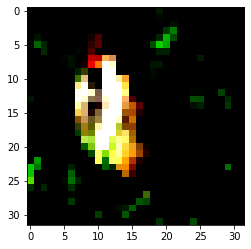



323 [ Predicted Value: truck, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


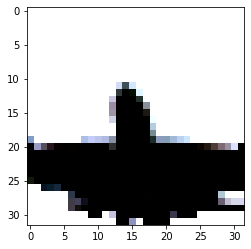

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




324 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


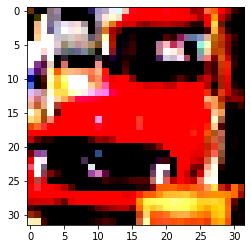

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




325 [ Predicted Value: ship, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


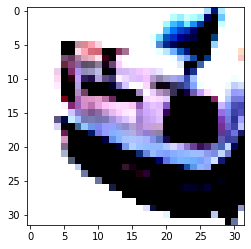

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




326 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


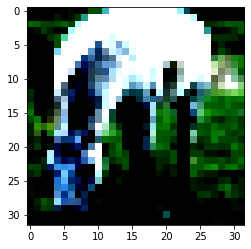

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




327 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


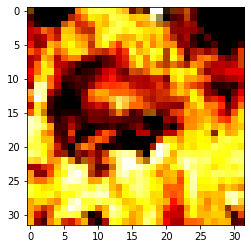

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




328 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


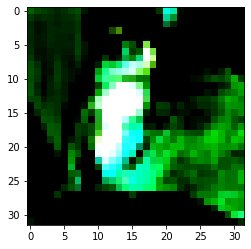

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




329 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


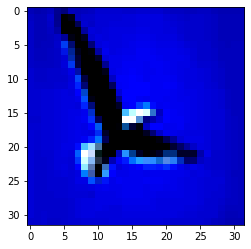

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




330 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


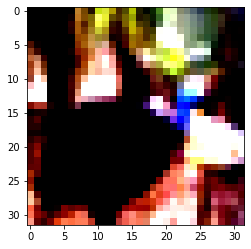

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




331 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


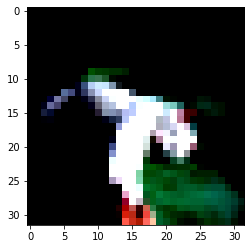

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




332 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


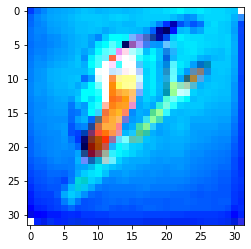

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




333 [ Predicted Value: horse, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


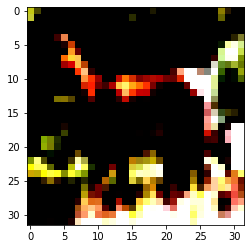

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




334 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


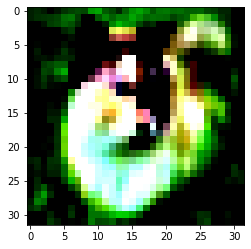

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




335 [ Predicted Value: frog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


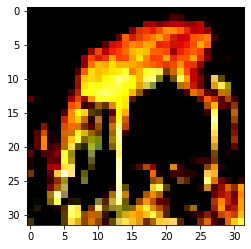

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




336 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


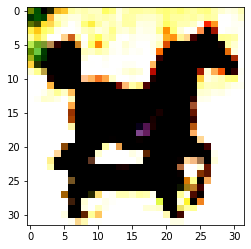

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




337 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


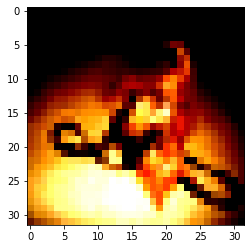



338 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


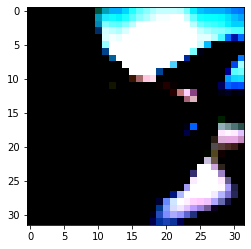



339 [ Predicted Value: ship, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


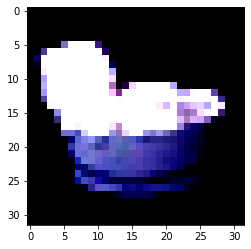

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




340 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


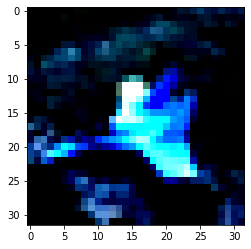

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




341 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


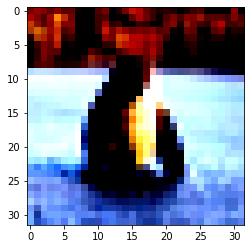

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




342 [ Predicted Value: frog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


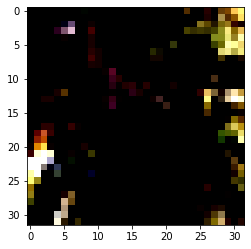

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




343 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


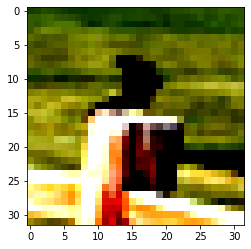

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




344 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


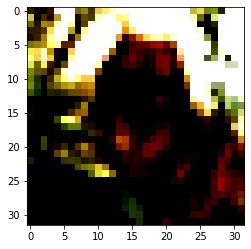

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




345 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


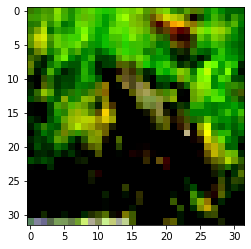

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




346 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


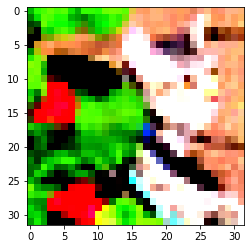

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




347 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


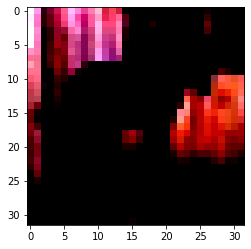

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




348 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


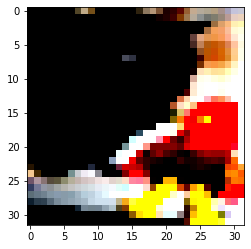

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




349 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


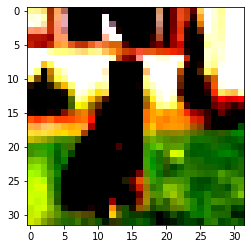

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




350 [ Predicted Value: horse, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


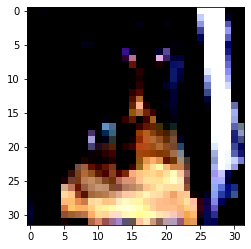

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




351 [ Predicted Value: plane, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


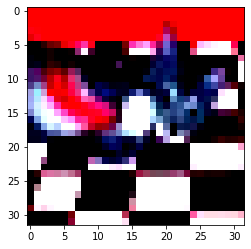

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




352 [ Predicted Value: plane, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


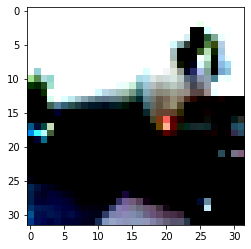

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




353 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


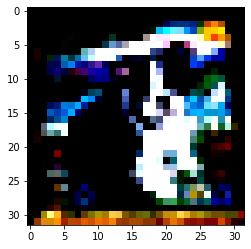



354 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


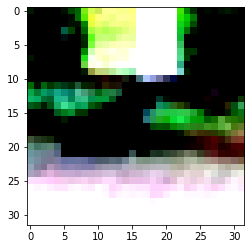



355 [ Predicted Value: truck, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


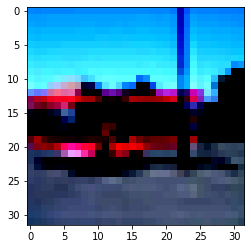

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




356 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


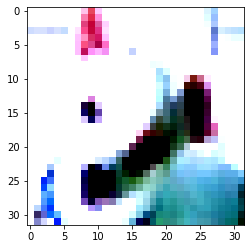

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




357 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


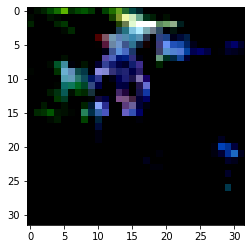

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




358 [ Predicted Value: horse, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


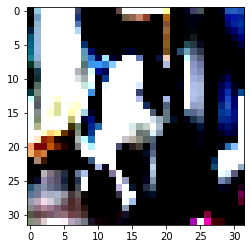

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




359 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


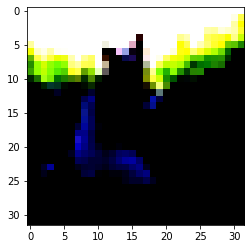

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




360 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


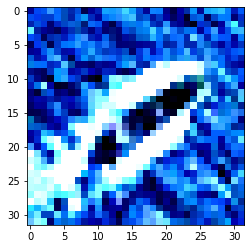

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




361 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


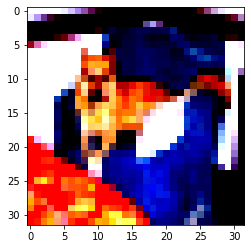

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




362 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


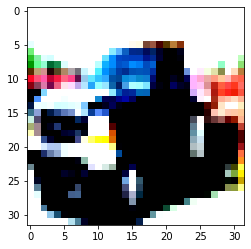

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




363 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


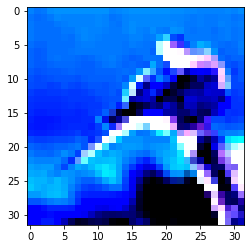

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




364 [ Predicted Value: ship, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


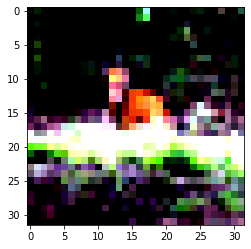

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




365 [ Predicted Value: bird, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


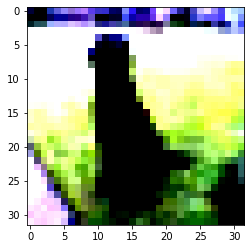

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




366 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


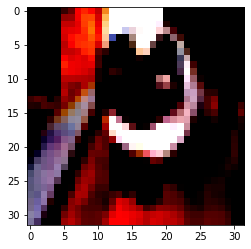

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




367 [ Predicted Value: dog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


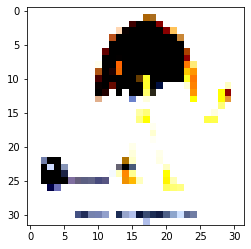

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




368 [ Predicted Value: dog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


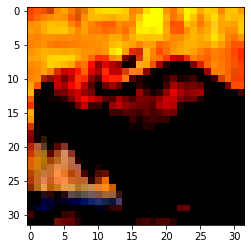

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




369 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


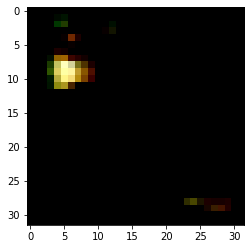



370 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


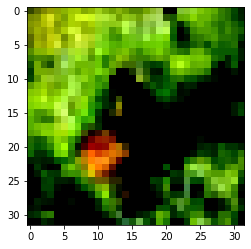



371 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


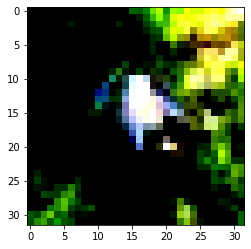

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




372 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


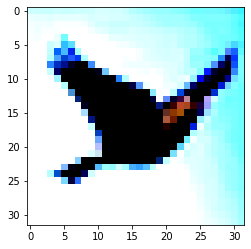

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




373 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


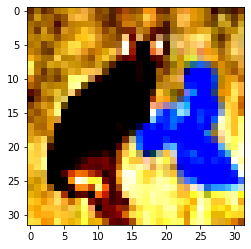

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




374 [ Predicted Value: truck, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


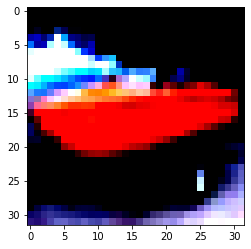

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




375 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


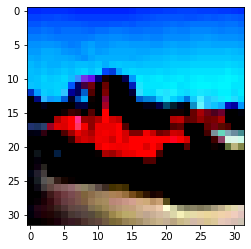

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




376 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


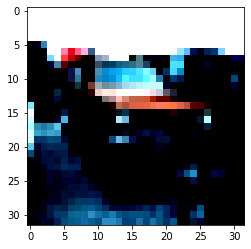

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




377 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


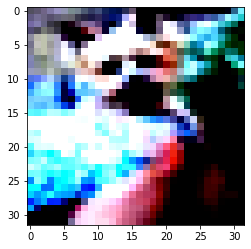

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




378 [ Predicted Value: plane, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


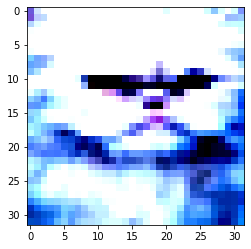

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




379 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


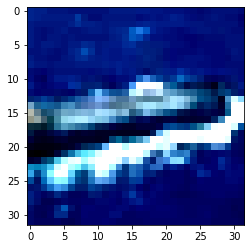

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




380 [ Predicted Value: horse, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


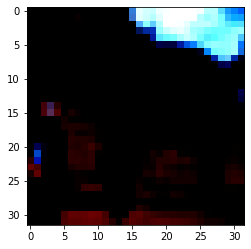

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




381 [ Predicted Value: plane, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


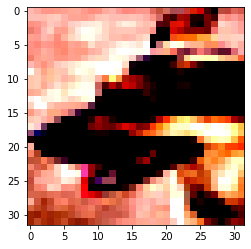

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




382 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


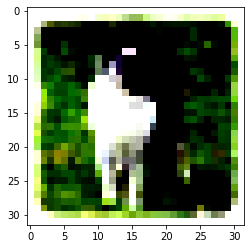

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




383 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


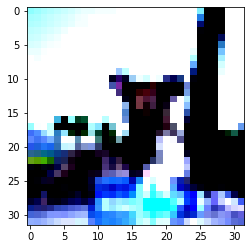

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




384 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


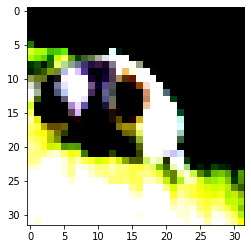

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




385 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


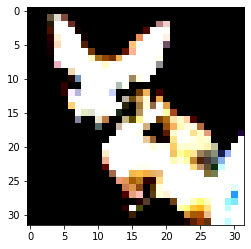



386 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


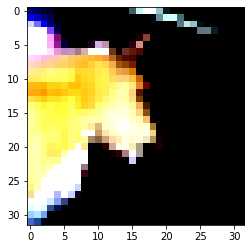



387 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


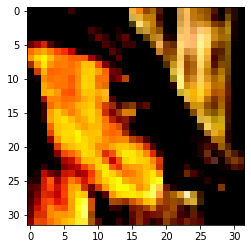

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




388 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


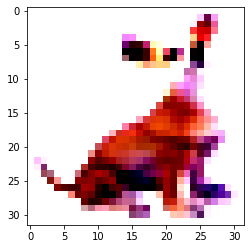

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




389 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


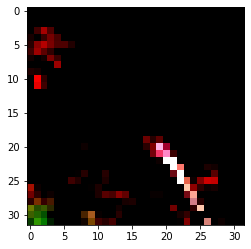

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




390 [ Predicted Value: plane, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


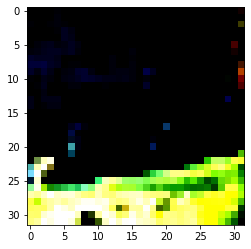

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




391 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


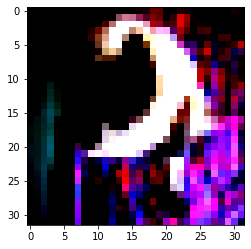

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




392 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


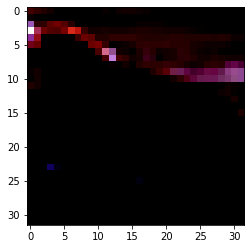

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




393 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


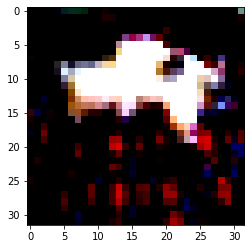

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




394 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


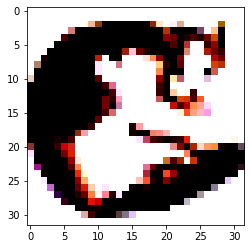

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




395 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


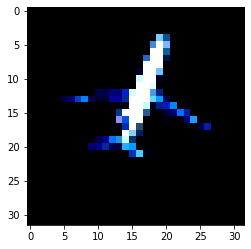

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




396 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


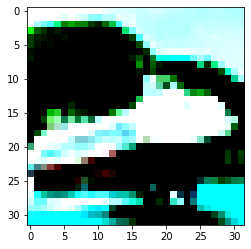

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




397 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


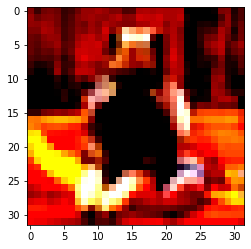

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




398 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


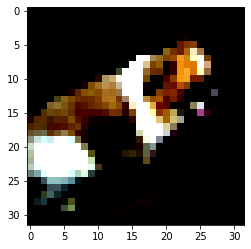

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




399 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


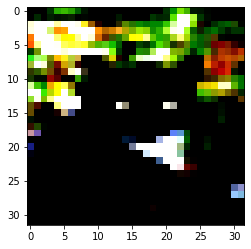

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




400 [ Predicted Value: horse, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


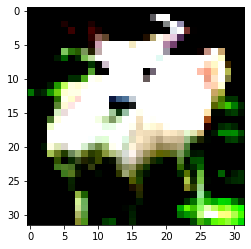

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




401 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


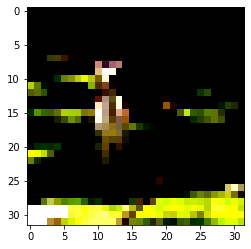



402 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


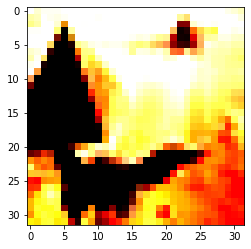

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




403 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


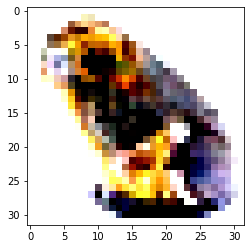

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




404 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


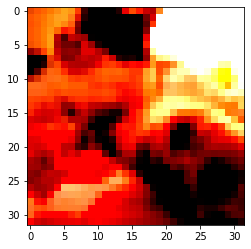

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




405 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


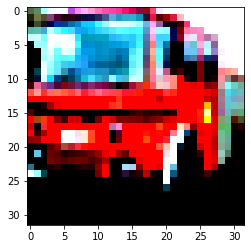

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




406 [ Predicted Value: ship, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


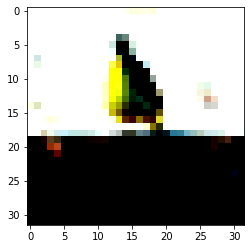

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




407 [ Predicted Value: frog, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


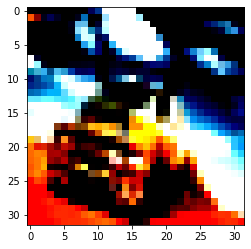

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




408 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


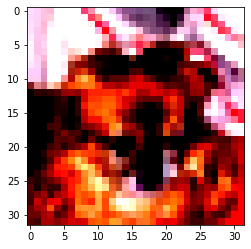

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




409 [ Predicted Value: dog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


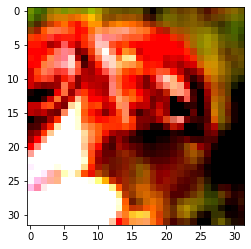

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




410 [ Predicted Value: ship, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


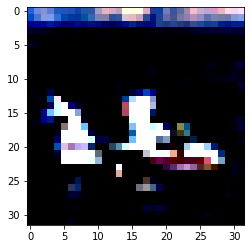

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




411 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


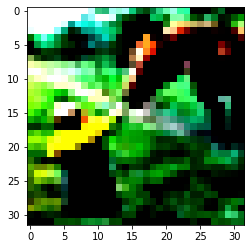

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




412 [ Predicted Value: horse, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


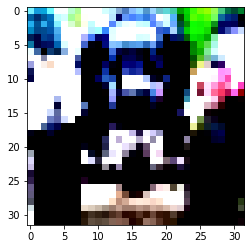

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




413 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


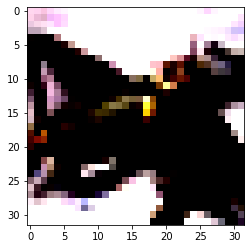

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




414 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


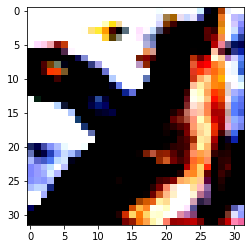

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




415 [ Predicted Value: dog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


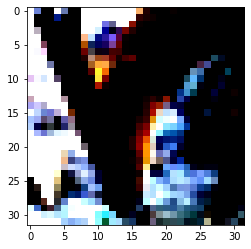

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




416 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


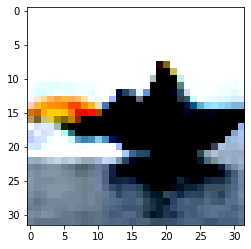

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




417 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


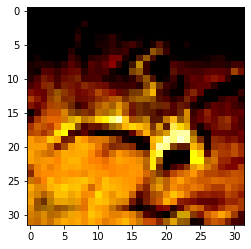



418 [ Predicted Value: horse, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


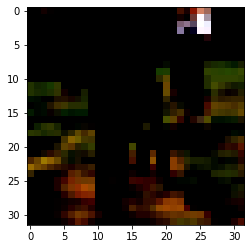



419 [ Predicted Value: bird, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


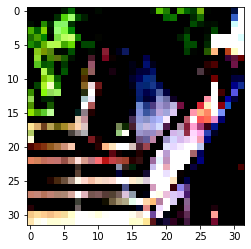

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




420 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


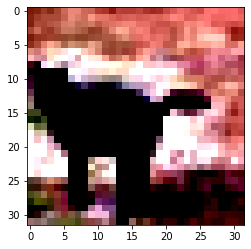

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




421 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


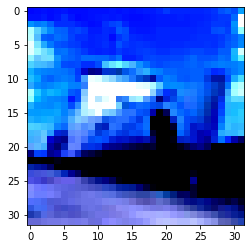

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




422 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


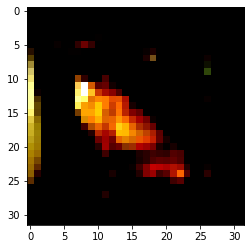

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




423 [ Predicted Value: ship, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


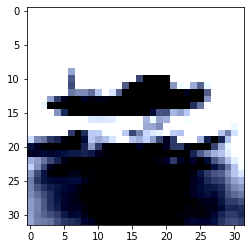

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




424 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


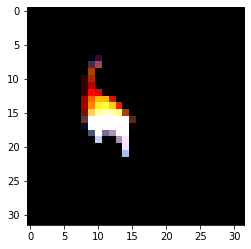

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




425 [ Predicted Value: bird, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


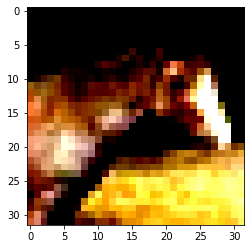

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




426 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


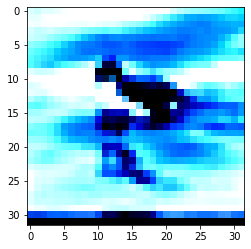

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




427 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


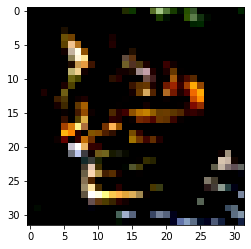

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




428 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


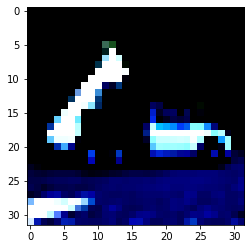

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




429 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


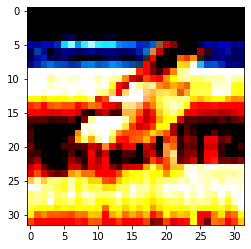

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




430 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


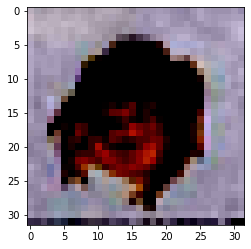

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




431 [ Predicted Value: deer, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


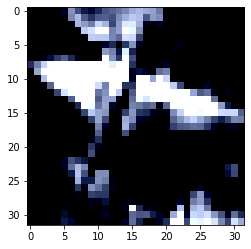

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




432 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


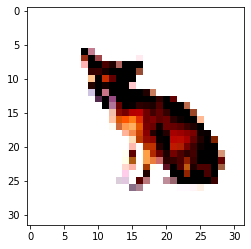

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




433 [ Predicted Value: horse, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


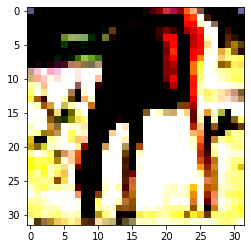



434 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


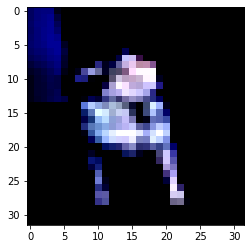



435 [ Predicted Value: car, Actual Value: truck ]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



(3, 32, 32)
(32, 32, 3)


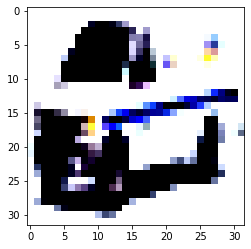

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




436 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


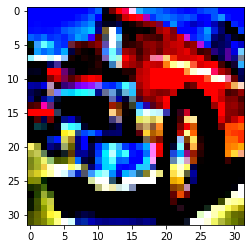

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




437 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


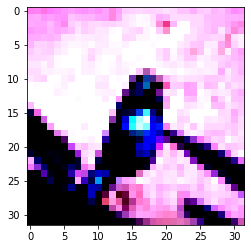

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




438 [ Predicted Value: cat, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


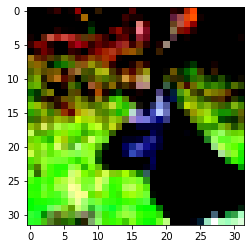

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




439 [ Predicted Value: ship, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


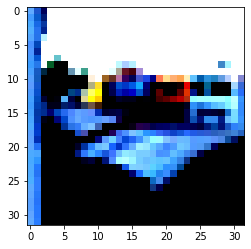

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




440 [ Predicted Value: cat, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


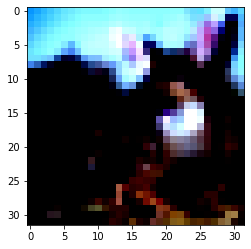

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




441 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


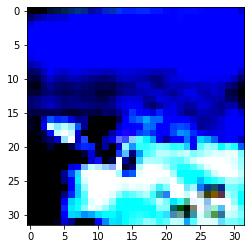

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




442 [ Predicted Value: cat, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


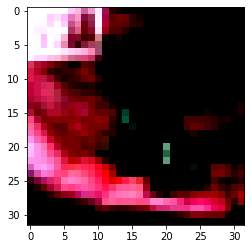

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




443 [ Predicted Value: horse, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


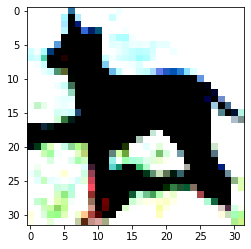

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




444 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


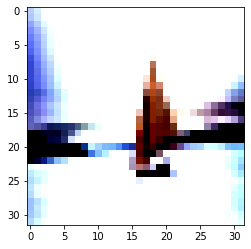

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




445 [ Predicted Value: frog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


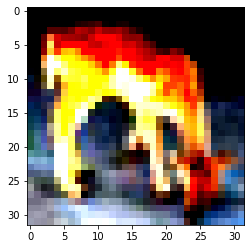

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




446 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


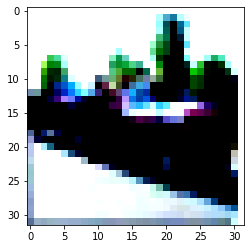

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




447 [ Predicted Value: deer, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


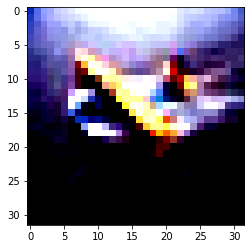

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




448 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


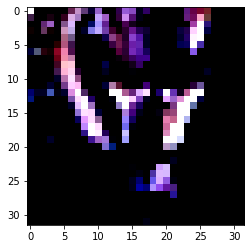

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




449 [ Predicted Value: dog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


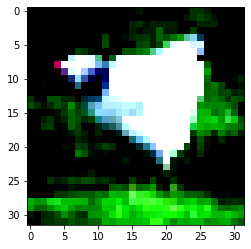



450 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


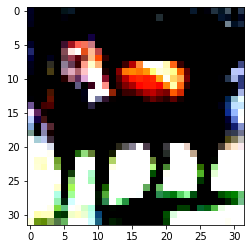



451 [ Predicted Value: cat, Actual Value: dog ]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



(3, 32, 32)
(32, 32, 3)


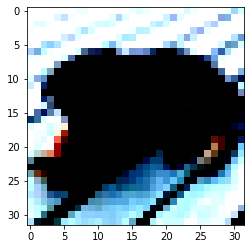

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




452 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


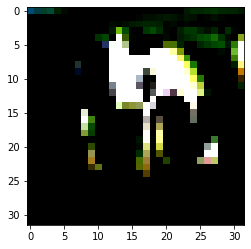

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




453 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


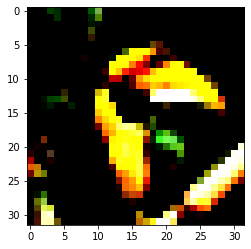

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




454 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


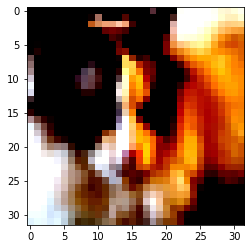

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




455 [ Predicted Value: ship, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


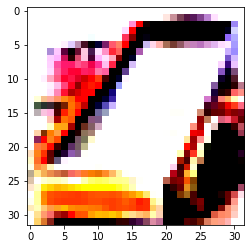

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




456 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


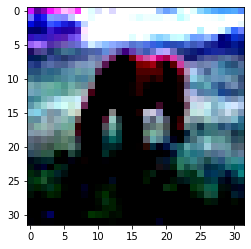

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




457 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


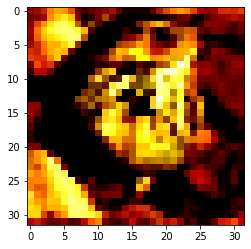

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




458 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


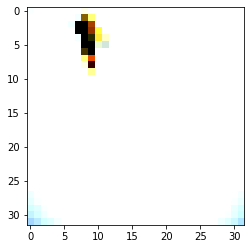

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




459 [ Predicted Value: truck, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


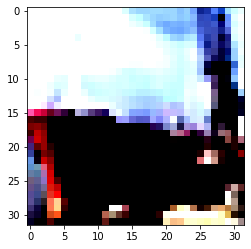

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




460 [ Predicted Value: dog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


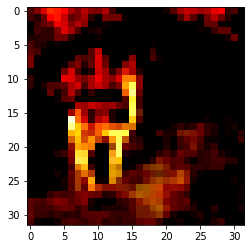

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




461 [ Predicted Value: horse, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


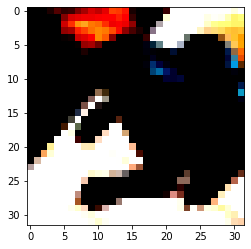

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




462 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


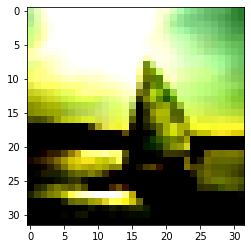

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




463 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


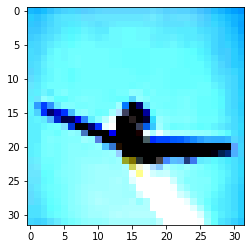

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




464 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


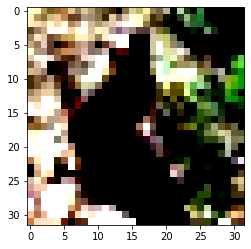

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




465 [ Predicted Value: truck, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


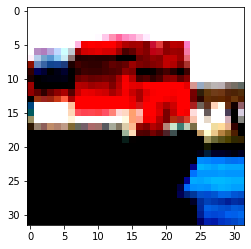



466 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


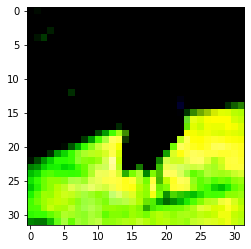



467 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


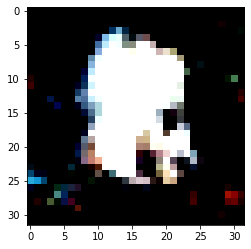

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




468 [ Predicted Value: deer, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


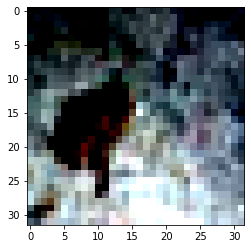

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




469 [ Predicted Value: cat, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


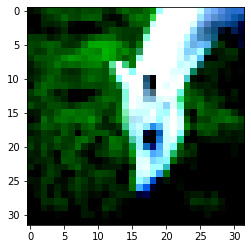

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




470 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


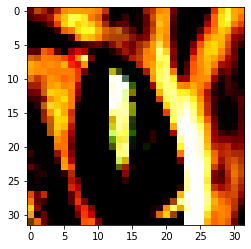

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




471 [ Predicted Value: frog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


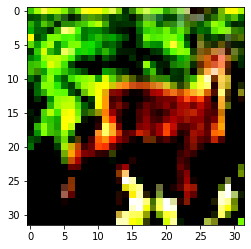

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




472 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


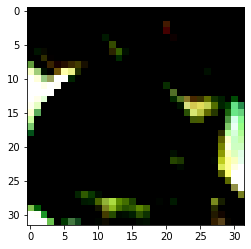

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




473 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


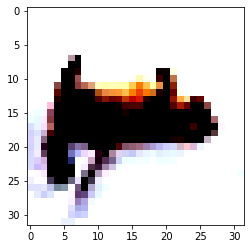

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




474 [ Predicted Value: horse, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


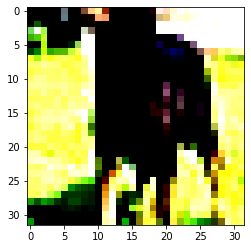

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




475 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


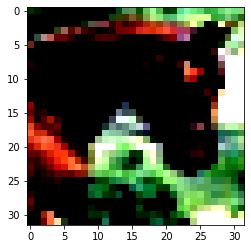

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




476 [ Predicted Value: truck, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


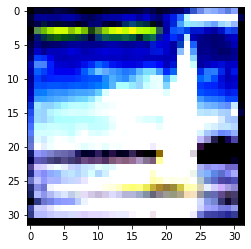

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




477 [ Predicted Value: dog, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


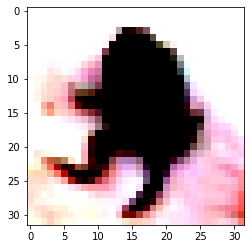

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




478 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


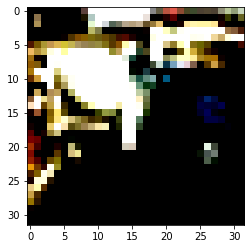

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




479 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


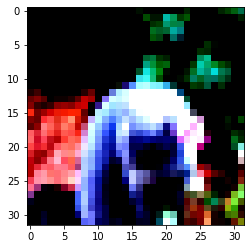

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




480 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


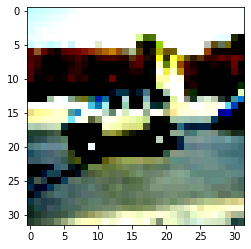

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




481 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


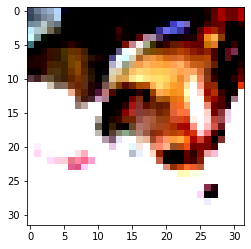



482 [ Predicted Value: horse, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


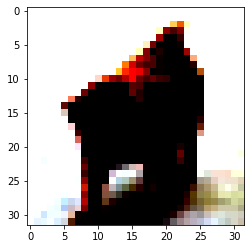

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




483 [ Predicted Value: cat, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


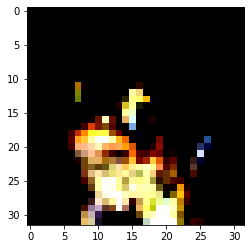

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




484 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


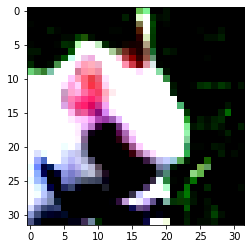

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




485 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


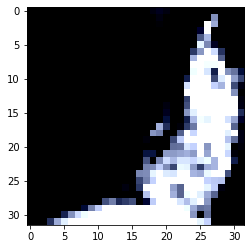

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




486 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


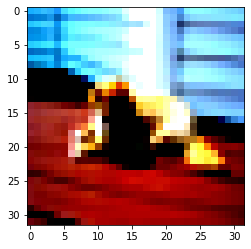

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




487 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


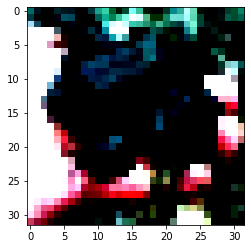

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




488 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


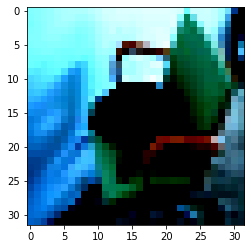

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




489 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


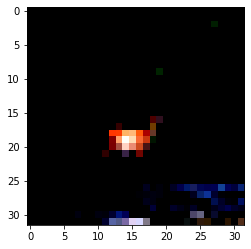

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




490 [ Predicted Value: plane, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


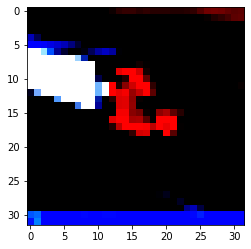

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




491 [ Predicted Value: ship, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


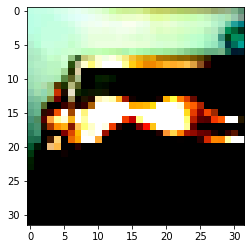

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




492 [ Predicted Value: plane, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


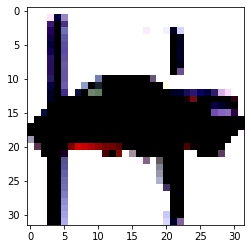

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




493 [ Predicted Value: horse, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


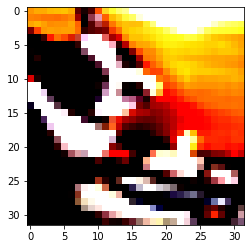

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




494 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


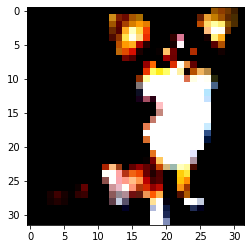

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




495 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


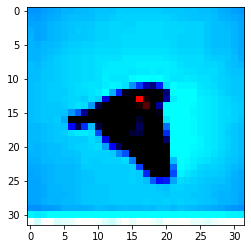

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




496 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


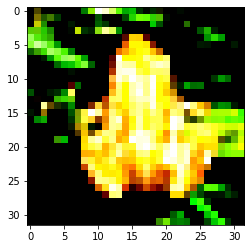

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




497 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


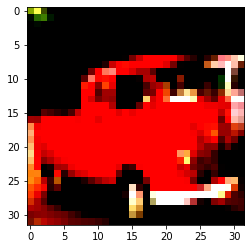



498 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


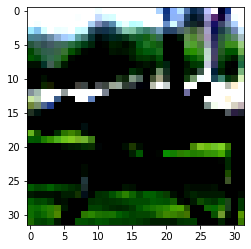



499 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


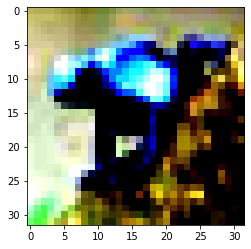

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




500 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


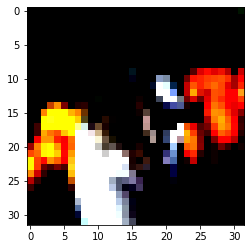

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




501 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


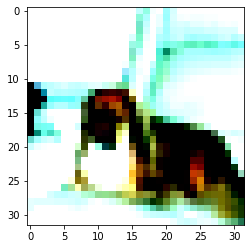

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




502 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


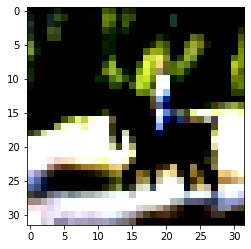

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




503 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


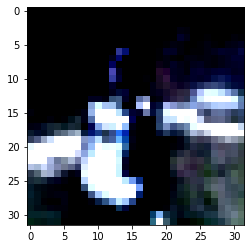

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




504 [ Predicted Value: frog, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


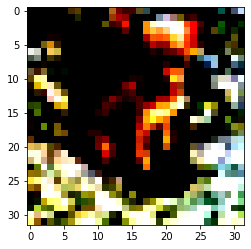

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




505 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


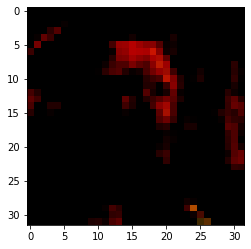

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




506 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


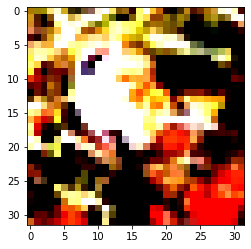

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




507 [ Predicted Value: plane, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


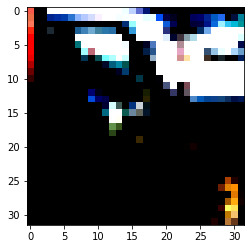

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




508 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


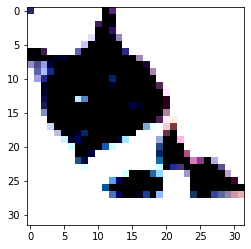

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




509 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


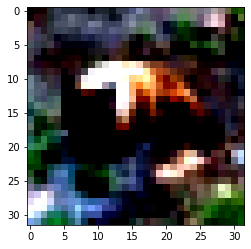

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




510 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


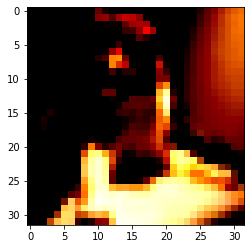

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




511 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


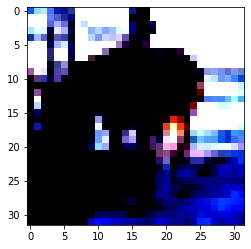

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




512 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


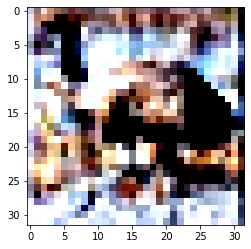

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




513 [ Predicted Value: dog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


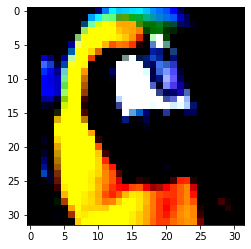



514 [ Predicted Value: cat, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


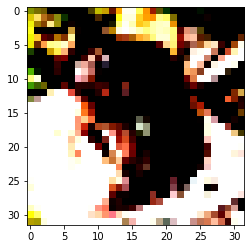

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




515 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


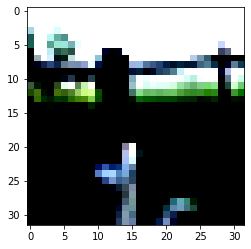

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




516 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


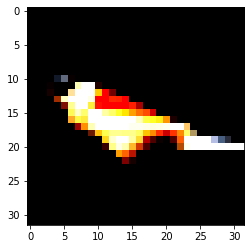

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




517 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


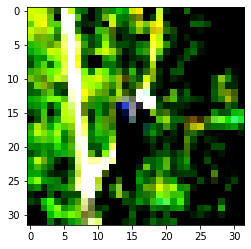

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




518 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


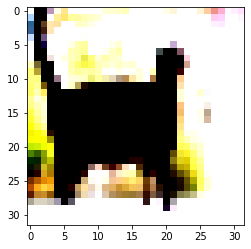

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




519 [ Predicted Value: cat, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


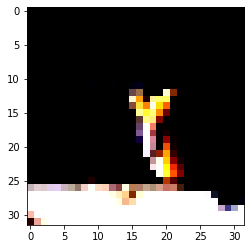

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




520 [ Predicted Value: dog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


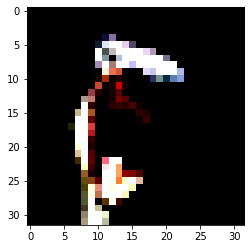

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




521 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


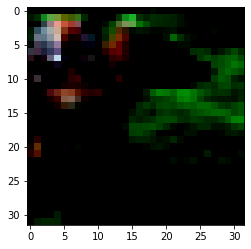

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




522 [ Predicted Value: plane, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


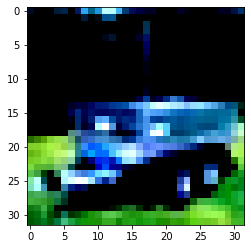

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




523 [ Predicted Value: horse, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


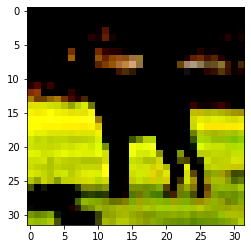

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




524 [ Predicted Value: dog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


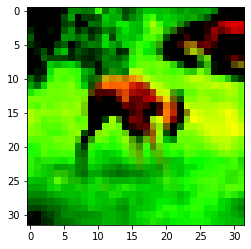

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




525 [ Predicted Value: horse, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


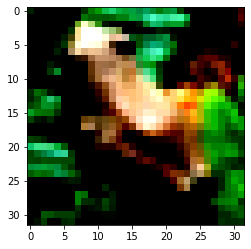

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




526 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


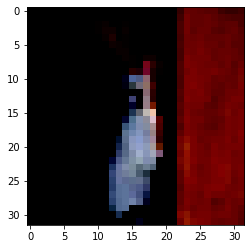

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




527 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


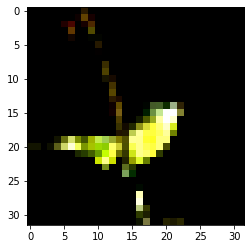

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




528 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


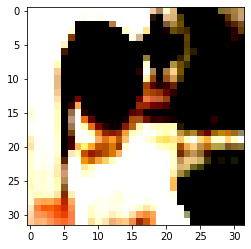

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




529 [ Predicted Value: cat, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


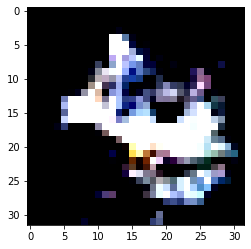



530 [ Predicted Value: plane, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


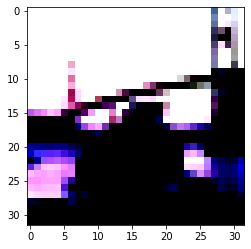

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




531 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


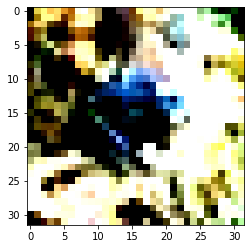

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




532 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


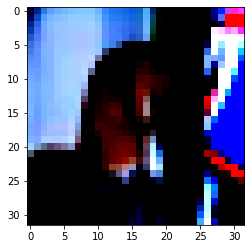

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




533 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


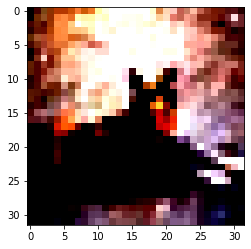

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




534 [ Predicted Value: plane, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


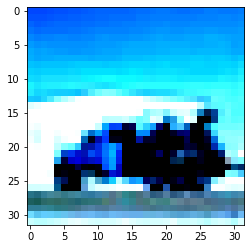

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




535 [ Predicted Value: bird, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


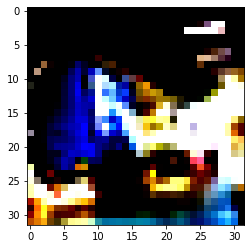

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




536 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


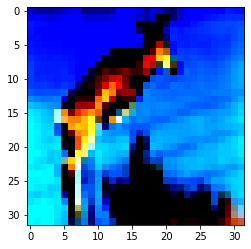

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




537 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


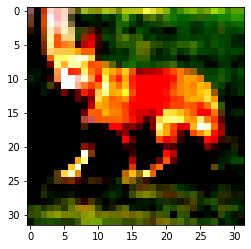

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




538 [ Predicted Value: dog, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


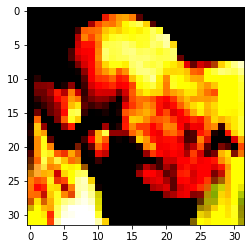

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




539 [ Predicted Value: ship, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


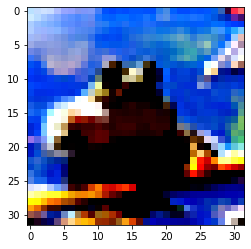

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




540 [ Predicted Value: deer, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


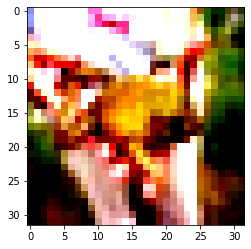

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




541 [ Predicted Value: horse, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


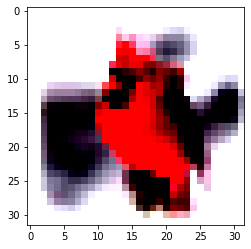

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




542 [ Predicted Value: ship, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


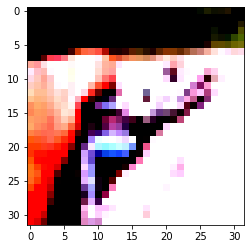

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




543 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


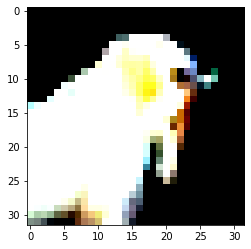

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




544 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


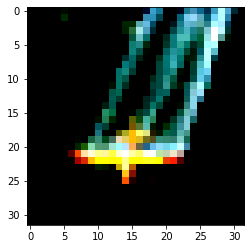

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




545 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


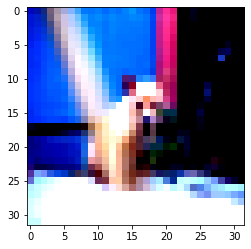



546 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


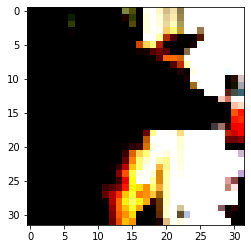

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




547 [ Predicted Value: horse, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


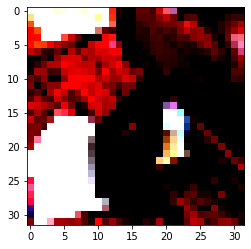

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




548 [ Predicted Value: bird, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


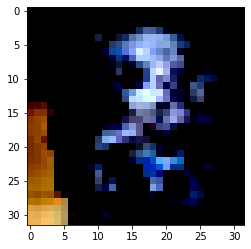

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




549 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


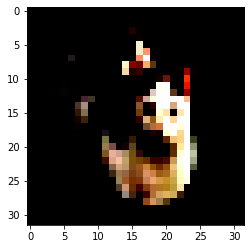

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




550 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


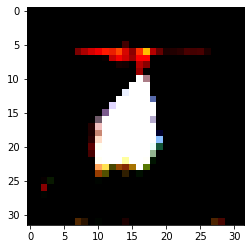

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




551 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


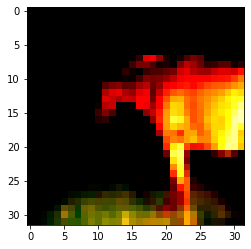

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




552 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


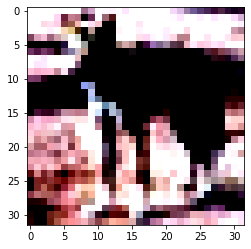

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




553 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


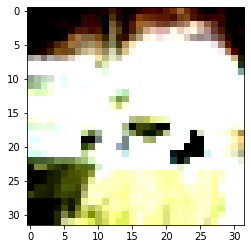

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




554 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


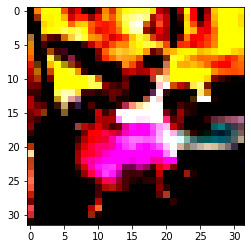

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




555 [ Predicted Value: horse, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


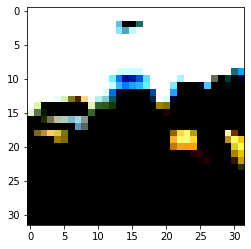

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




556 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


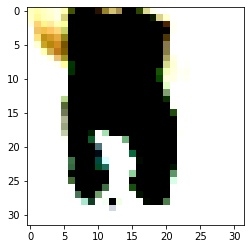

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




557 [ Predicted Value: bird, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


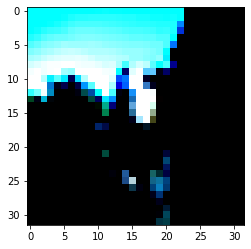

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




558 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


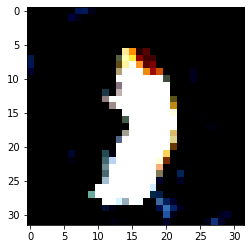

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




559 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


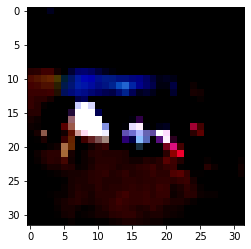

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




560 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


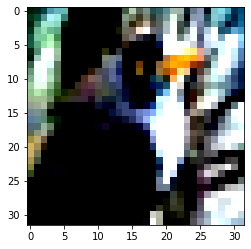

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




561 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


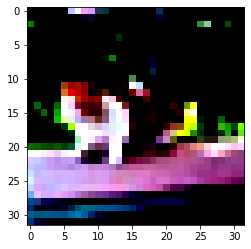



562 [ Predicted Value: frog, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


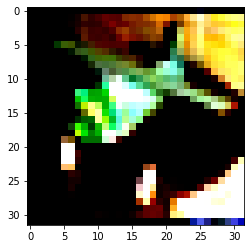



563 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


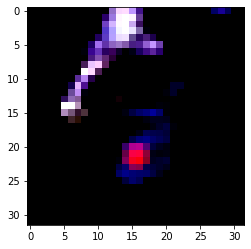

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




564 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


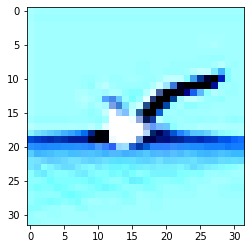

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




565 [ Predicted Value: horse, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


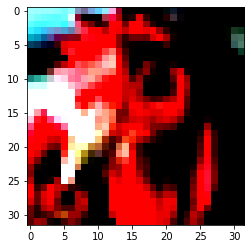

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




566 [ Predicted Value: car, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


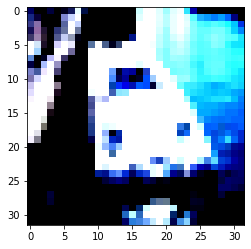

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




567 [ Predicted Value: cat, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


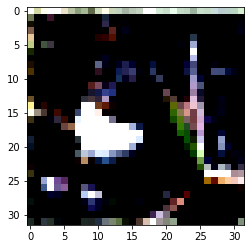

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




568 [ Predicted Value: cat, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


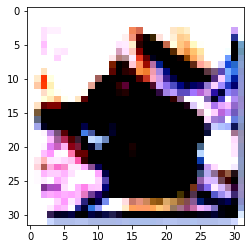

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




569 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


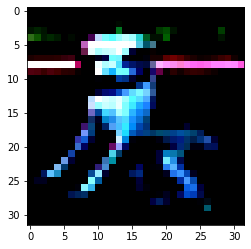

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




570 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


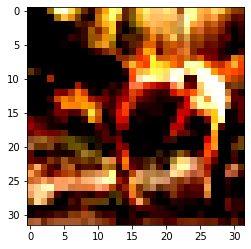

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




571 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


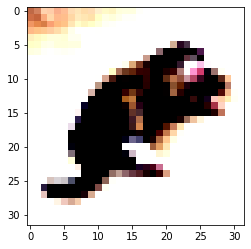

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




572 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


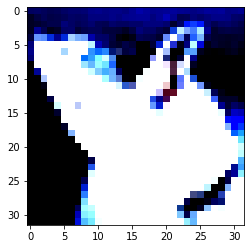

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




573 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


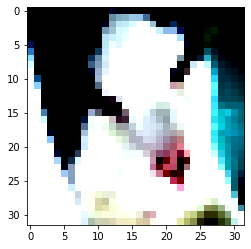

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




574 [ Predicted Value: cat, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


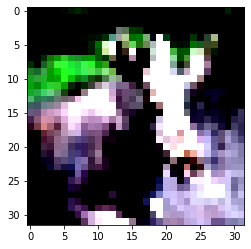

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




575 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


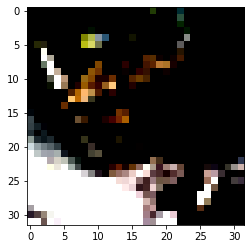

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




576 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


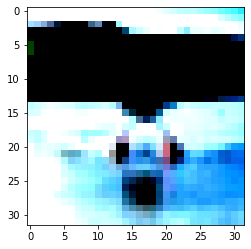

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




577 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


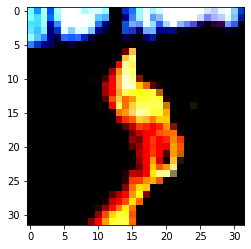



578 [ Predicted Value: truck, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


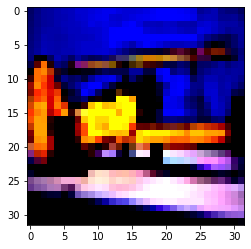

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




579 [ Predicted Value: car, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


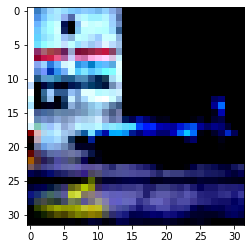

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




580 [ Predicted Value: car, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


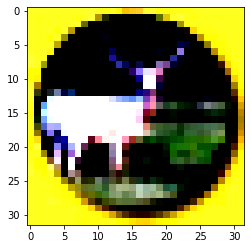

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




581 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


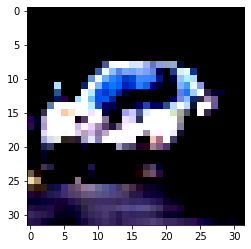

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




582 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


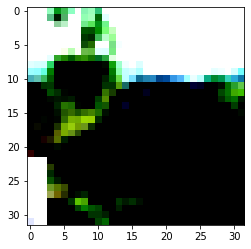

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




583 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


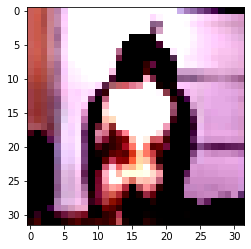

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




584 [ Predicted Value: plane, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


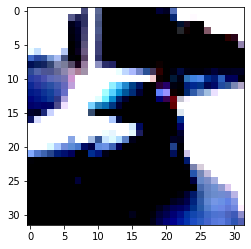

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




585 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


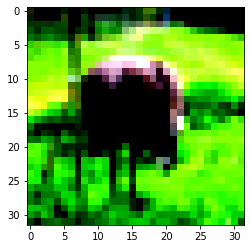

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




586 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


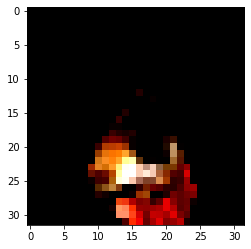

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




587 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


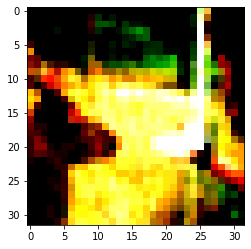

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




588 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


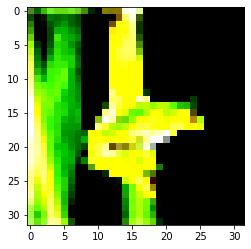

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




589 [ Predicted Value: frog, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


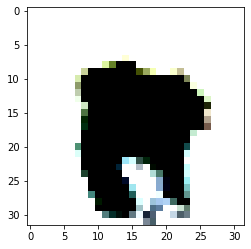

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




590 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


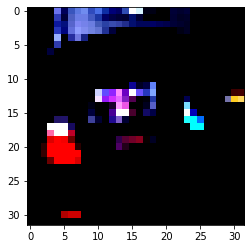

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




591 [ Predicted Value: ship, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


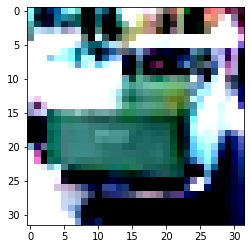

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




592 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


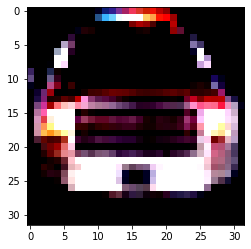

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




593 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


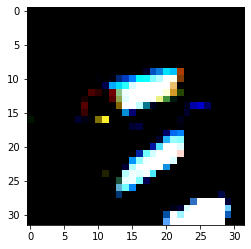



594 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


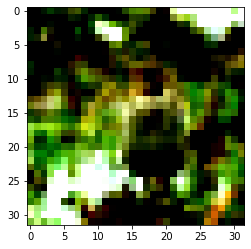



595 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


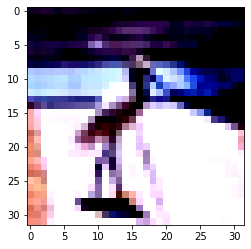

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




596 [ Predicted Value: horse, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


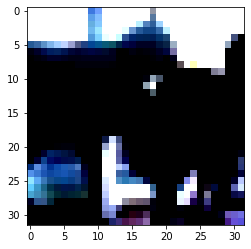

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




597 [ Predicted Value: horse, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


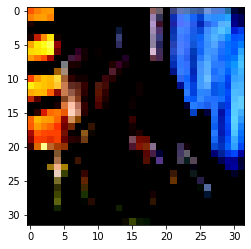

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




598 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


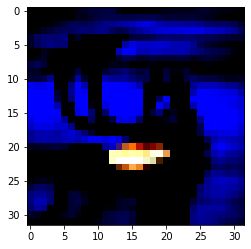

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




599 [ Predicted Value: horse, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


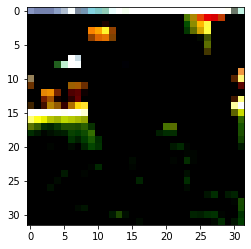

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




600 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


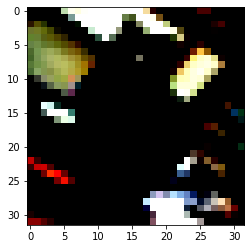

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




601 [ Predicted Value: horse, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


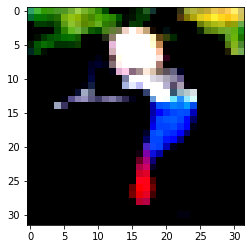

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




602 [ Predicted Value: plane, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


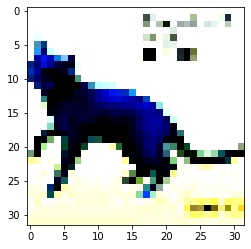

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




603 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


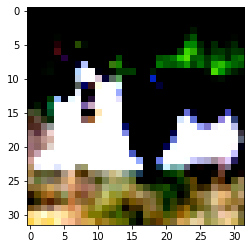

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




604 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


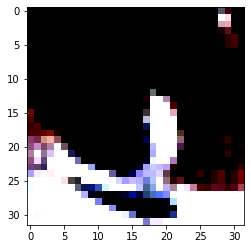

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




605 [ Predicted Value: truck, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


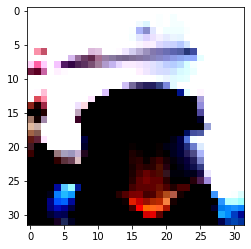

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




606 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


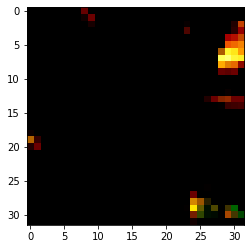

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




607 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


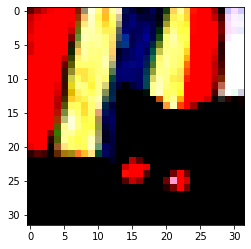

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




608 [ Predicted Value: plane, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


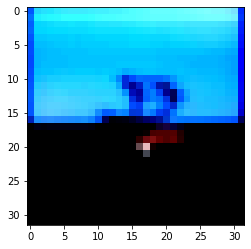

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




609 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


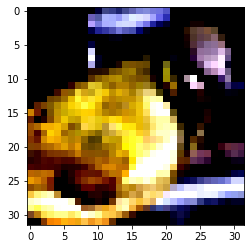



610 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


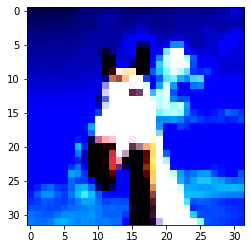



611 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


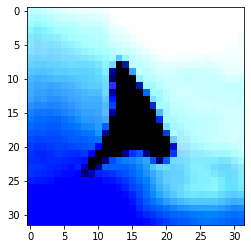

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




612 [ Predicted Value: ship, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


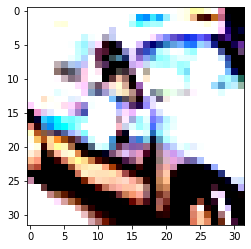

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




613 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


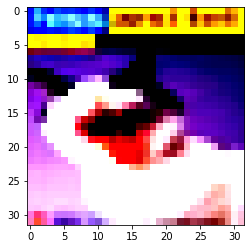

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




614 [ Predicted Value: horse, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


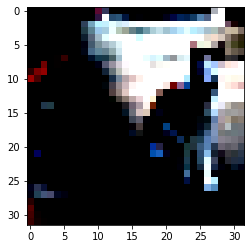

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




615 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


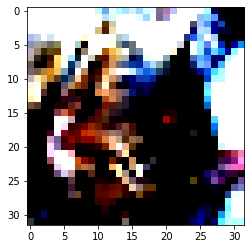

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




616 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


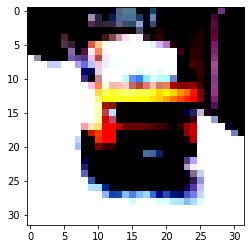

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




617 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


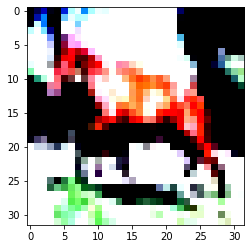

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




618 [ Predicted Value: bird, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


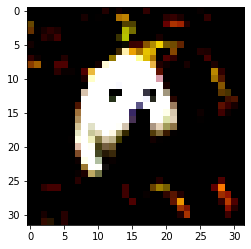

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




619 [ Predicted Value: horse, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


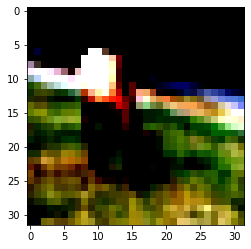

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




620 [ Predicted Value: cat, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


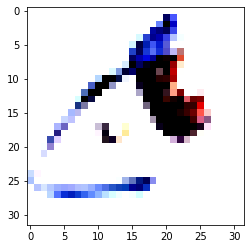

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




621 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


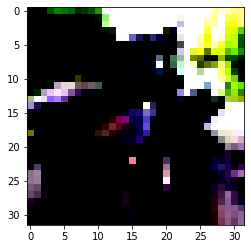

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




622 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


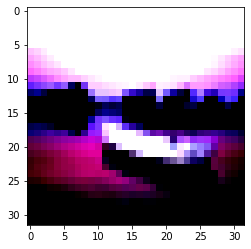

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




623 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


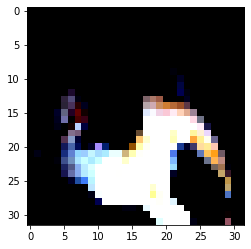

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




624 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


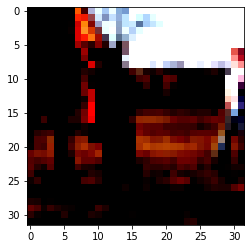

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




625 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


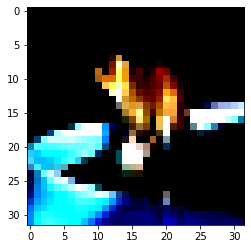



626 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


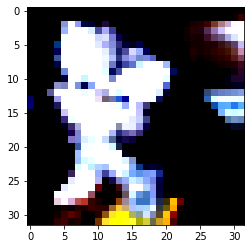



627 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


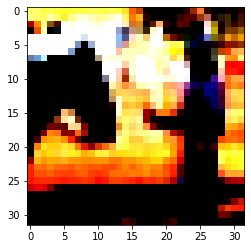

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




628 [ Predicted Value: bird, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


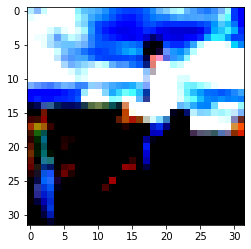

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




629 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


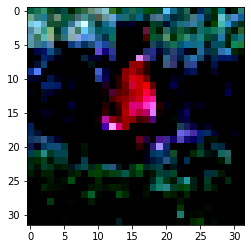

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




630 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


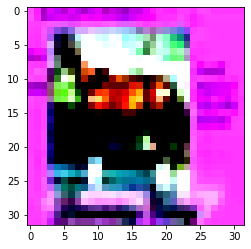

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




631 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


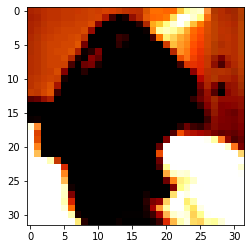

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




632 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


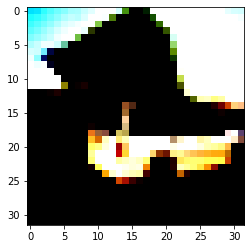

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




633 [ Predicted Value: car, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


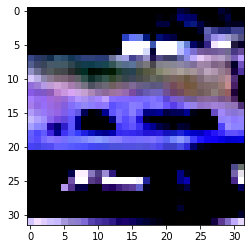

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




634 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


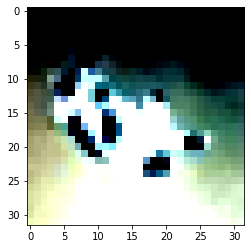

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




635 [ Predicted Value: horse, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


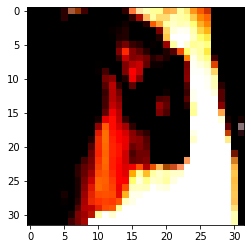

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




636 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


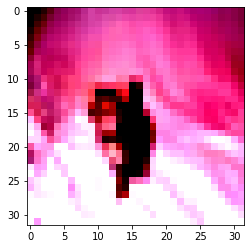

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




637 [ Predicted Value: truck, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


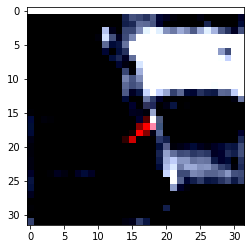

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




638 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


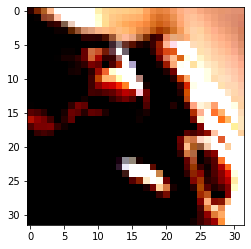

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




639 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


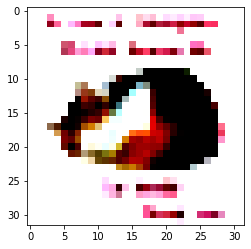

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




640 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


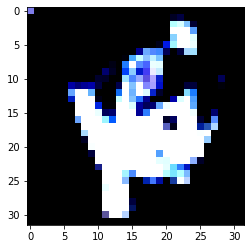

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




641 [ Predicted Value: truck, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


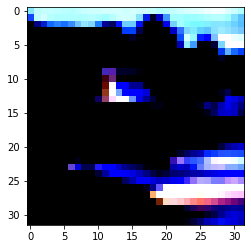



642 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


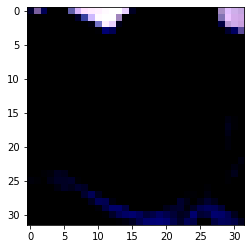



643 [ Predicted Value: dog, Actual Value: cat ]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



(3, 32, 32)
(32, 32, 3)


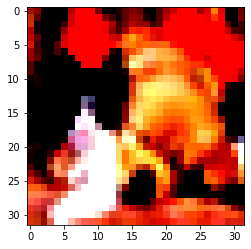

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




644 [ Predicted Value: plane, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


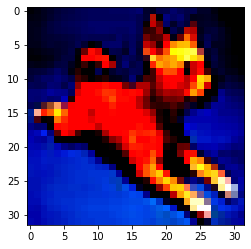

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




645 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


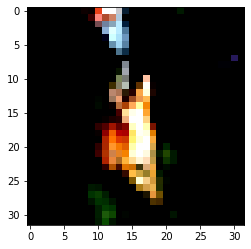

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




646 [ Predicted Value: horse, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


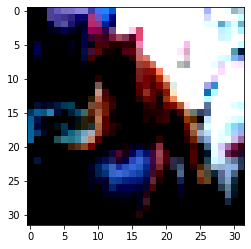

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




647 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


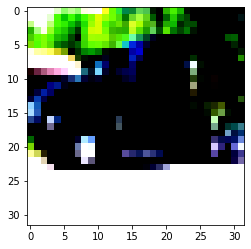

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




648 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


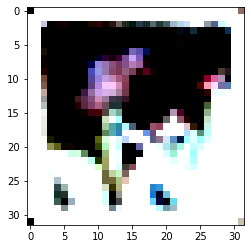

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




649 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


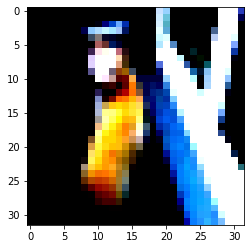

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




650 [ Predicted Value: ship, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


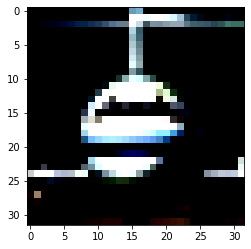

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




651 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


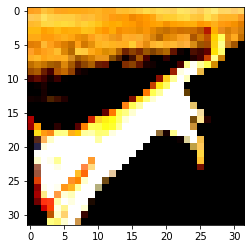

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




652 [ Predicted Value: cat, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


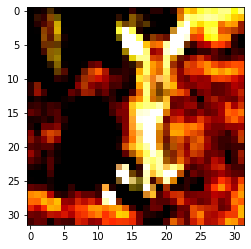

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




653 [ Predicted Value: plane, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


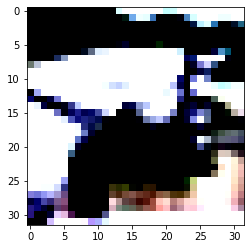

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




654 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


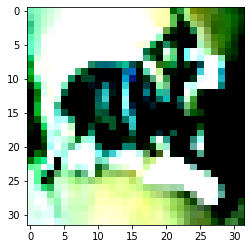

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




655 [ Predicted Value: cat, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


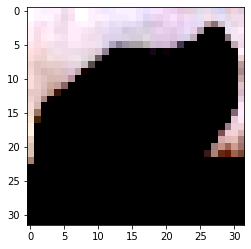

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




656 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


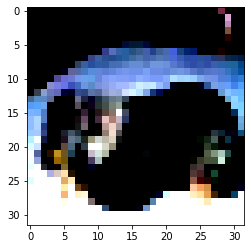

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




657 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


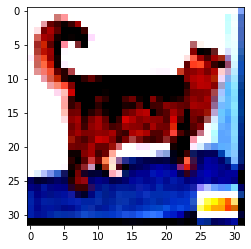



658 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


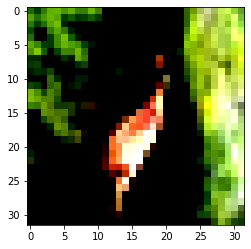

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




659 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


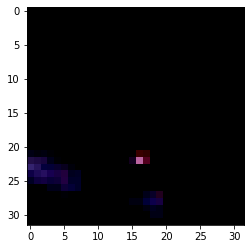

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




660 [ Predicted Value: ship, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


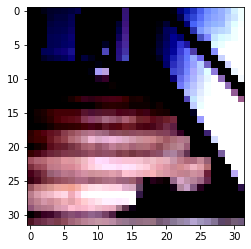

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




661 [ Predicted Value: truck, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


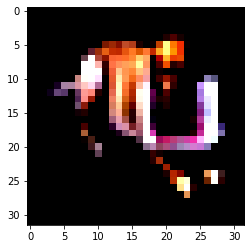

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




662 [ Predicted Value: car, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


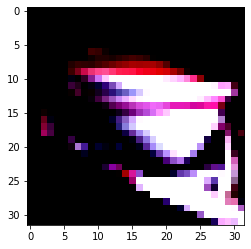

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




663 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


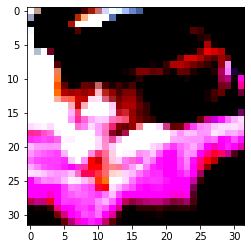

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




664 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


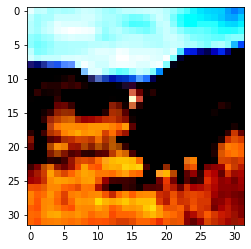

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




665 [ Predicted Value: plane, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


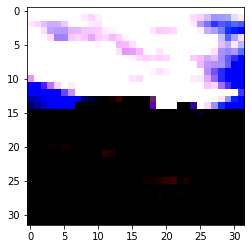

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




666 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


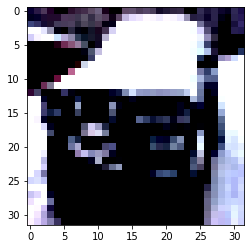

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




667 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


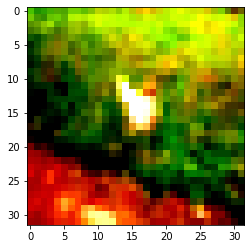

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




668 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


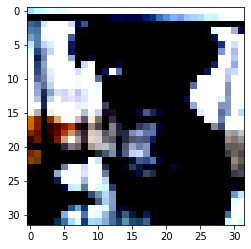

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




669 [ Predicted Value: bird, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


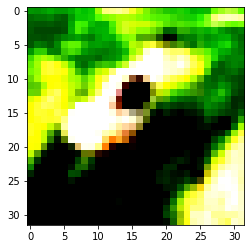

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




670 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


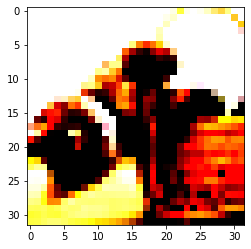

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




671 [ Predicted Value: deer, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


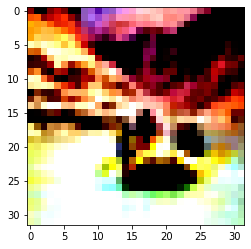

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




672 [ Predicted Value: dog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


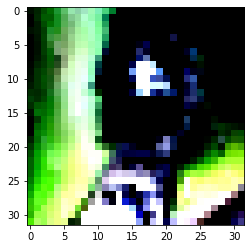

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




673 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


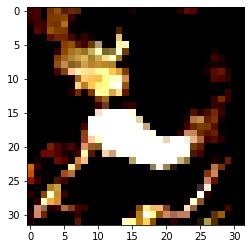



674 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


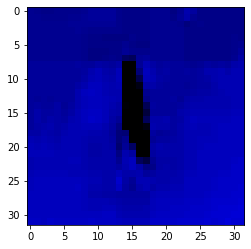

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




675 [ Predicted Value: bird, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


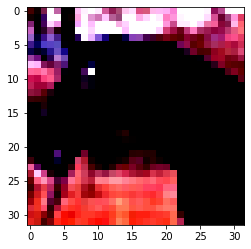

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




676 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


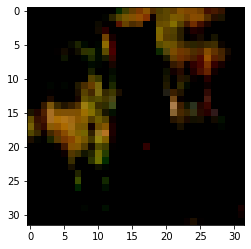

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




677 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


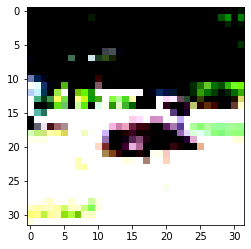

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




678 [ Predicted Value: plane, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


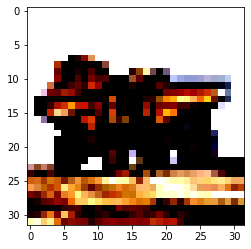

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




679 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


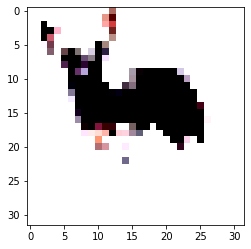

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




680 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


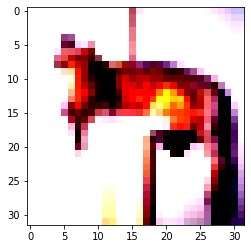

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




681 [ Predicted Value: dog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


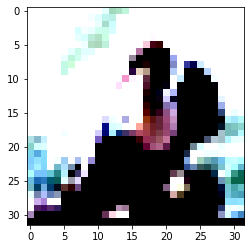

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




682 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


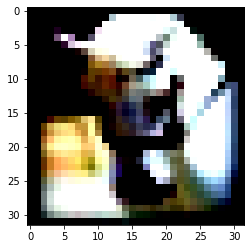

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




683 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


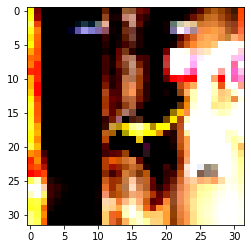

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




684 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


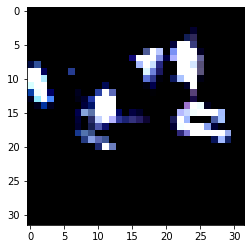

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




685 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


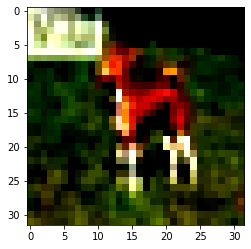

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




686 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


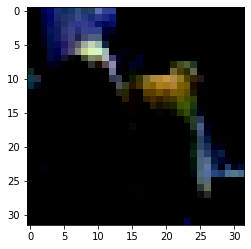

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




687 [ Predicted Value: ship, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


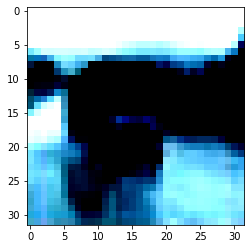

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




688 [ Predicted Value: plane, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


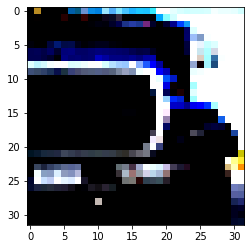

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




689 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


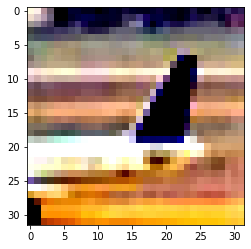



690 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


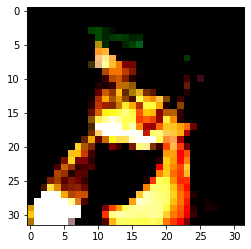



691 [ Predicted Value: dog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


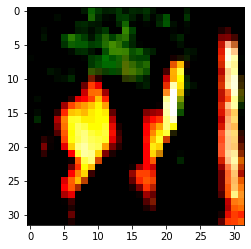

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




692 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


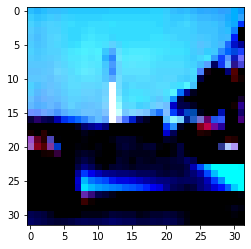

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




693 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


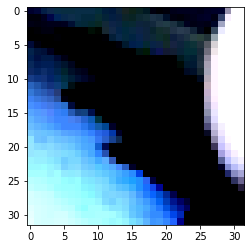

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




694 [ Predicted Value: cat, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


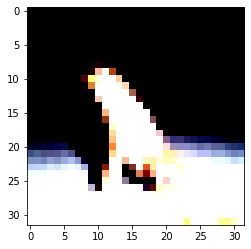

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




695 [ Predicted Value: dog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


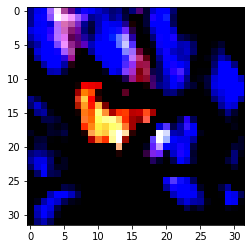

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




696 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


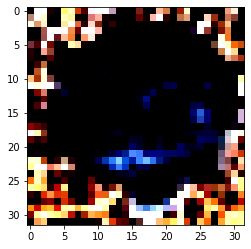

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




697 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


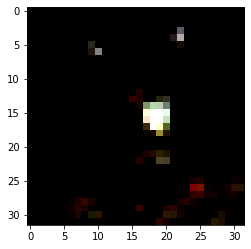

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




698 [ Predicted Value: horse, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


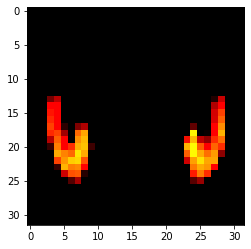

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




699 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


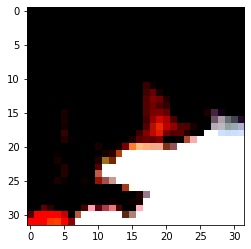

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




700 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


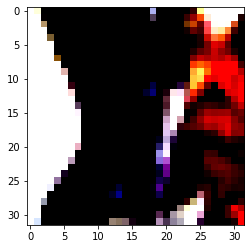

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




701 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


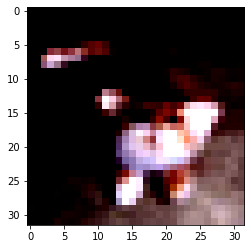

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




702 [ Predicted Value: ship, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


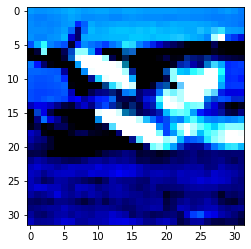

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




703 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


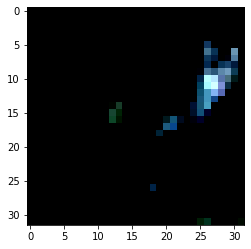

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




704 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


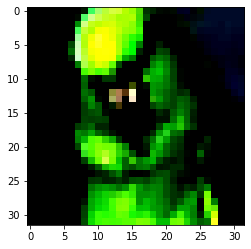

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




705 [ Predicted Value: ship, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


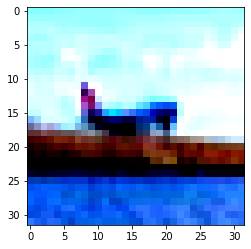



706 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


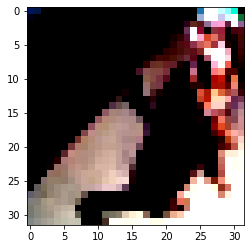



707 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


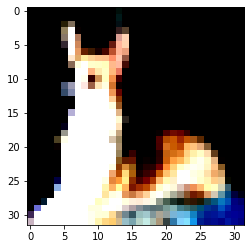

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




708 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


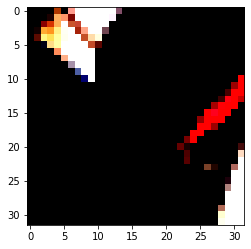

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




709 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


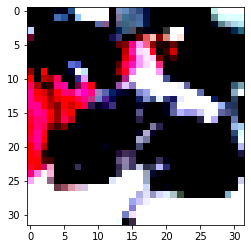

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




710 [ Predicted Value: bird, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


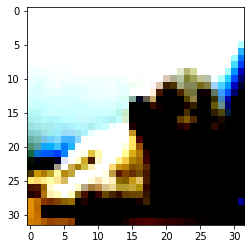

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




711 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


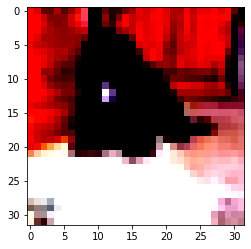

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




712 [ Predicted Value: frog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


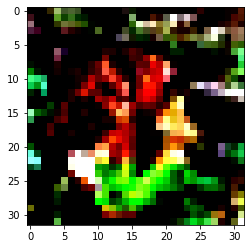

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




713 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


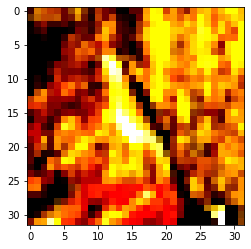

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




714 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


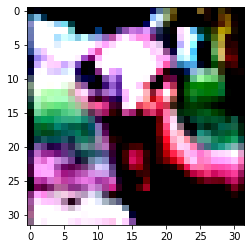

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




715 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


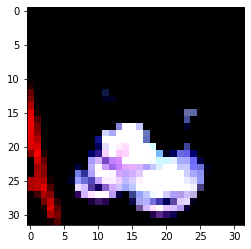

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




716 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


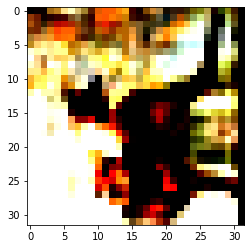

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




717 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


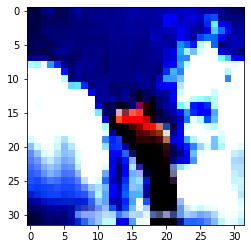

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




718 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


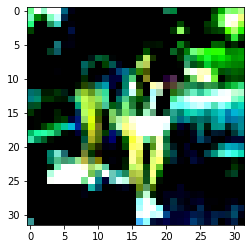

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




719 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


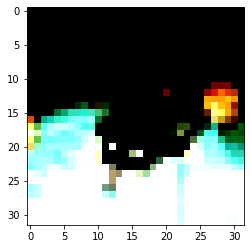

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




720 [ Predicted Value: cat, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


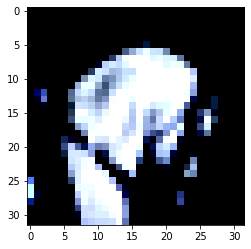

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




721 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


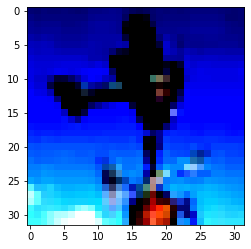



722 [ Predicted Value: plane, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


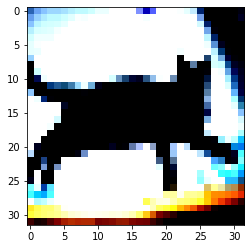

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




723 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


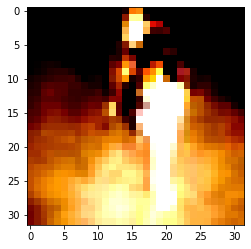

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




724 [ Predicted Value: plane, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


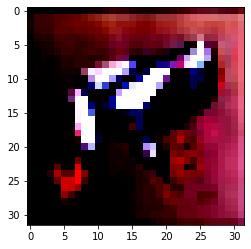

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




725 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


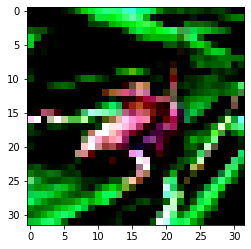

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




726 [ Predicted Value: deer, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


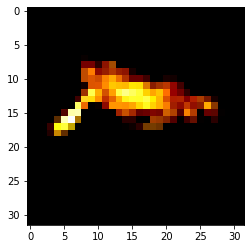

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




727 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


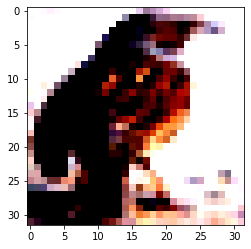

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




728 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


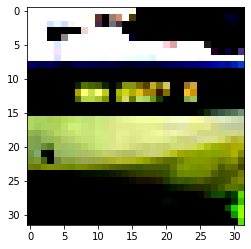

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




729 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


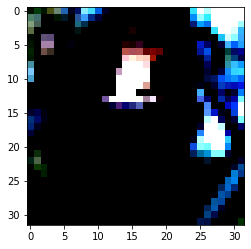

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




730 [ Predicted Value: ship, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


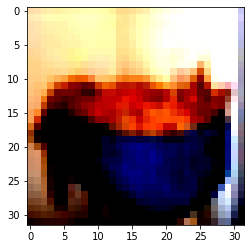

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




731 [ Predicted Value: ship, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


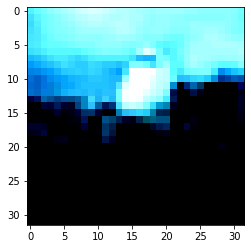

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




732 [ Predicted Value: horse, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


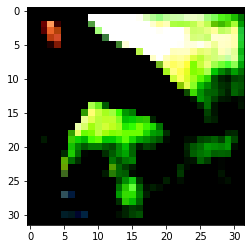

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




733 [ Predicted Value: cat, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


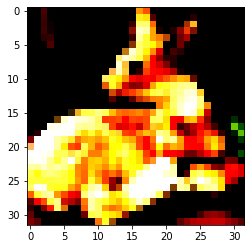

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




734 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


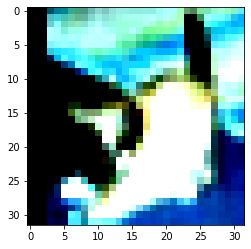

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




735 [ Predicted Value: cat, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


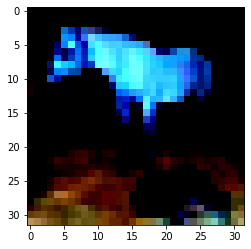

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




736 [ Predicted Value: dog, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


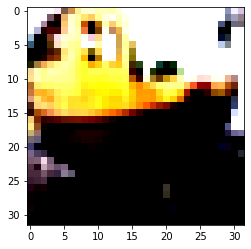

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




737 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


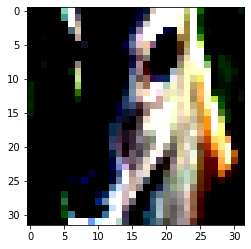



738 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


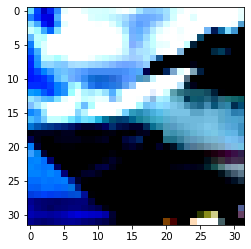



739 [ Predicted Value: cat, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


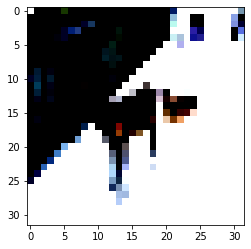

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




740 [ Predicted Value: dog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


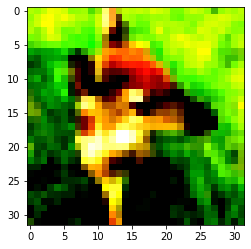

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




741 [ Predicted Value: plane, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


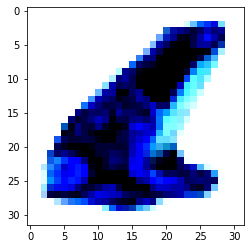

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




742 [ Predicted Value: horse, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


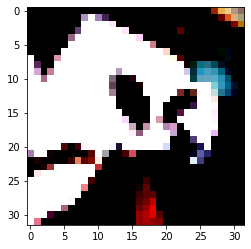

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




743 [ Predicted Value: deer, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


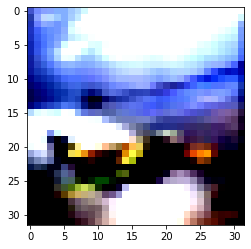

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




744 [ Predicted Value: deer, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


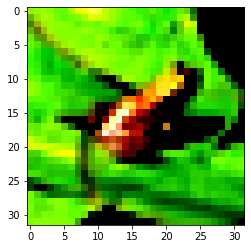

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




745 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


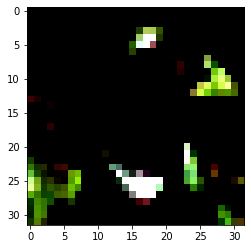

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




746 [ Predicted Value: ship, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


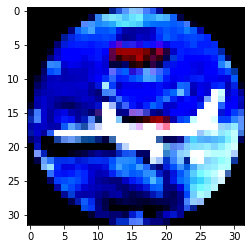

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




747 [ Predicted Value: cat, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


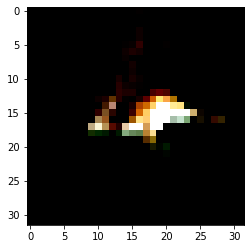

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




748 [ Predicted Value: plane, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


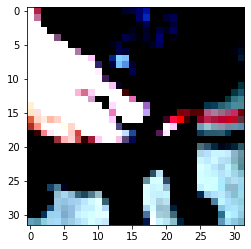

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




749 [ Predicted Value: bird, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


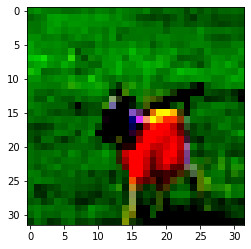

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




750 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


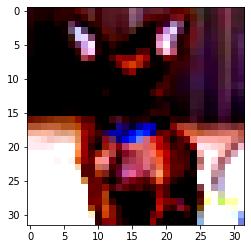

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




751 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


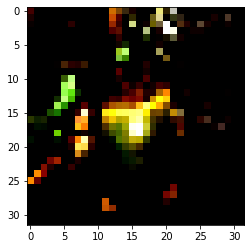

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




752 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


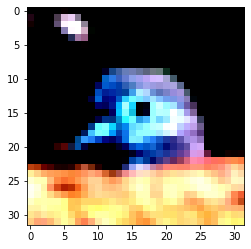

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




753 [ Predicted Value: cat, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


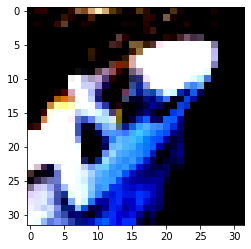



754 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


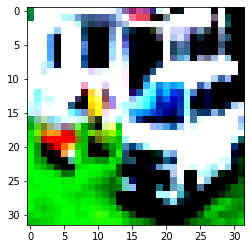



755 [ Predicted Value: car, Actual Value: truck ]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



(3, 32, 32)
(32, 32, 3)


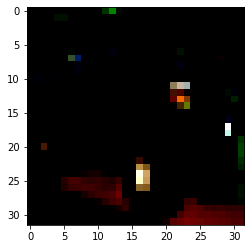

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




756 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


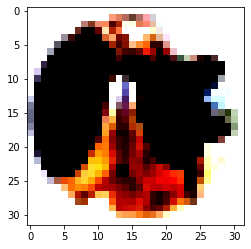

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




757 [ Predicted Value: car, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


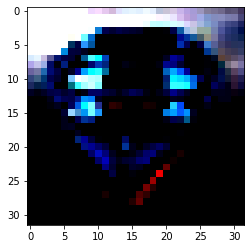

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




758 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


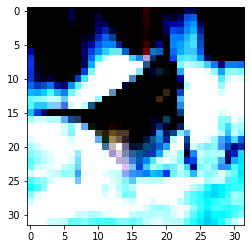

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




759 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


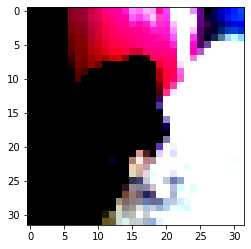

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




760 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


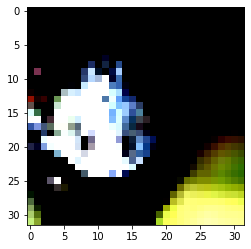

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




761 [ Predicted Value: car, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


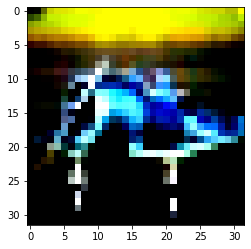

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




762 [ Predicted Value: car, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


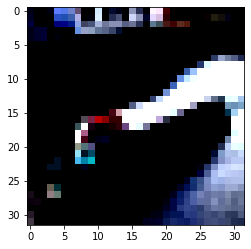

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




763 [ Predicted Value: bird, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


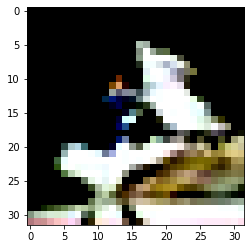

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




764 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


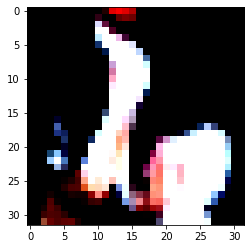

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




765 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


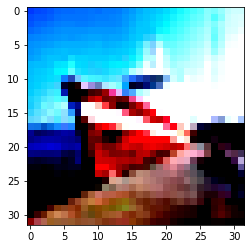

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




766 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


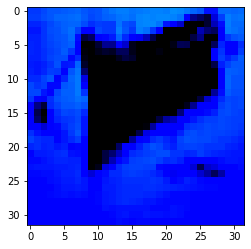

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




767 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


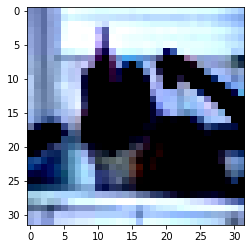

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




768 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


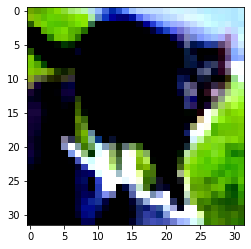

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




769 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


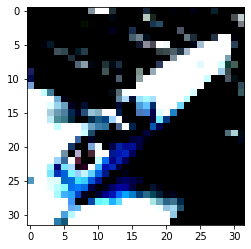



770 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


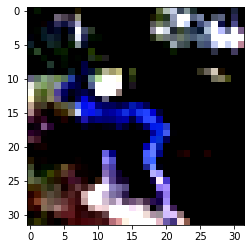



771 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


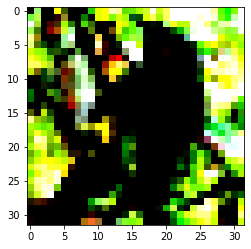

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




772 [ Predicted Value: ship, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


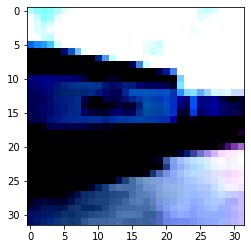

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




773 [ Predicted Value: horse, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


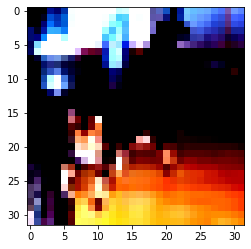

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




774 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


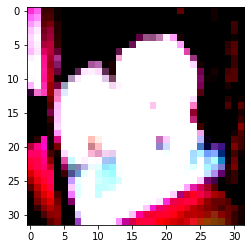

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




775 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


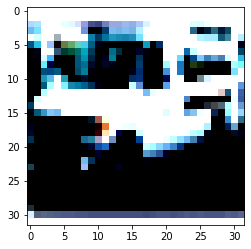

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




776 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


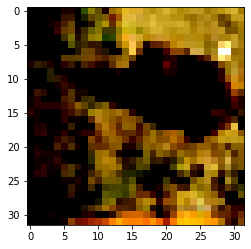

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




777 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


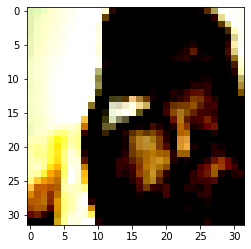

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




778 [ Predicted Value: cat, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


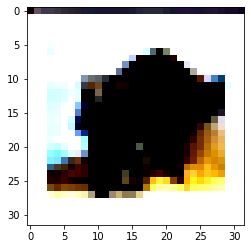

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




779 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


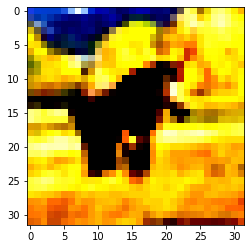

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




780 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


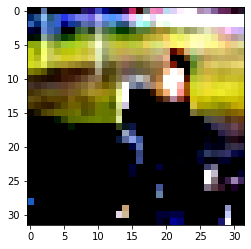

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




781 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


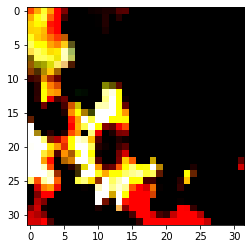

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




782 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


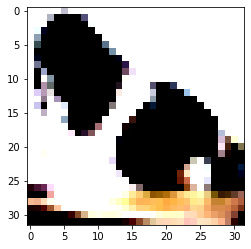

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




783 [ Predicted Value: plane, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


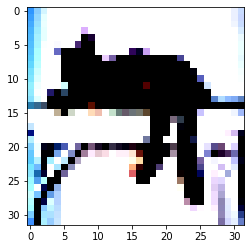

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




784 [ Predicted Value: plane, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


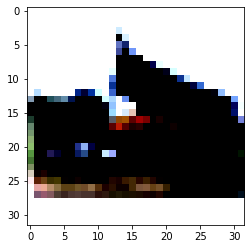

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




785 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


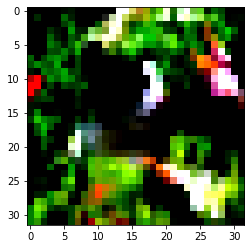



786 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


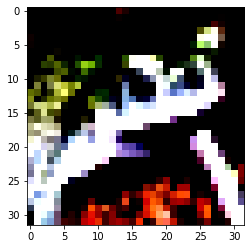



787 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


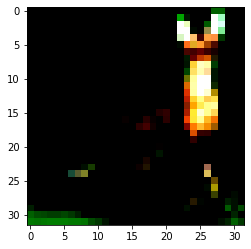

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




788 [ Predicted Value: frog, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


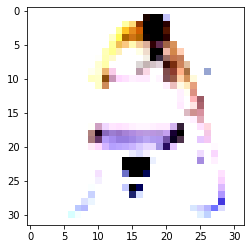

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




789 [ Predicted Value: plane, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


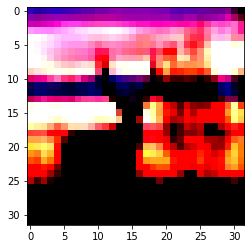

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




790 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


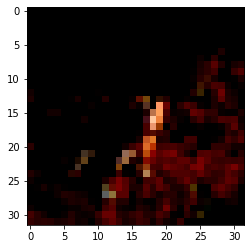

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




791 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


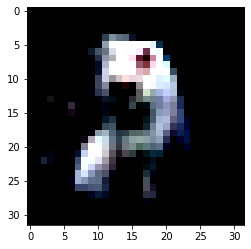

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




792 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


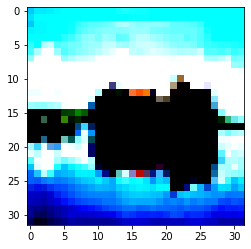

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




793 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


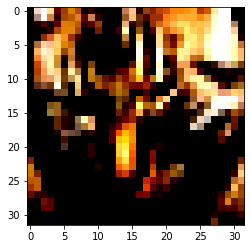

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




794 [ Predicted Value: horse, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


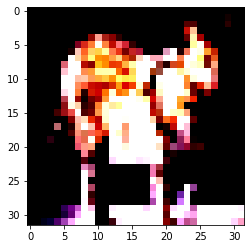

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




795 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


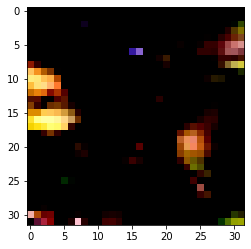

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




796 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


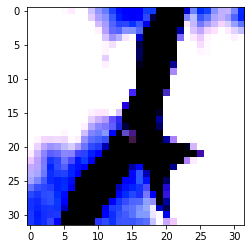

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




797 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


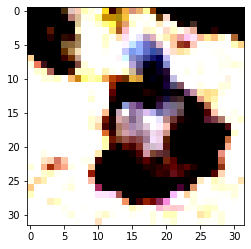

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




798 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


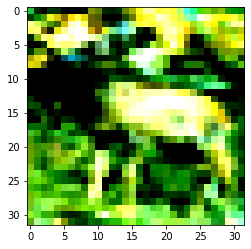

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




799 [ Predicted Value: truck, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


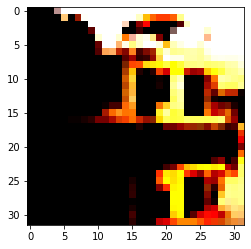

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




800 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


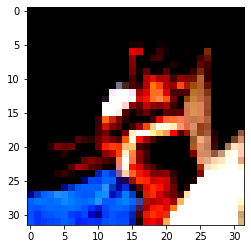

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




801 [ Predicted Value: plane, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


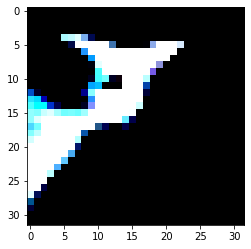



802 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


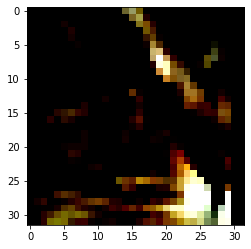

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




803 [ Predicted Value: plane, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


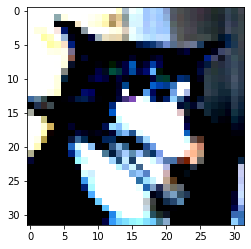

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




804 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


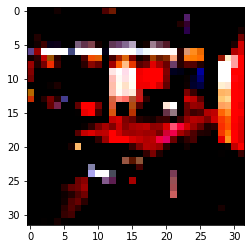

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




805 [ Predicted Value: ship, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


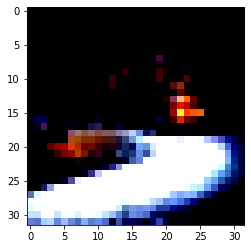

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




806 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


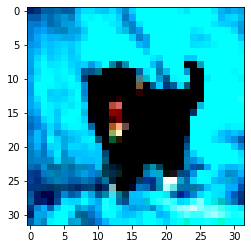

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




807 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


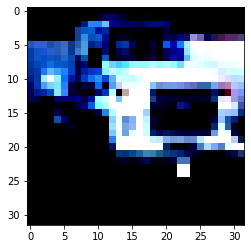

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




808 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


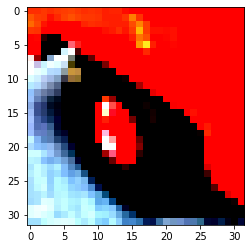

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




809 [ Predicted Value: bird, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


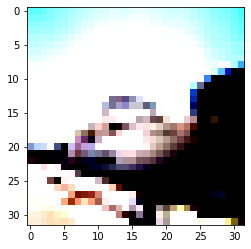

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




810 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


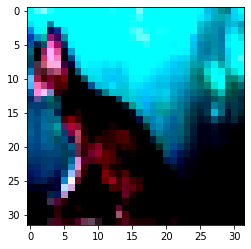

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




811 [ Predicted Value: truck, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


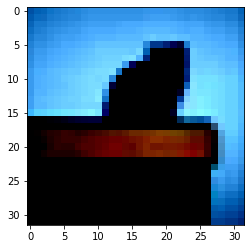

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




812 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


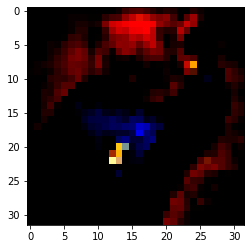

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




813 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


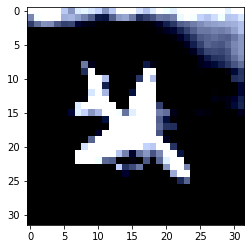

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




814 [ Predicted Value: dog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


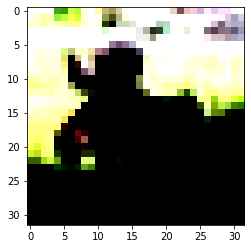

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




815 [ Predicted Value: bird, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


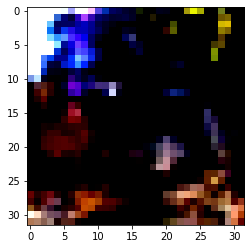

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




816 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


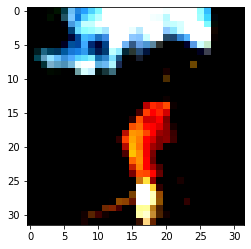

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




817 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


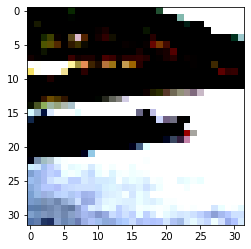



818 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


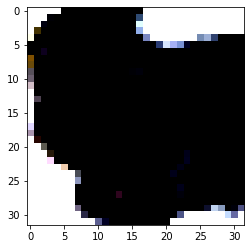

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




819 [ Predicted Value: ship, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


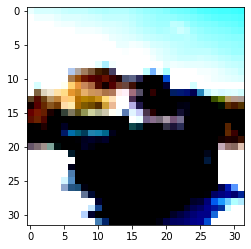

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




820 [ Predicted Value: truck, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


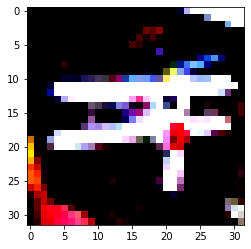

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




821 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


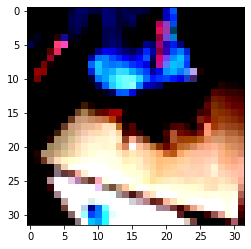

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




822 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


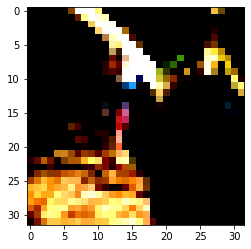

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




823 [ Predicted Value: horse, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


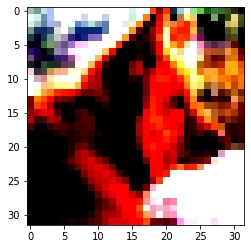

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




824 [ Predicted Value: truck, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


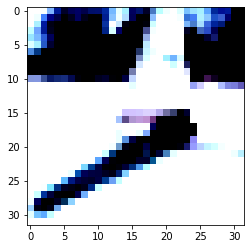

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




825 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


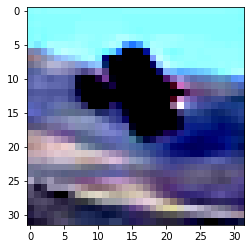

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




826 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


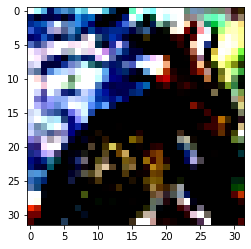

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




827 [ Predicted Value: frog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


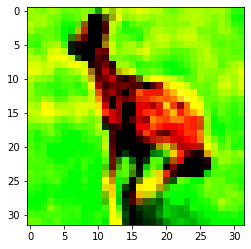

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




828 [ Predicted Value: cat, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


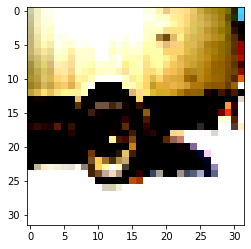

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




829 [ Predicted Value: frog, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


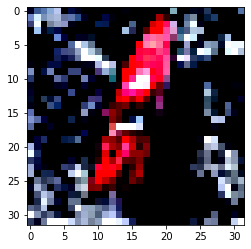

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




830 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


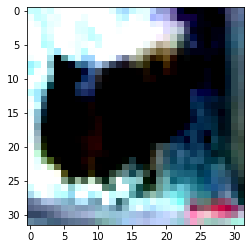

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




831 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


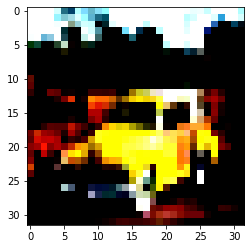

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




832 [ Predicted Value: ship, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


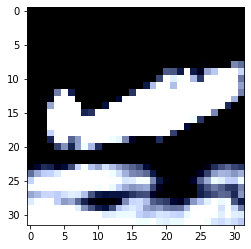

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




833 [ Predicted Value: deer, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


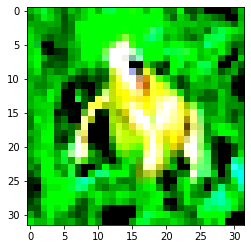



834 [ Predicted Value: plane, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


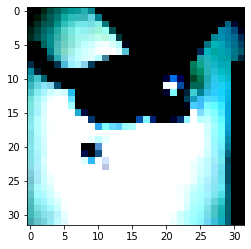



835 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


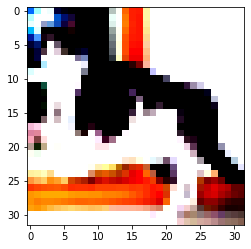

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




836 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


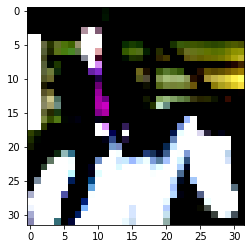

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




837 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


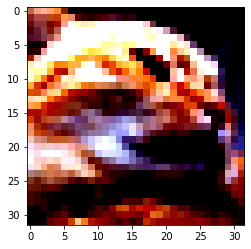

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




838 [ Predicted Value: bird, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


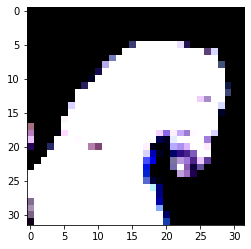

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




839 [ Predicted Value: cat, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


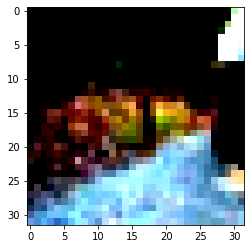

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




840 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


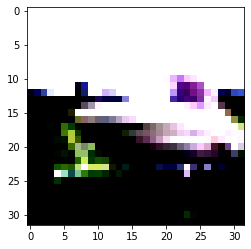

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




841 [ Predicted Value: cat, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


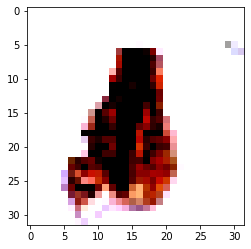

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




842 [ Predicted Value: horse, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


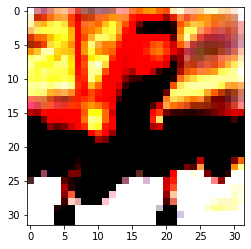

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




843 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


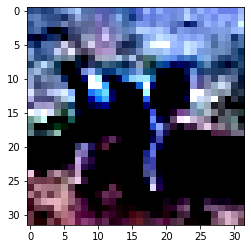

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




844 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


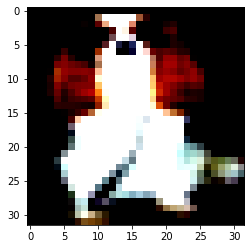

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




845 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


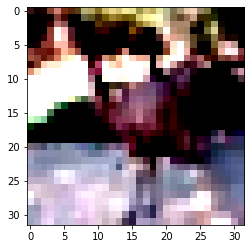

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




846 [ Predicted Value: ship, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


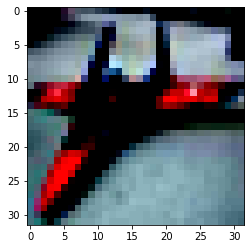

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




847 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


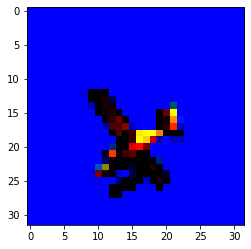

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




848 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


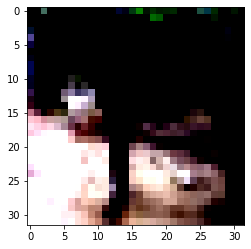

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




849 [ Predicted Value: bird, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


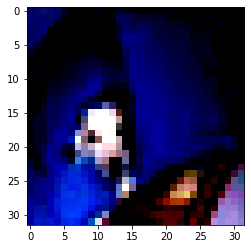

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




850 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


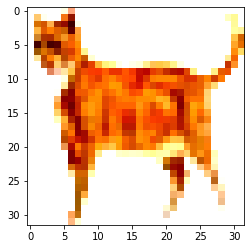



851 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


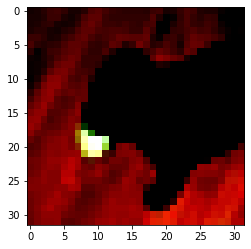

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




852 [ Predicted Value: frog, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


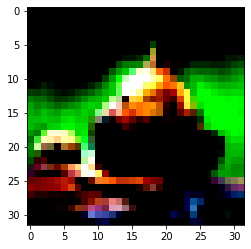

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




853 [ Predicted Value: horse, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


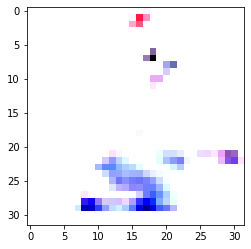

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




854 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


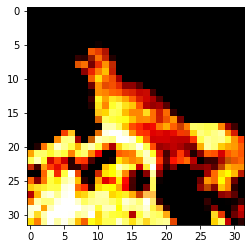

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




855 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


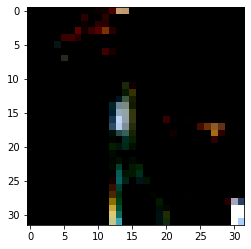

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




856 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


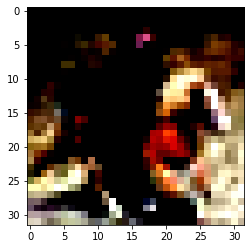

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




857 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


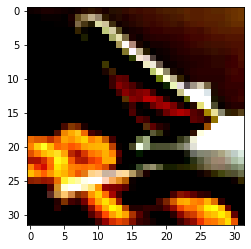

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




858 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


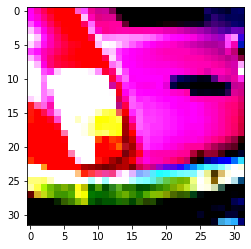

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




859 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


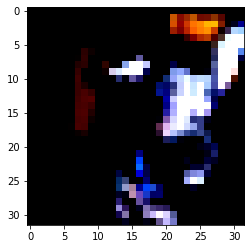

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




860 [ Predicted Value: truck, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


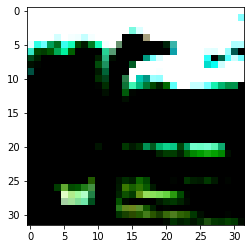

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




861 [ Predicted Value: dog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


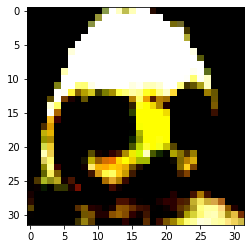

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




862 [ Predicted Value: plane, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


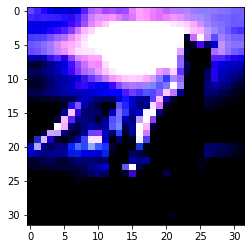

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




863 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


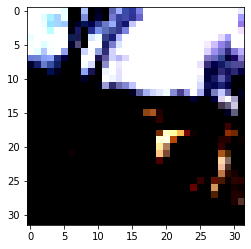

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




864 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


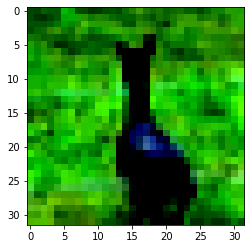

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




865 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


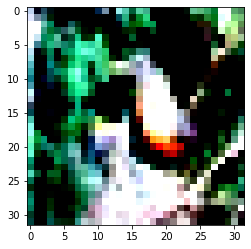

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




866 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


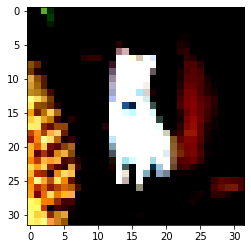

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




867 [ Predicted Value: plane, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


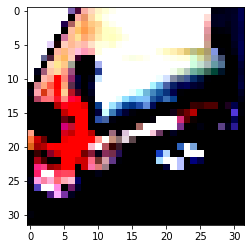

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




868 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


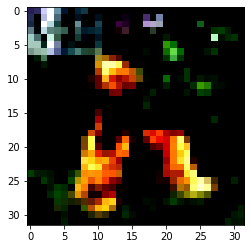

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




869 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


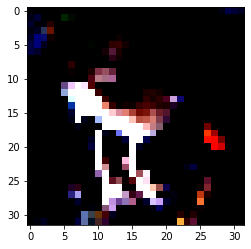

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




870 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


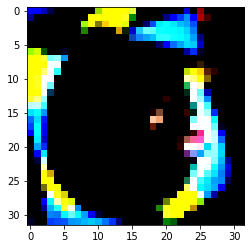

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




871 [ Predicted Value: plane, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


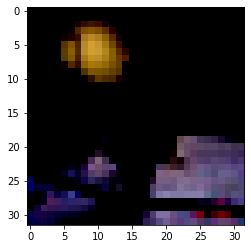

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




872 [ Predicted Value: bird, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


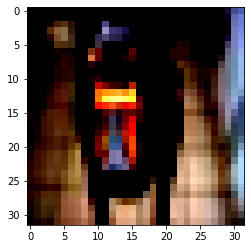

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




873 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


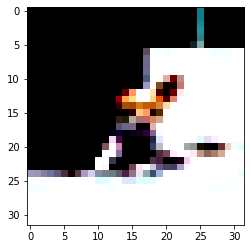

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




874 [ Predicted Value: cat, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


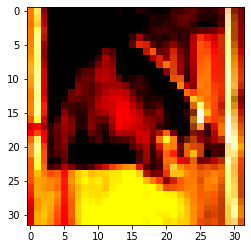

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




875 [ Predicted Value: cat, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


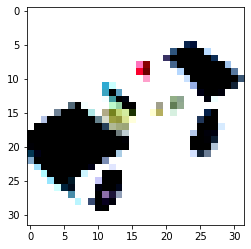

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




876 [ Predicted Value: dog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


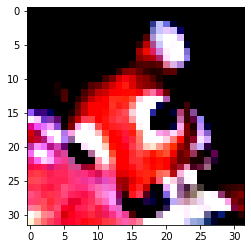

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




877 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


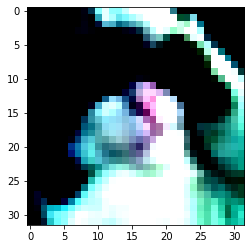

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




878 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


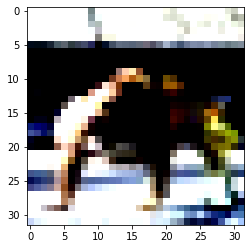

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




879 [ Predicted Value: plane, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


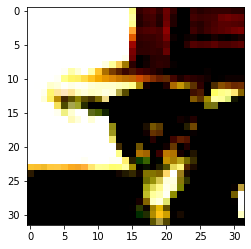

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




880 [ Predicted Value: cat, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


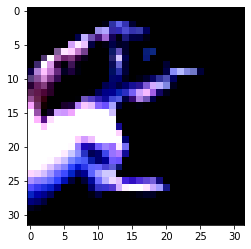

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




881 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


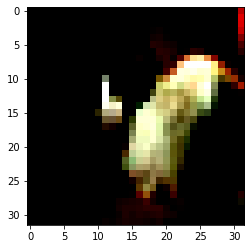



882 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


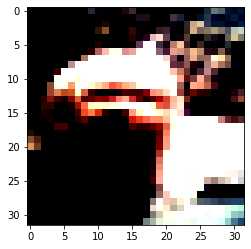



883 [ Predicted Value: truck, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


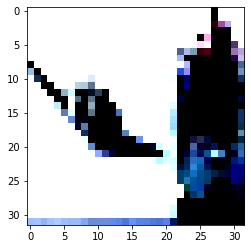

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




884 [ Predicted Value: car, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


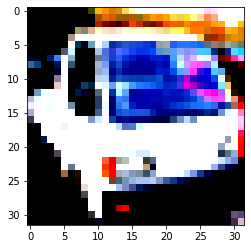

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




885 [ Predicted Value: horse, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


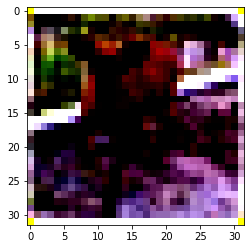

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




886 [ Predicted Value: plane, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


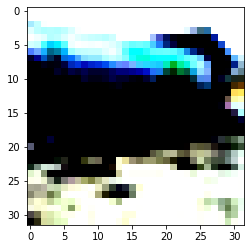

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




887 [ Predicted Value: frog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


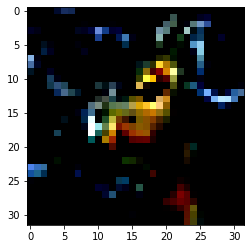

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




888 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


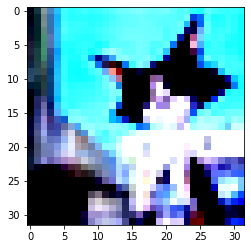

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




889 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


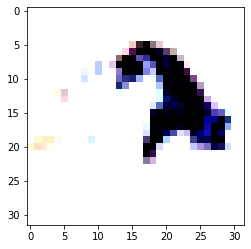

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




890 [ Predicted Value: bird, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


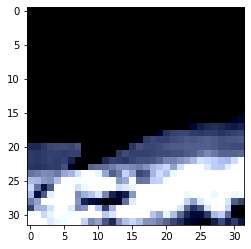

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




891 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


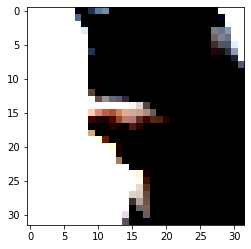

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




892 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


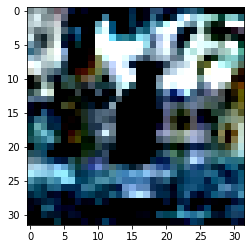

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




893 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


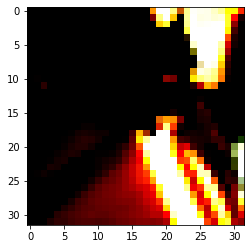

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




894 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


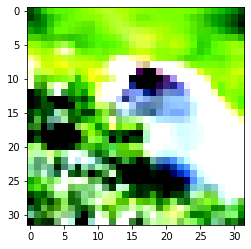

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




895 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


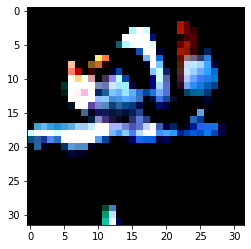

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




896 [ Predicted Value: cat, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


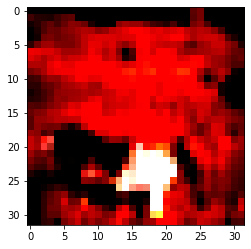

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




897 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


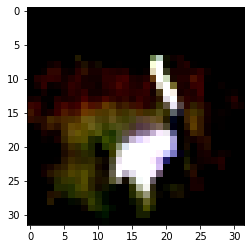



898 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


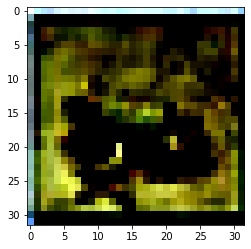



899 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


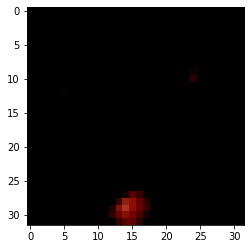

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




900 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


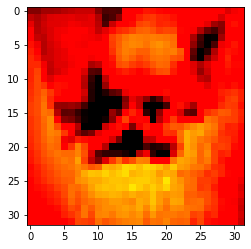

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




901 [ Predicted Value: ship, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


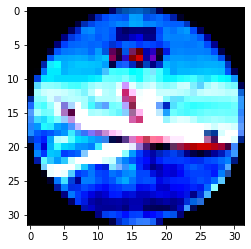

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




902 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


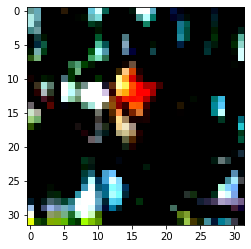

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




903 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


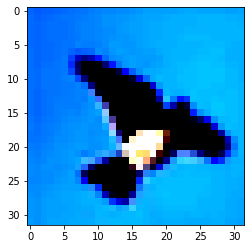

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




904 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


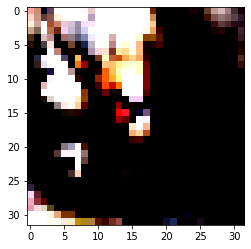

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




905 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


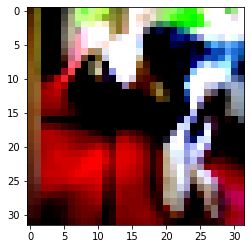

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




906 [ Predicted Value: dog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


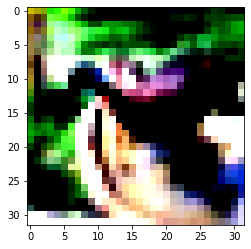

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




907 [ Predicted Value: horse, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


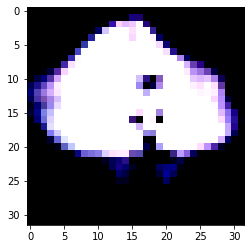

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




908 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


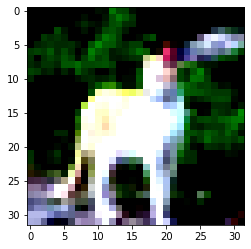

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




909 [ Predicted Value: ship, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


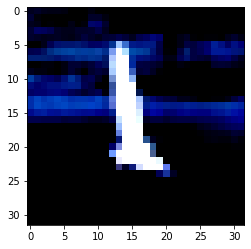

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




910 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


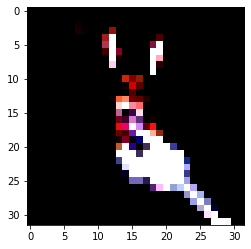

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




911 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


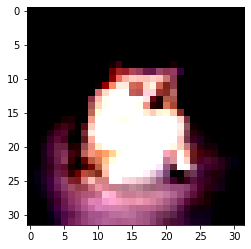

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




912 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


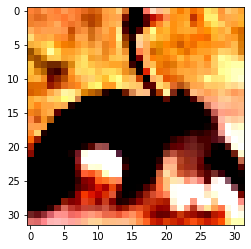

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




913 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


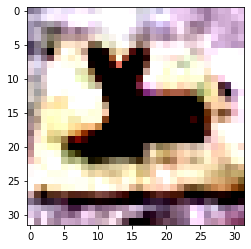

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




914 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


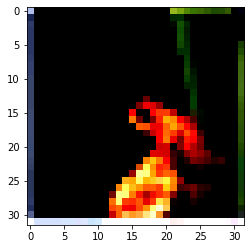

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




915 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


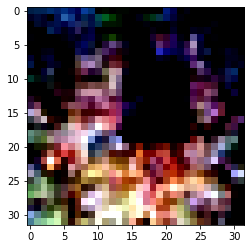

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




916 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


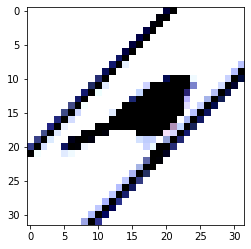

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




917 [ Predicted Value: frog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


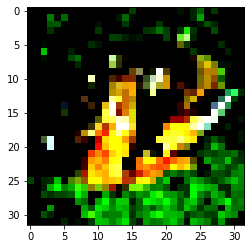

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




918 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


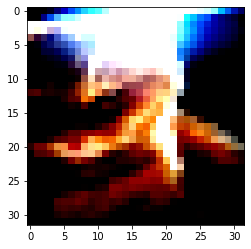

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




919 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


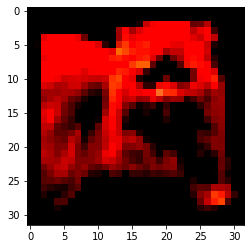

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




920 [ Predicted Value: cat, Actual Value: truck ]
(3, 32, 32)
(32, 32, 3)


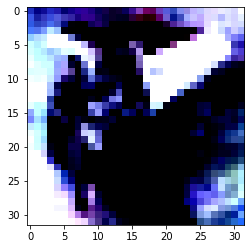

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




921 [ Predicted Value: deer, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


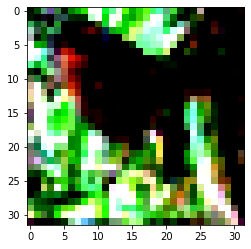

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




922 [ Predicted Value: truck, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


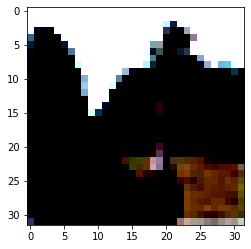

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




923 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


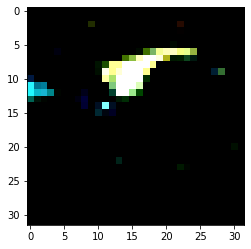

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




924 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


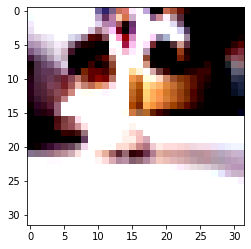

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




925 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


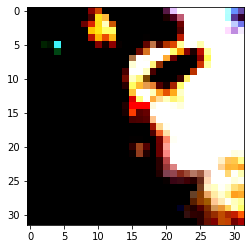

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




926 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


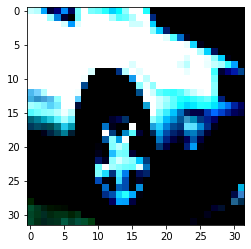

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




927 [ Predicted Value: car, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


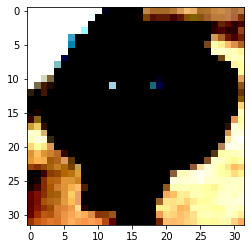

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




928 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


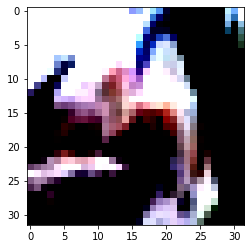

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




929 [ Predicted Value: cat, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


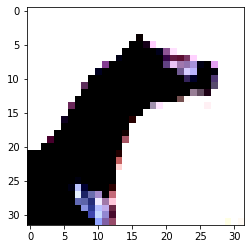



930 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


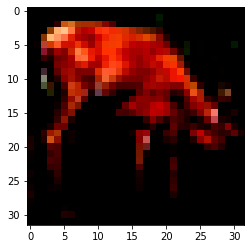

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




931 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


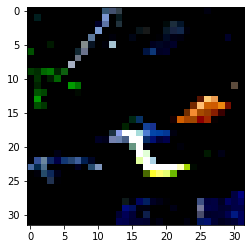

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




932 [ Predicted Value: ship, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


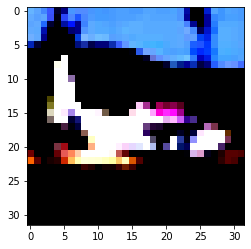

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




933 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


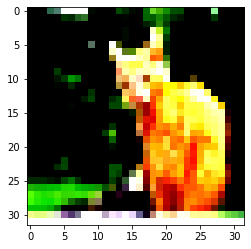

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




934 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


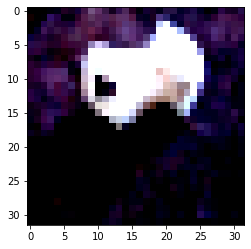

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




935 [ Predicted Value: car, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


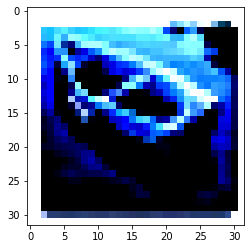

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




936 [ Predicted Value: cat, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


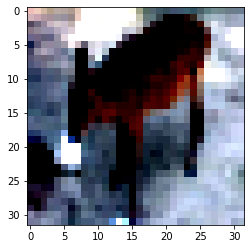

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




937 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


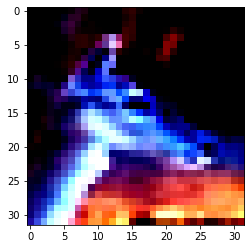

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




938 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


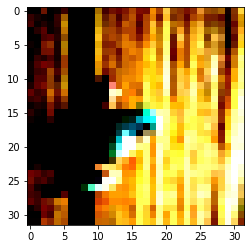

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




939 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


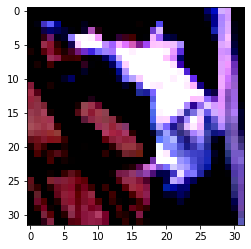

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




940 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


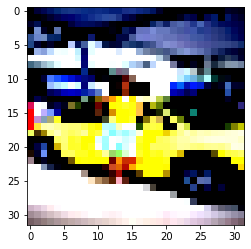

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




941 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


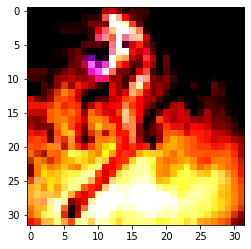

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




942 [ Predicted Value: dog, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


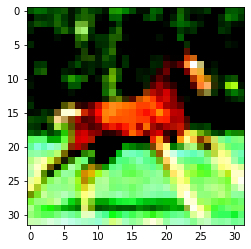

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




943 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


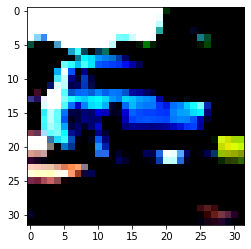

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




944 [ Predicted Value: ship, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


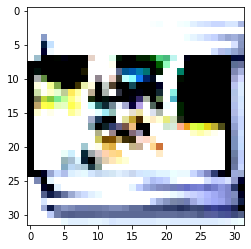

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




945 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


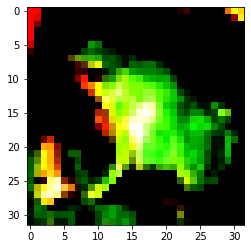



946 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


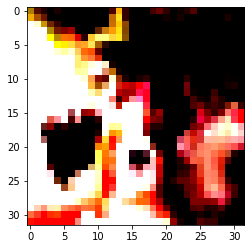



947 [ Predicted Value: bird, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


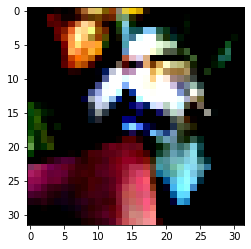

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




948 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


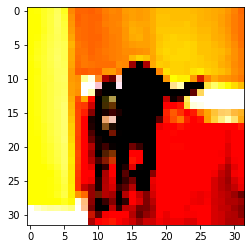

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




949 [ Predicted Value: plane, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


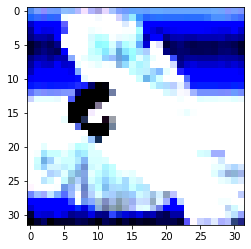

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




950 [ Predicted Value: truck, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


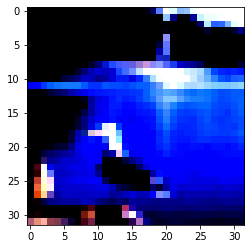

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




951 [ Predicted Value: cat, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


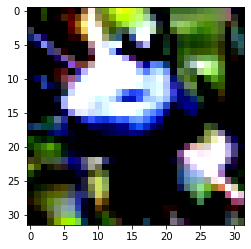

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




952 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


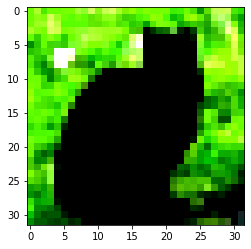

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




953 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


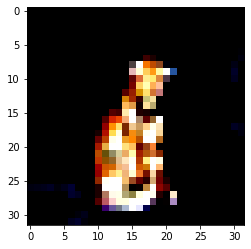

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




954 [ Predicted Value: horse, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


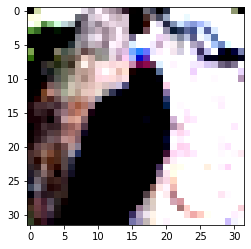

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




955 [ Predicted Value: cat, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


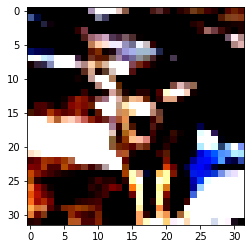

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




956 [ Predicted Value: cat, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


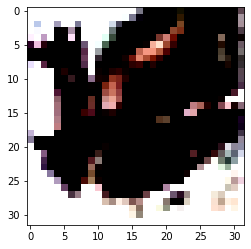

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




957 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


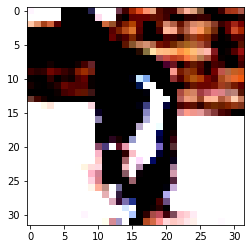

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




958 [ Predicted Value: cat, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


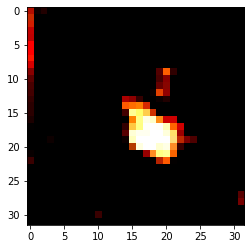

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




959 [ Predicted Value: truck, Actual Value: car ]
(3, 32, 32)
(32, 32, 3)


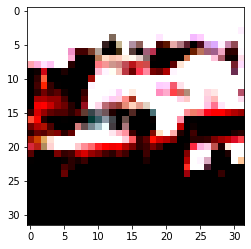

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




960 [ Predicted Value: deer, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


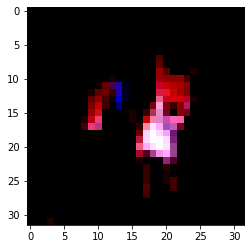

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




961 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


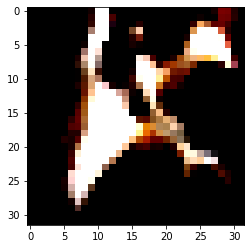

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




962 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


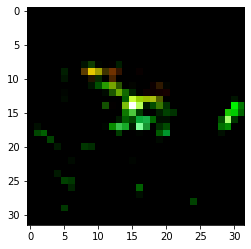

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




963 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


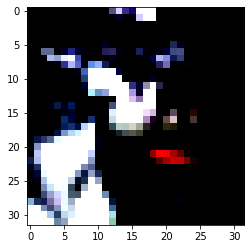

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




964 [ Predicted Value: bird, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


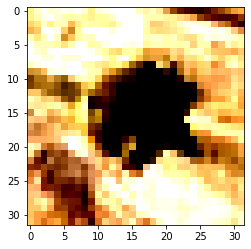

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




965 [ Predicted Value: cat, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


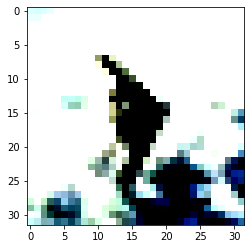

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




966 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


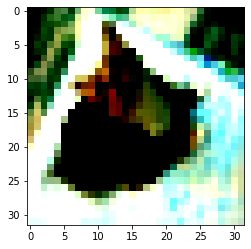

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




967 [ Predicted Value: car, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


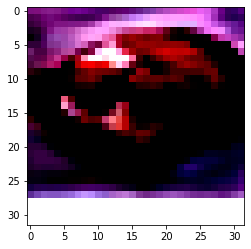

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




968 [ Predicted Value: dog, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


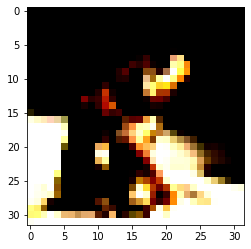

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




969 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


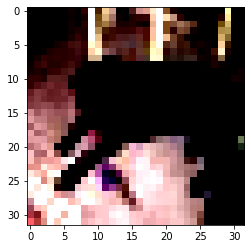

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




970 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


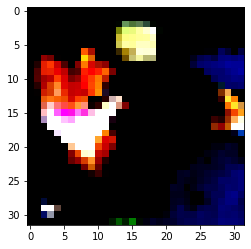

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




971 [ Predicted Value: frog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


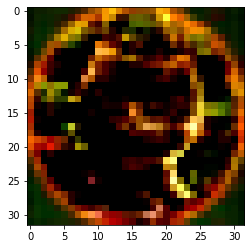

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




972 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


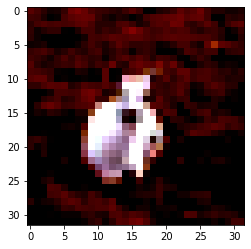

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




973 [ Predicted Value: truck, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


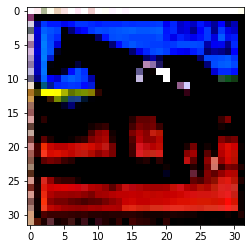

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




974 [ Predicted Value: plane, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


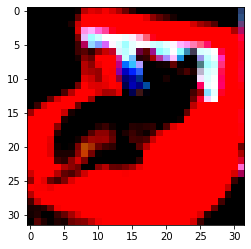

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




975 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


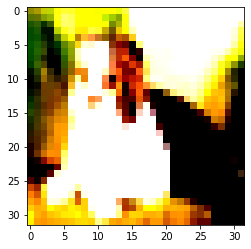

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




976 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


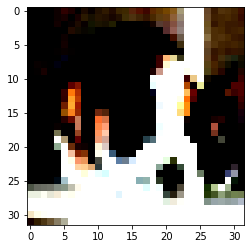

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




977 [ Predicted Value: cat, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


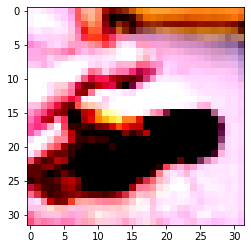



978 [ Predicted Value: horse, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


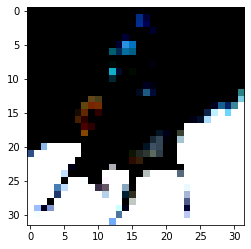



979 [ Predicted Value: frog, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


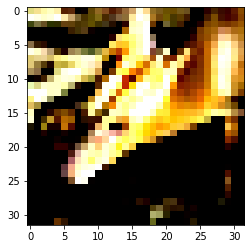

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




980 [ Predicted Value: truck, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


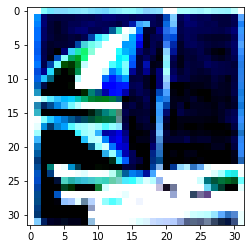

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




981 [ Predicted Value: frog, Actual Value: bird ]
(3, 32, 32)
(32, 32, 3)


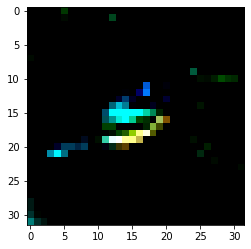

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




982 [ Predicted Value: cat, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


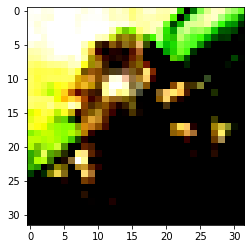

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




983 [ Predicted Value: plane, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


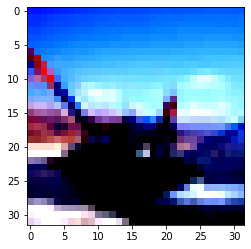

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




984 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


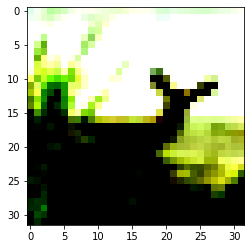

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




985 [ Predicted Value: deer, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


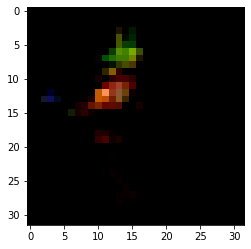

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




986 [ Predicted Value: horse, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


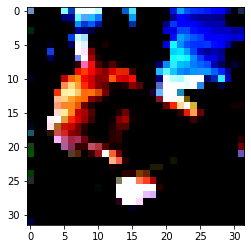

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




987 [ Predicted Value: plane, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


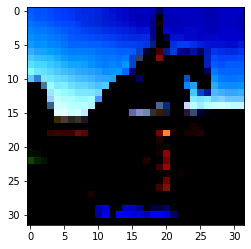

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




988 [ Predicted Value: dog, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


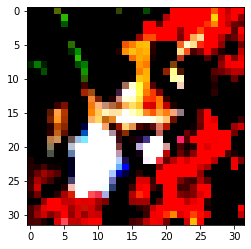

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




989 [ Predicted Value: plane, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


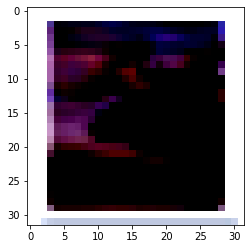

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




990 [ Predicted Value: horse, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


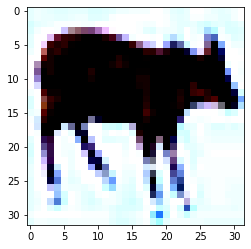

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




991 [ Predicted Value: frog, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


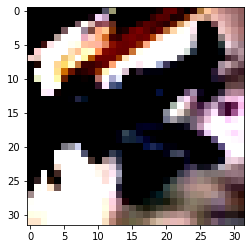

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




992 [ Predicted Value: cat, Actual Value: frog ]
(3, 32, 32)
(32, 32, 3)


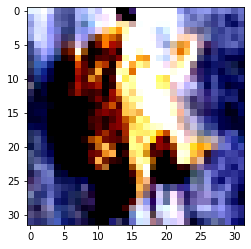

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




993 [ Predicted Value: truck, Actual Value: plane ]
(3, 32, 32)
(32, 32, 3)


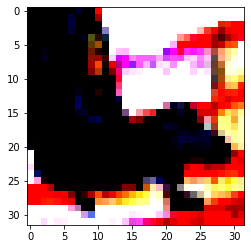



994 [ Predicted Value: bird, Actual Value: deer ]
(3, 32, 32)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


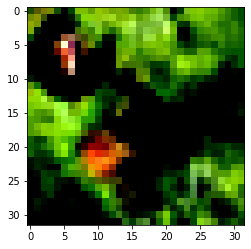

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




995 [ Predicted Value: frog, Actual Value: ship ]
(3, 32, 32)
(32, 32, 3)


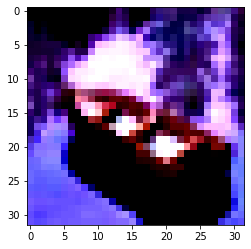

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




996 [ Predicted Value: horse, Actual Value: dog ]
(3, 32, 32)
(32, 32, 3)


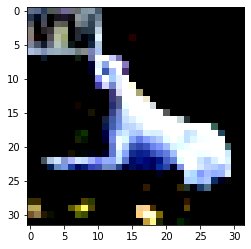

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




997 [ Predicted Value: deer, Actual Value: cat ]
(3, 32, 32)
(32, 32, 3)


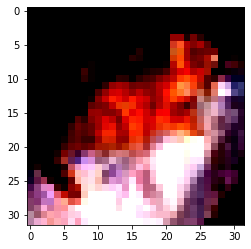

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




998 [ Predicted Value: deer, Actual Value: horse ]
(3, 32, 32)
(32, 32, 3)


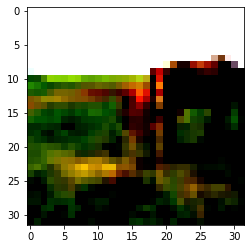

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def miscImages(model, device, test_loader, classes):
    model.eval()
    test_loss = 0
    incorrect = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability

            for i in range(len(target)):
              if pred[i].item() != target[i]:
                incorrect += 1
                print('\n\n{} [ Predicted Value: {}, Actual Value: {} ]'.format(
                incorrect, classes[pred[i].item()], classes[target[i]], ))
                print(data[i].cpu().numpy().shape)
                dataa = np.rollaxis(data[i].cpu().numpy(),0,3)
                print(dataa.shape)
                plt.imshow(dataa.squeeze(), cmap='gray_r')
                plt.show()
miscImages(Mymodel, device, testloader, classes)